# Tennis ATP data Exploration and Modeling

## 1. [Objectives](#Objectives)
## 2. [Tennis ATP data from internet](#Scrap_data)
## 3. [Analysis of Tennis data](#EDA)
## 4. [Data preparation and feature engineering ](#Feature)
## 5. [Model building and evaluation](#Model)
## 6. [Insight and Discussion](#Insight)

<a id='Contents'></a> 


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

import os
import string
    
from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance


import time
import sys
import gc
import pickle
sys.version_info

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)

In [11]:
# import the modules built for the project
import data_cleansing
import tennis_EDA
import tennis_features
import model_training


In [ ]:
import importlib
importlib.reload(tennis_EDA)
importlib.reload(data_cleansing)
importlib.reload(tennis_features)

 <a id='Objectives'></a>
 ##  1. [Objectives and Problem Definition](#Contents)

We are going to analyse the tennis competion data from https://github.com/JeffSackmann/tennis_atp. There are several goals

* To find out the statistics and understand what factors are correlated to the winning or losing of a game.
* To find out the performance change of players over his/her career, what are the game statistics of the player when competing with different opponents.
* To build a model try to predict the result of game, giving the information of the players, the match and others. 

 <a id='Scrap_data'></a>
 ##  2. [Tennis ATP data from internet](#Contents)

In [5]:
# define the years of data we want to include in the analysis
year_start = 1985
year_end = 2020

# download the data from  https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/
matrix = data_cleansing.download_tennis_data(year_start, year_end)

Start downloading dataset:
Download finished.


In [6]:
#Data Cleansing
matrix = data_cleansing.clean_tennis_data(matrix) 
matrix.head(3)

start cleaning the data
Finished cleaning the data.


tourney_name surface  draw_size tourney_level tourney_date  match_num  \
0     Auckland    Hard       32.0             A   1985-01-07        1.0   
1     Auckland    Hard       32.0             A   1985-01-07        2.0   
2     Auckland    Hard       32.0             A   1985-01-07        3.0   

   winner_id winner_seed winner_entry      winner_name winner_hand  winner_ht  \
0   100713.0           1          NaN  John Fitzgerald           R      183.0   
1   100179.0         NaN          NaN      Karl Meiler           R      178.0   
2   100798.0         NaN          NaN     Howard Sands           R      173.0   

  winner_ioc  winner_age  loser_id loser_seed loser_entry       loser_name  \
0        AUS   24.027379  100771.0        NaN         NaN   Kelvin Belcher   
1        GER   35.690623  100840.0        NaN         NaN  Mark Wooldridge   
2        USA   22.921287  101145.0        NaN         NaN  Jonathan Canter   

  loser_hand  loser_ht loser_ioc  loser_age        score  best_of round  \
0          R     185.0       USA  23.299110  2-6 6-3 6-4      3.0   R32   
1          R     188.0       USA  22.505133  2-6 6-4 6-3      3.0   R32   
2          R     185.0       USA  19.594798  3-6 6-3 6-4      3.0   R32   

   minutes  winner_ace  winner_df  winner_svpt  winner_1stIn  winner_1stWon  \
0      NaN         NaN        NaN          NaN           NaN            NaN   
1      NaN         NaN        NaN          NaN           NaN            NaN   
2      NaN         NaN        NaN          NaN           NaN            NaN   

   winner_2ndWon  winner_SvGms  winner_bpSaved  winner_bpFaced  loser_ace  \
0            NaN           NaN             NaN             NaN        NaN   
1            NaN           NaN             NaN             NaN        NaN   
2            NaN           NaN             NaN             NaN        NaN   

   loser_df  loser_svpt  loser_1stIn  loser_1stWon  loser_2ndWon  loser_SvGms  \
0       NaN         NaN          NaN           NaN           NaN          NaN   
1       NaN         NaN          NaN           NaN           NaN          NaN   
2       NaN         NaN          NaN           NaN           NaN          NaN   

   loser_bpSaved  loser_bpFaced  winner_rank  winner_rank_points  loser_rank  \
0            NaN            NaN         29.0                 NaN       195.0   
1            NaN            NaN        180.0                 NaN       164.0   
2            NaN            NaN        170.0                 NaN       239.0   

   loser_rank_points  year  month  day  day_week  winner_set_1  loser_set_1  \
0                NaN  1985      1    7         0           2.0          6.0   
1                NaN  1985      1    7         0           2.0          6.0   
2                NaN  1985      1    7         0           3.0          6.0   

   winner_set_2  loser_set_2  winner_set_3  loser_set_3  winner_set_4  \
0           6.0          3.0           6.0          4.0           NaN   
1           6.0          4.0           6.0          3.0           NaN   
2           6.0          3.0           6.0          4.0           NaN   

   loser_set_4  winner_set_5  loser_set_5  set_1_tb  set_2_tb  set_3_tb  \
0          NaN           NaN          NaN       NaN       NaN       NaN   
1          NaN           NaN          NaN       NaN       NaN       NaN   
2          NaN           NaN          NaN       NaN       NaN       NaN   

   set_4_tb  set_5_tb  winner_bpsr  loser_bpsr  winner_bpc  loser_bpc  \
0       NaN       NaN          NaN         NaN         NaN        NaN   
1       NaN       NaN          NaN         NaN         NaN        NaN   
2       NaN       NaN          NaN         NaN         NaN        NaN   

   winner_bpcr  loser_bpcr  winner_seed_code  loser_seed_code  \
0          NaN         NaN               1.0              NaN   
1          NaN         NaN               NaN              NaN   
2          NaN         NaN               NaN              NaN   

   winner_hand_code  lose

In [7]:
# convert the data notations from winner vs loser to player_1 vs player_2
matrix_n = data_cleansing.matrix_p1p2(matrix)
matrix_n.head(3)

tourney_name surface  draw_size tourney_level tourney_date  year  month  \
0     Auckland    Hard       32.0             A   1985-01-07  1985      1   
1     Auckland    Hard       32.0             A   1985-01-07  1985      1   
2     Auckland    Hard       32.0             A   1985-01-07  1985      1   

   day  day_week  match_num  best_of round  minutes     p1_id p1_seed  \
0    7         0        1.0      3.0   R32      NaN  100713.0       1   
1    7         0        2.0      3.0   R32      NaN  100179.0     NaN   
2    7         0        3.0      3.0   R32      NaN  100798.0     NaN   

  p1_entry          p1_name p1_hand  p1_ht p1_ioc     p1_age  p1_ace  p1_df  \
0      NaN  John Fitzgerald       R  183.0    AUS  24.027379     NaN    NaN   
1      NaN      Karl Meiler       R  178.0    GER  35.690623     NaN    NaN   
2      NaN     Howard Sands       R  173.0    USA  22.921287     NaN    NaN   

   p1_svpt  p1_1stIn  p1_1stWon  p1_2ndWon  p1_SvGms  p1_bpSaved  p1_bpFaced  \
0      NaN       NaN        NaN        NaN       NaN         NaN         NaN   
1      NaN       NaN        NaN        NaN       NaN         NaN         NaN   
2      NaN       NaN        NaN        NaN       NaN         NaN         NaN   

   p1_rank  p1_rank_points  p1_set_1  p1_set_2  p1_set_3  p1_set_4  p1_set_5  \
0     29.0             NaN       2.0       6.0       6.0       NaN       NaN   
1    180.0             NaN       2.0       6.0       6.0       NaN       NaN   
2    170.0             NaN       3.0       6.0       6.0       NaN       NaN   

   p1_bpsr  p1_bpc  p1_bpcr  p1_seed_code  p1_hand_code     p2_id p2_seed  \
0      NaN     NaN      NaN           1.0           1.0  100771.0     NaN   
1      NaN     NaN      NaN           NaN           1.0  100840.0     NaN   
2      NaN     NaN      NaN           NaN           1.0  101145.0     NaN   

  p2_entry          p2_name p2_hand  p2_ht p2_ioc     p2_age  p2_ace  p2_df  \
0      NaN   Kelvin Belcher       R  185.0    USA  23.299110     NaN    NaN   
1      NaN  Mark Wooldridge       R  188.0    USA  22.505133     NaN    NaN   
2      NaN  Jonathan Canter       R  185.0    USA  19.594798     NaN    NaN   

   p2_svpt  p2_1stIn  p2_1stWon  p2_2ndWon  p2_SvGms  p2_bpSaved  p2_bpFaced  \
0      NaN       NaN        NaN        NaN       NaN         NaN         NaN   
1      NaN       NaN        NaN        NaN       NaN         NaN         NaN   
2      NaN       NaN        NaN        NaN       NaN         NaN         NaN   

   p2_rank  p2_rank_points  p2_set_1  p2_set_2  p2_set_3  p2_set_4  p2_set_5  \
0    195.0             NaN       6.0       3.0       4.0       NaN       NaN   
1    164.0             NaN       6.0       4.0       3.0       NaN       NaN   
2    239.0             NaN       6.0       3.0       4.0       NaN       NaN   

   p2_bpsr  p2_bpc  p2_bpcr  p2_seed_code  p2_hand_code  p1_win  p2_win  \
0      NaN     NaN      NaN           NaN           1.0     1.0     0.0   
1      NaN     NaN      NaN           NaN           1.0     1.0     0.0   
2      NaN     NaN      NaN           NaN           1.0     1.0     0.0   

   p1_sets_win  p2_sets_win  
0          2.0          1.0  
1          2.0          1.0  
2          2.0          1.0

 <a id='EDA'></a>
 ##  3. [Analysis of Tennis data](#Contents)

Some basic statistics:

In [6]:
matrix.describe(include='all')

tourney_name surface      draw_size tourney_level         tourney_date  \
count        117049  116851  117049.000000        117049               117049   
unique         2797       4            NaN             5                 1665   
top         US Open    Hard            NaN             A  1987-07-13 00:00:00   
freq           4445   55273            NaN         69737                  164   
first           NaN     NaN            NaN           NaN  1985-01-07 00:00:00   
last            NaN     NaN            NaN           NaN  2020-03-06 00:00:00   
mean            NaN     NaN      52.745756           NaN                  NaN   
std             NaN     NaN      37.693781           NaN                  NaN   
min             NaN     NaN       4.000000           NaN                  NaN   
25%             NaN     NaN      32.000000           NaN                  NaN   
50%             NaN     NaN      32.000000           NaN                  NaN   
75%             NaN     NaN      64.000000           NaN                  NaN   
max             NaN     NaN     128.000000           NaN                  NaN   

            match_num      winner_id winner_seed winner_entry    winner_name  \
count   117049.000000  117049.000000       47438        13520         117049   
unique            NaN            NaN          34            6           2589   
top               NaN            NaN           1            Q  Roger Federer   
freq              NaN            NaN        6598         8042           1250   
first             NaN            NaN         NaN          NaN            NaN   
last              NaN            NaN         NaN          NaN            NaN   
mean        52.405360  103464.411511         NaN          NaN            NaN   
std         88.678803    5885.146640         NaN          NaN            NaN   
min          1.000000  100119.000000         NaN          NaN            NaN   
25%          9.000000  101511.000000         NaN          NaN            NaN   
50%         22.000000  102772.000000         NaN          NaN            NaN   
75%         45.000000  104269.000000         NaN          NaN            NaN   
max       1701.000000  209874.000000         NaN          NaN            NaN   

       winner_hand      winner_ht winner_ioc     winner_age       loser_id  \
count       117029  109940.000000     117049  116773.000000  117049.000000   
unique           3            NaN        123            NaN            NaN   
top              R            NaN        USA            NaN            NaN   
freq         99498            NaN      16606            NaN            NaN   
first          NaN            NaN        NaN            NaN            NaN   
last           NaN            NaN        NaN            NaN            NaN   
mean           NaN     185.043005        NaN      25.439453  103671.182701   
std            NaN       6.653983        NaN       3.739740    6737.634888   
min            NaN     160.000000        NaN      14.351814  100116.000000   
25%            NaN     180.000000        NaN      22.680356  101507.000000   
50%            NaN     185.000000        NaN      25.160849  102783.000000   
75%            NaN     190.000000        NaN      27.917864  104312.000000   
max            NaN     208.000000        NaN      42.792608  209873.000000   

       loser_seed loser_entry       loser_name loser_hand       loser_ht  \
count       25465       22762           117049     116993  105778.000000   
unique         35           7             3825          3            NaN   
top             8           Q  Feliciano Lopez          R            NaN   
freq         2376       13175              451      97985            NaN   
first         NaN         NaN              NaN        NaN            NaN   
last          NaN         NaN              NaN        NaN            NaN   
mean          NaN         NaN              NaN        NaN     184.619864   
std           NaN         NaN              NaN    

In [7]:
matrix_n.describe(include='all')

tourney_name surface      draw_size tourney_level         tourney_date  \
count        117049  116851  117049.000000        117049               117049   
unique         2797       4            NaN             5                 1665   
top         US Open    Hard            NaN             A  1987-07-13 00:00:00   
freq           4445   55273            NaN         69737                  164   
first           NaN     NaN            NaN           NaN  1985-01-07 00:00:00   
last            NaN     NaN            NaN           NaN  2020-03-06 00:00:00   
mean            NaN     NaN      52.745756           NaN                  NaN   
std             NaN     NaN      37.693781           NaN                  NaN   
min             NaN     NaN       4.000000           NaN                  NaN   
25%             NaN     NaN      32.000000           NaN                  NaN   
50%             NaN     NaN      32.000000           NaN                  NaN   
75%             NaN     NaN      64.000000           NaN                  NaN   
max             NaN     NaN     128.000000           NaN                  NaN   

                 year          month            day       day_week  \
count   117049.000000  117049.000000  117049.000000  117049.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
first             NaN            NaN            NaN            NaN   
last              NaN            NaN            NaN            NaN   
mean      2001.263343       5.713069      15.741561       0.693146   
std         10.033569       2.963220       8.539461       1.663466   
min       1985.000000       1.000000       1.000000       0.000000   
25%       1993.000000       3.000000       8.000000       0.000000   
50%       2001.000000       6.000000      16.000000       0.000000   
75%       2010.000000       8.000000      23.000000       0.000000   
max       2020.000000      12.000000      31.000000       6.000000   

            match_num        best_of   round       minutes          p1_id  \
count   117049.000000  117049.000000  117049  83466.000000  117049.000000   
unique            NaN            NaN      10           NaN            NaN   
top               NaN            NaN     R32           NaN            NaN   
freq              NaN            NaN   38343           NaN            NaN   
first             NaN            NaN     NaN           NaN            NaN   
last              NaN            NaN     NaN           NaN            NaN   
mean        52.405360       3.442840     NaN    102.633503  102741.804108   
std         88.678803       0.830409     NaN     38.925514    2803.940535   
min          1.000000       3.000000     NaN      0.000000  100116.000000   
25%          9.000000       3.000000     NaN     74.000000  101276.000000   
50%         22.000000       3.000000     NaN     95.000000  102318.000000   
75%         45.000000       3.000000     NaN    124.000000  103852.000000   
max       1701.000000       5.000000     NaN   1146.000000  209226.000000   

       p1_seed p1_entry        p1_name p1_hand          p1_ht  p1_ioc  \
count    36816    15718         117049  117043  111307.000000  117049   
unique      35        7           2675       3            NaN     123   
top          1        Q  Roger Federer       R            NaN     USA   
freq      4333     9203            893   98199            NaN   17035   
first      NaN      NaN            NaN     NaN            NaN     NaN   
last       NaN      NaN            NaN     NaN            NaN     NaN   
mean       NaN      NaN            NaN     NaN     184.703613     NaN   
std        NaN      NaN            NaN     NaN       6.621971     NaN   
min        NaN      NaN            NaN     NaN     160.000000     NaN   
25%        NaN      NaN            NaN     NaN     180.000000     NaN   
50%      

* #### Match information distribution

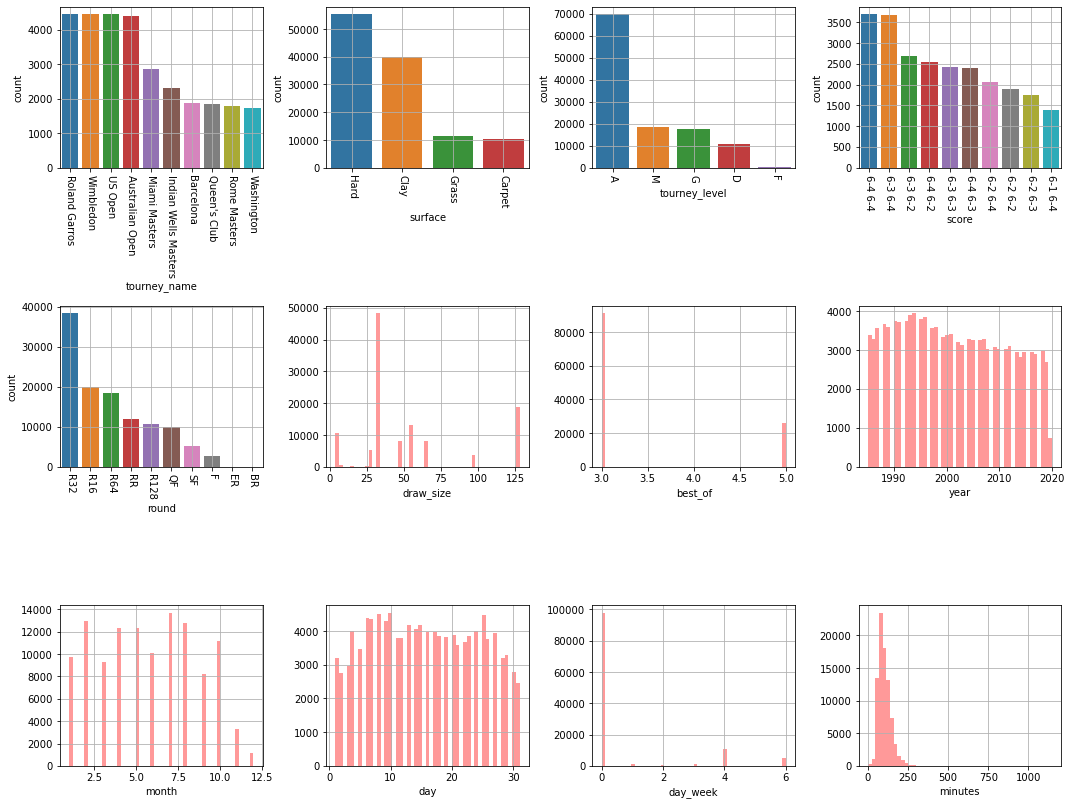

In [34]:
col_match =  ['tourney_name','surface','tourney_level','score','round','draw_size','best_of','year','month','day','day_week','minutes']

plt.figure(figsize=(15,15))

tennis_EDA.dist_bar_plot(matrix = matrix,col_match = col_match,n_row = 4,n_column = 4,
                         hist_color = 'red',flag_kde = False,bins_num = 'auto',top_n=10)

        

Something weird in the 'minutes', there seems to have outliers

[Text(0.5, 0, '')]

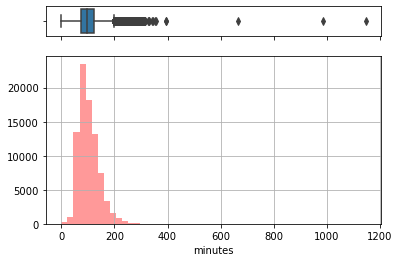

In [28]:
plt.figure

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(matrix["minutes"], ax=ax_box)

sns.distplot(matrix["minutes"], ax=ax_hist,kde=False,color='red')
plt.grid()
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


Matches that last for more than 400 minuts

In [29]:
matrix[matrix.minutes>400]

tourney_name surface  draw_size tourney_level tourney_date  match_num  \
107468    Wimbledon   Grass      128.0             G   2010-06-21       60.0   
123713       Sydney    Hard       32.0             A   2016-01-11      294.0   
127779       Munich    Clay       32.0             A   2017-05-01      297.0   

        winner_id winner_seed winner_entry    winner_name winner_hand  \
107468   104545.0          23          NaN     John Isner           R   
123713   104180.0         NaN          NaN  Gilles Muller           L   
127779   111202.0         NaN          NaN    Hyeon Chung           R   

        winner_ht winner_ioc  winner_age  loser_id loser_seed loser_entry  \
107468      206.0        USA   25.152635  103917.0        NaN           Q   
123713      193.0        LUX   32.676249  104871.0          6         NaN   
127779        NaN        KOR   20.950034  105373.0        NaN         NaN   

           loser_name loser_hand  loser_ht loser_ioc  loser_age  \
107468  Nicolas Mahut          R     190.0       FRA  28.413415   
123713  Jeremy Chardy          R     188.0       FRA  28.911704   
127779  Martin Klizan          L     190.0       SVK  27.805613   

                              score  best_of round  minutes  w_ace  w_df  \
107468  6-4 3-6 6-7(7) 7-6(3) 70-68      5.0  R128    665.0  113.0  10.0   
123713                   7-6(5) 6-3      3.0    QF   1146.0   14.0   5.0   
127779                  6-4 3-6 6-2      3.0    QF    987.0    4.0   2.0   

        w_svpt  w_1stIn  w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  w_bpFaced  \
107468   491.0    361.0     292.0      82.0     90.0        2.0        3.0   
123713    59.0     35.0      32.0      13.0     10.0        0.0        0.0   
127779    81.0     47.0      36.0      15.0     13.0        4.0        6.0   

        l_ace  l_df  l_svpt  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_bpSaved  \
107468  103.0  21.0   489.0    328.0     284.0     101.0     91.0       12.0   
123713    2.0   5.0    69.0     44.0      34.0      10.0     11.0        1.0   
127779    8.0   4.0    95.0     49.0      28.0      27.0     14.0        8.0   

        l_bpFaced  winner_rank  winner_rank_points  loser_rank  \
107468       14.0         19.0              1925.0       148.0   
123713        3.0         38.0              1105.0        31.0   
127779       12.0         78.0               659.0        53.0   

        loser_rank_points  year  month  day  day_week  winner_set_1  \
107468              339.0  2010      6   21         0           6.0   
123713             1255.0  2016      1   11         0           7.0   
127779              880.0  2017      5    1         0           6.0   

        loser_set_1  winner_set_2  loser_set_2  winner_set_3  loser_set_3  \
107468          4.0           3.0          6.0           6.0          7.0   
123713          6.0           6.0          3.0           NaN          NaN   
127779          4.0           3.0          6.0           6.0          2.0   

        winner_set_4  loser_set_4  winner_set_5  loser_set_5  set_1_tb  \
107468           7.0          6.0          70.0         68.0       NaN   
123713           NaN          NaN           NaN          NaN       5.0   
127779           NaN          NaN           NaN          NaN       NaN   

        set_2_tb  set_3_tb  set_4_tb  set_5_tb  
107468       NaN       7.0       3.0       NaN  
123713       NaN       NaN       NaN       NaN  
127779       NaN       NaN       NaN       NaN

* #### Winners vs Losers

In [8]:
matrix['winner_id'] = matrix.winner_id.astype(np.int64).map(str)
matrix['loser_id'] = matrix.loser_id.astype(np.int64).map(str)

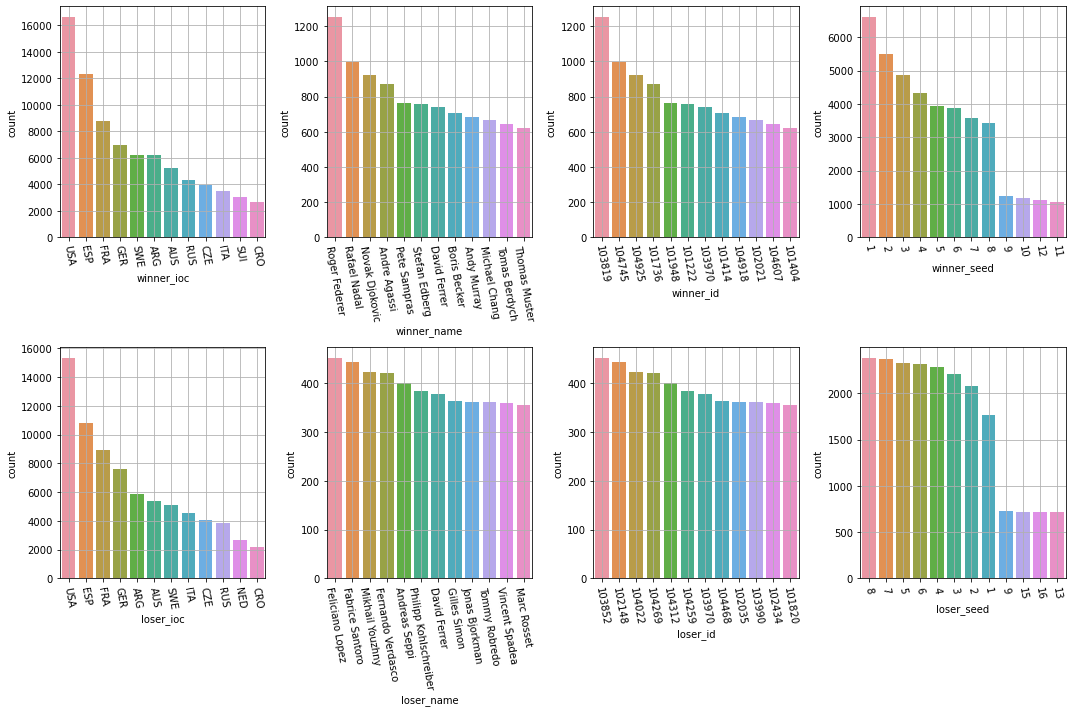

In [37]:
# player personal information

col_player_ps_1 = ['winner_ioc','winner_name','winner_id','winner_seed',
                 'loser_ioc','loser_name','loser_id','loser_seed']

plt.figure(figsize=(15,10))

tennis_EDA.dist_bar_plot(matrix = matrix,col_match = col_player_ps_1,n_row = 2,n_column = 4,
                         hist_color = 'red',flag_kde = False,bins_num = 'auto',top_n=12)

The name and id are one to one linked.   

Interestingly, the number of times a winner_seed winned a game pretty much follows the seed order from 1,2,3, ... to 12, and the number of wins have an abrupt drop from the 8th place. While the loser_seed pretty much follows an inverse order: from 8,7,... to 1, and an abrupt change also occurs at the 8th place. Basically, players with seed 1 to seed 8 dominate the top 8 number of winning or losing a game. It makes sense since the number of seed players is determine by the draw size (number of participants). For the most common one with a draw size of 32 (as shown above), there will be 8 seed players, and for draw size of 64, there will be 16 seed players.  

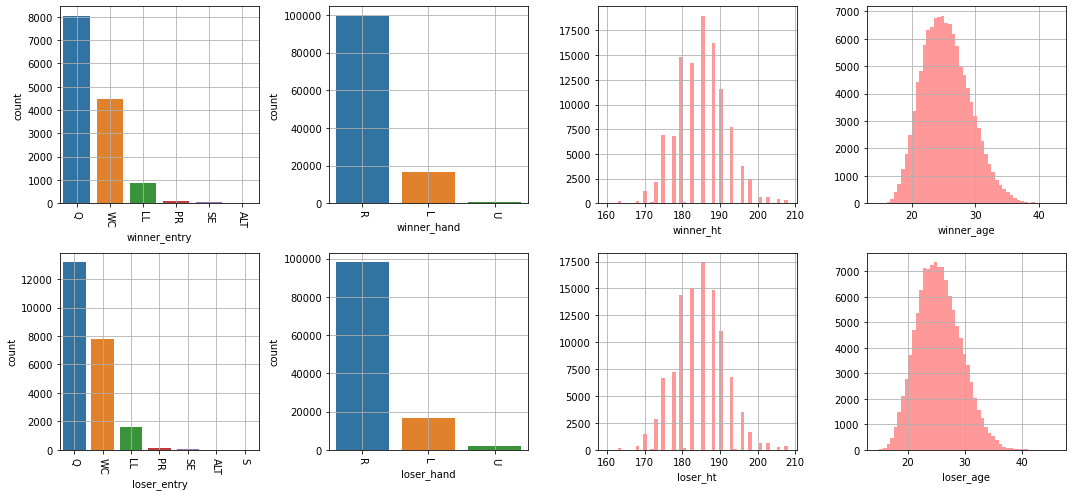

In [45]:
col_player_ps_2 = ['winner_entry','winner_hand','winner_ht','winner_age',
                 'loser_entry','loser_hand','loser_ht','loser_age']

plt.figure(figsize=(15,7))

tennis_EDA.dist_bar_plot(matrix = matrix,col_match = col_player_ps_2,n_row = 2,n_column = 4,
                         hist_color = 'red',flag_kde = False,bins_num = 'auto',top_n=12)


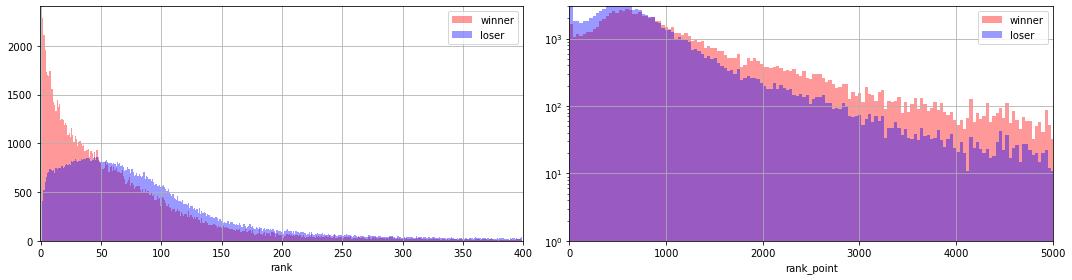

In [52]:
col_player_ps_3 = ['winner_rank','winner_rank_points','loser_rank','loser_rank_points']

plt.figure(figsize=(15,4))
#fig,axes = plt.subplots(2,4, sharex='col',figsize=(15,7))

plt.subplot(1,2,1)
plt.grid()
sns.distplot(matrix[col_player_ps_3[0]],kde=False,color='red',bins=range(1,400))
sns.distplot(matrix[col_player_ps_3[2]],kde=False,color='blue',bins=range(1,400))
plt.xlabel('rank')
plt.xlim(-1,400)
plt.legend(['winner','loser'])


plt.subplot(1,2,2)
plt.grid()
sns.distplot(matrix[col_player_ps_3[1]],kde=False,color='red',bins=500)
sns.distplot(matrix[col_player_ps_3[3]],kde=False,color='blue',bins=500)
plt.xlabel('rank_point')
plt.xlim(-1,5000)
plt.legend(['winner','loser'])
plt.yscale('log')
plt.ylim(1.0E0,4.0E3)
    
plt.tight_layout() 

Apparently, winner players with higher rank and rank point in general have won more than lost. For players with rank < 50, they have more winning than losing.

Next we analyze the performance difference for winner and loser players. We create new features of breakpoint converted, breakpoint saved ratio, and breakpoint converted ratio

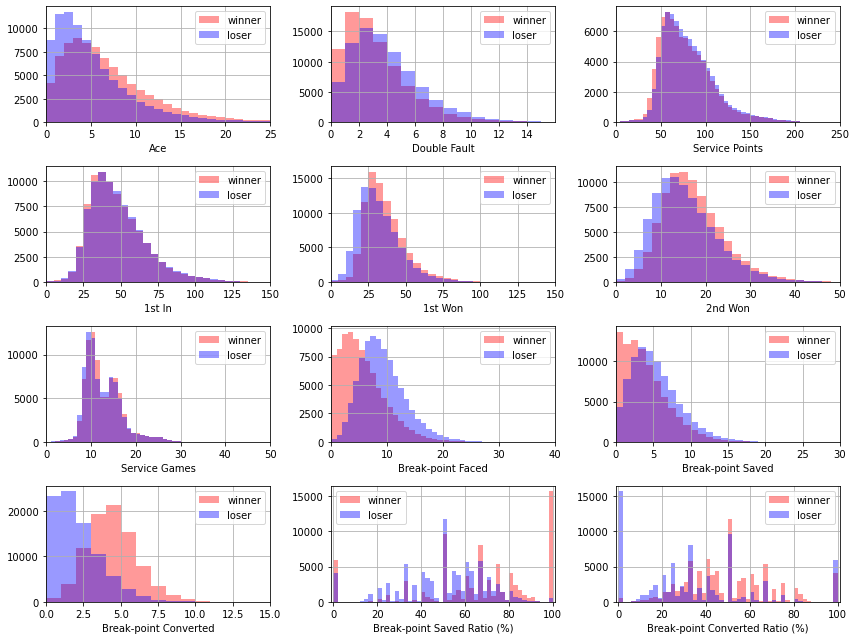

In [37]:
# player performance information
col_player_pf1 = ['winner_ace','winner_df','winner_svpt', 'winner_1stIn','winner_1stWon','winner_2ndWon','winner_SvGms','winner_bpFaced','winner_bpSaved','winner_bpc','winner_bpsr','winner_bpcr',
                  'loser_ace','loser_df','loser_svpt', 'loser_1stIn','loser_1stWon','loser_2ndWon','loser_SvGms','loser_bpFaced','loser_bpSaved','loser_bpc','loser_bpsr','loser_bpcr'
             ]

plt.figure(figsize=(12,9))
#fig,axes = plt.subplots(2,4, sharex='col',figsize=(15,7))

plt.subplot(4,3,1)
plt.grid()
sns.distplot(matrix[col_player_pf1[0]],kde=False,color='red',bins=range(0,31,1))
sns.distplot(matrix[col_player_pf1[12]],kde=False,color='blue',bins=range(0,31,1))
plt.xlabel('Ace')
plt.xlim(0,25)
plt.legend(['winner','loser'])

plt.subplot(4,3,2)
plt.grid()
sns.distplot(matrix[col_player_pf1[1]],kde=False,color='red',bins=range(0,21,1))
sns.distplot(matrix[col_player_pf1[13]],kde=False,color='blue',bins=range(0,21,1))
plt.xlabel('Double Fault')
plt.xlim(0,16)
plt.legend(['winner','loser'])
plt.xticks([0,2,4,6,8,10,12,14])

plt.subplot(4,3,3)
plt.grid()
sns.distplot(matrix[col_player_pf1[2]],kde=False,color='red',bins=range(0,301,5))
sns.distplot(matrix[col_player_pf1[14]],kde=False,color='blue',bins=range(0,301,5))
plt.xlabel('Service Points')
plt.xlim(0,250)
plt.legend(['winner','loser'])

plt.subplot(4,3,4)
plt.grid()
sns.distplot(matrix[col_player_pf1[3]],kde=False,color='red',bins=range(0,201,5))
sns.distplot(matrix[col_player_pf1[15]],kde=False,color='blue',bins=range(0,201,5))
plt.xlabel('1st In')
plt.xlim(0,150)
plt.legend(['winner','loser'])

plt.subplot(4,3,5)
plt.grid()
sns.distplot(matrix[col_player_pf1[4]],kde=False,color='red',bins=range(0,201,5))
sns.distplot(matrix[col_player_pf1[16]],kde=False,color='blue',bins=range(0,201,5))
plt.xlabel('1st Won')
plt.xlim(0,150)
plt.legend(['winner','loser'])

plt.subplot(4,3,6)
plt.grid()
sns.distplot(matrix[col_player_pf1[5]],kde=False,color='red',bins=range(0,81,2))
sns.distplot(matrix[col_player_pf1[17]],kde=False,color='blue',bins=range(0,81,2))
plt.xlabel('2nd Won')
plt.xlim(0,50)
plt.legend(['winner','loser'])

plt.subplot(4,3,7)
plt.grid()
sns.distplot(matrix[col_player_pf1[6]],kde=False,color='red',bins=range(0,81,1))
sns.distplot(matrix[col_player_pf1[18]],kde=False,color='blue',bins=range(0,81,1))
plt.xlabel('Service Games')
plt.xlim(0,50)
plt.legend(['winner','loser'])

plt.subplot(4,3,8)
plt.grid()
sns.distplot(matrix[col_player_pf1[7]],kde=False,color='red',bins=range(0,51,1))
sns.distplot(matrix[col_player_pf1[19]],kde=False,color='blue',bins=range(0,51,1))
plt.xlabel('Break-point Faced')
plt.xlim(0,40)
plt.legend(['winner','loser'])

plt.subplot(4,3,9)
plt.grid()
sns.distplot(matrix[col_player_pf1[8]],kde=False,color='red',bins=range(0,51,1))
sns.distplot(matrix[col_player_pf1[20]],kde=False,color='blue',bins=range(0,51,1))
plt.xlabel('Break-point Saved')
plt.xlim(0,30)
plt.legend(['winner','loser'])

plt.subplot(4,3,10)
plt.grid()
sns.distplot(matrix[col_player_pf1[9]],kde=False,color='red',bins=range(0,21,1))
sns.distplot(matrix[col_player_pf1[21]],kde=False,color='blue',bins=range(0,21,1))
plt.xlabel('Break-point Converted')
plt.xlim(0,15)
plt.legend(['winner','loser'])

plt.subplot(4,3,11)
plt.grid()
sns.distplot(matrix[col_player_pf1[10]]*100,kde=False,color='red',bins=range(0,101,2))
sns.distplot(matrix[col_player_pf1[22]]*100,kde=False,color='blue',bins=range(0,101,2))
plt.xlabel('Break-point Saved Ratio (%)')
plt.xlim(-1,101)
plt.legend(['winner','loser'])

plt.subplot(4,3,12)
plt.grid()
sns.distplot(matrix[col_player_pf1[11]]*100,kde=False,color='red',bins=range(0,101,2))
sns.distplot(matrix[col_player_pf1[23]]*100,kde=False,color='blue',bins=range(0,101,2))
plt.xlabel('Break-point Converted Ratio (%)')
plt.xlim(-1,101)
plt.legend(['winner','loser'])
     
plt.tight_layout() 

* Winner players tend to have higher number of ace, 1st won, 2 won and lower number of double fault, break-point saved and break-point faced.

In [39]:
for i in range(1,6):
    
    matrix['diff_set_'+str(i)] = matrix['winner_set_'+str(i)] - matrix['loser_set_'+str(i)]

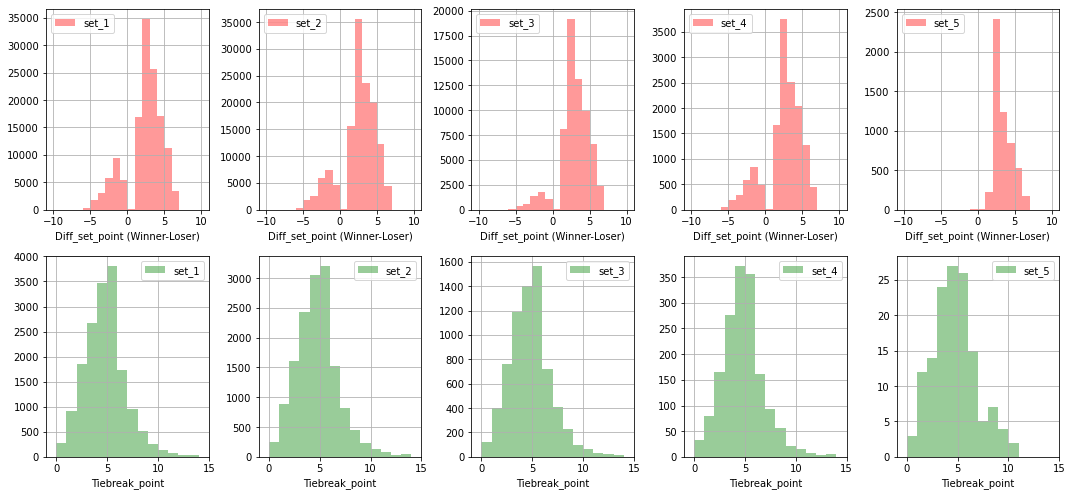

In [40]:
# player performance point

col_player_pf2 = ['diff_set_1','diff_set_2','diff_set_3','diff_set_4','diff_set_5',
                 'set_1_tb','set_2_tb','set_3_tb','set_4_tb','set_5_tb']

plt.figure(figsize=(15,7))

for i in range(0,5):
    
    plt.subplot(2,5,i+1)
    plt.grid()
    sns.distplot(matrix[col_player_pf2[i]],kde=False,color='red',bins=range(-10,10,1))
    plt.xlabel('Diff_set_point (Winner-Loser)')
    plt.xlim(-11,11)
    plt.legend(['set_'+str(i+1)])
    
    plt.subplot(2,5,i+6)
    plt.grid()
    sns.distplot(matrix[col_player_pf2[i+5]],kde=False,color='green',bins=range(0,15,1))
    plt.xlabel('Tiebreak_point')
    plt.legend(['set_'+str(i+1)])
    plt.xlim(-1,15)
    
     
plt.tight_layout() 

### * A more indepth analysis of a player's performance 

The above overall analysis shows that some features are correlated to the outcome of the match. We can further analyze how these performance statistic change for different players over time. Does the short term averaged performance in the past provide accurate estimation of performance of a player in the coming game? 

In [112]:
import importlib
importlib.reload(tennis_EDA)

<module 'tennis_EDA' from 'D:\\jon documents\\jon documents at ANU\\Data science\\Tennis_winner\\tennis_EDA.py'>

We can have a more in-depth analysis of a player's performance change over years, take Federer as an example: 

From 1990-2020,Roger Federer has played in 389 tournaments, won 103 tournaments; in total played 1525 matches, and won 1250 matches.


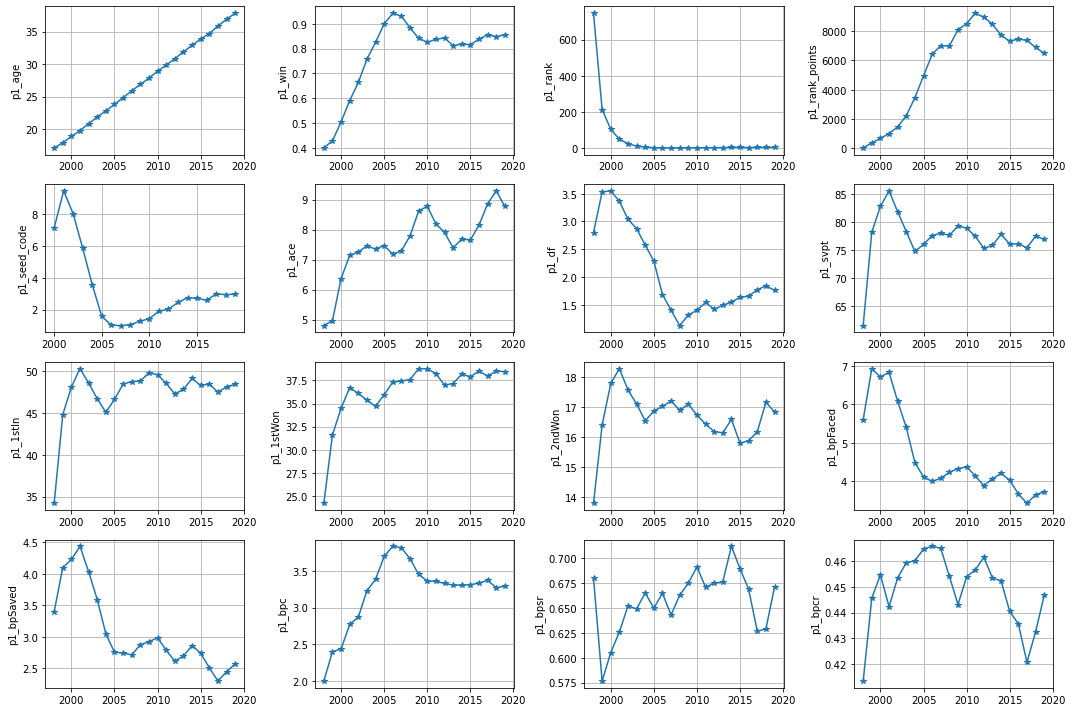

In [171]:
plt.figure(figsize=(15,10))
matrix_player_new,matrix_player_year_ave = tennis_EDA.player_record(matrix,player_name = 'Roger Federer',
                                                                    year_min=1990,year_max=2020,year_mov_ave=3,flag_plot = True)


We can also find out who are the top opponents of a player. Take Federer as an example:

From 1988-2020,Roger Federer has played in 389 tournaments, won 103 tournaments; in total played 1525 matches, and won 1250 matches.


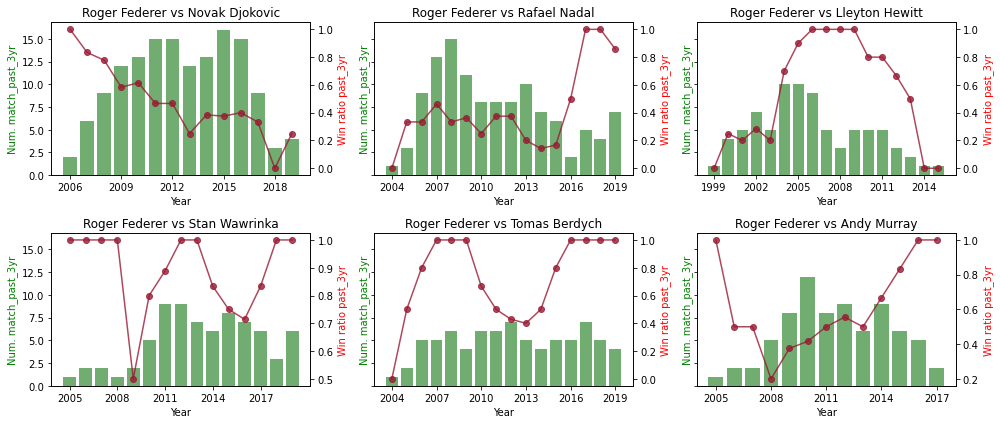

In [172]:
player_opponent_record,top_opponents = tennis_EDA.player_vs_opponent(
   matrix,player_name = 'Roger Federer',year_min=1990,year_max=2020,year_mov_ave=3,flag_plot = True)

In [97]:
top_opponents.head(6)

p2_name  num_comp  num_win  win_ratio
0  Novak Djokovic        51     23.0   0.450980
1    Rafael Nadal        41     17.0   0.414634
2  Lleyton Hewitt        27     18.0   0.666667
3   Stan Wawrinka        27     24.0   0.888889
4   Tomas Berdych        26     20.0   0.769231
5     Andy Murray        25     14.0   0.560000

We can now compare different players easily using the module tennis_EDA. As an example, we choose the top 3 players: Roger Federer,Rafael Nadal,Novak Djokovic

From 1990-2020,Roger Federer has played in 389 tournaments, won 103 tournaments; in total played 1525 matches, and won 1250 matches.
From 1990-2020,Rafael Nadal has played in 302 tournaments, won 85 tournaments; in total played 1203 matches, and won 998 matches.
From 1990-2020,Novak Djokovic has played in 279 tournaments, won 80 tournaments; in total played 1110 matches, and won 923 matches.


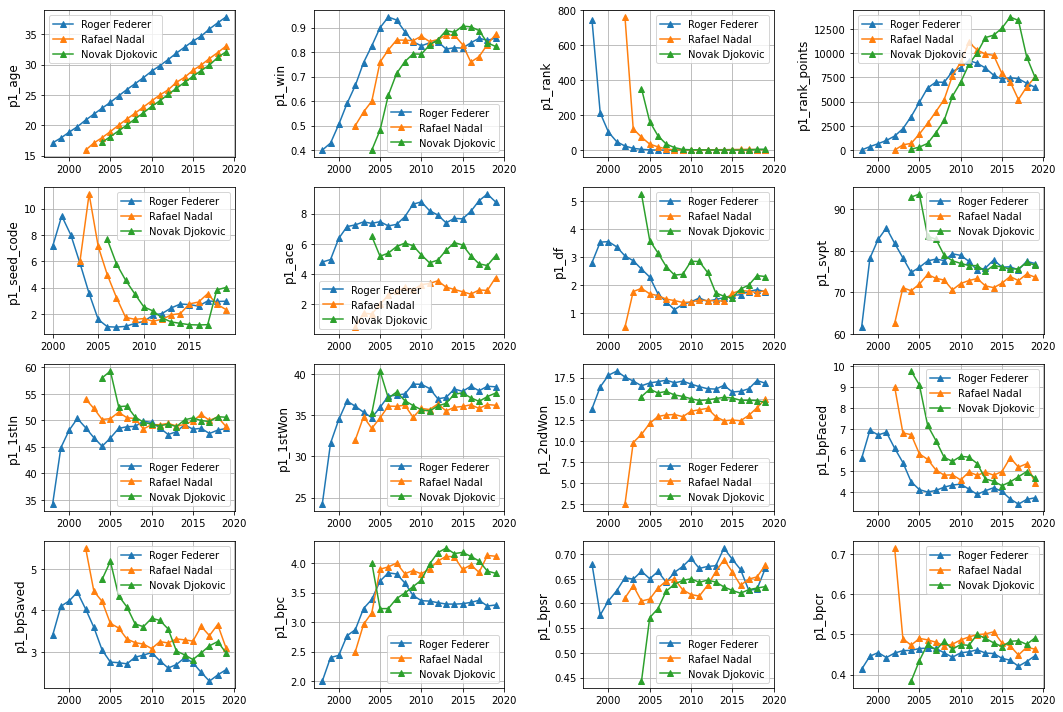

In [173]:
players = ['Roger Federer','Rafael Nadal','Novak Djokovic']

plt.figure(figsize=(15,10))
   
tennis_EDA.player_compare(matrix, players,year_min=1990,year_max=2020,year_mov_ave=3,flag_plot = True,flag_legend=True)
    

The performance statistics of the three top players are quite close in most aspects. There are a couple of metrics that showed noticable difference:
* Number of ace, 1stWon, 2ndWond, Federer>Djokovic>Nadal.
* BPC & BPCR: Nadel~Djokovic > Federer

We can also analyse the competition historic information for any two players, and return their moving averaged performance when competing each other over the plast N games 

In [220]:
import importlib
importlib.reload(tennis_EDA)
importlib.reload(data_cleansing)

<module 'data_cleansing' from 'D:\\jon documents\\jon documents at ANU\\Data science\\Tennis_winner\\data_cleansing.py'>

Let's check how the performance of two competitors change overtime 

From 2000 to 2020, Roger Federer and Novak Djokovic have competed in 50 tournaments, in total played 51 matches, Roger Federer won 23 matches, Novak Djokovic won 28 matches.


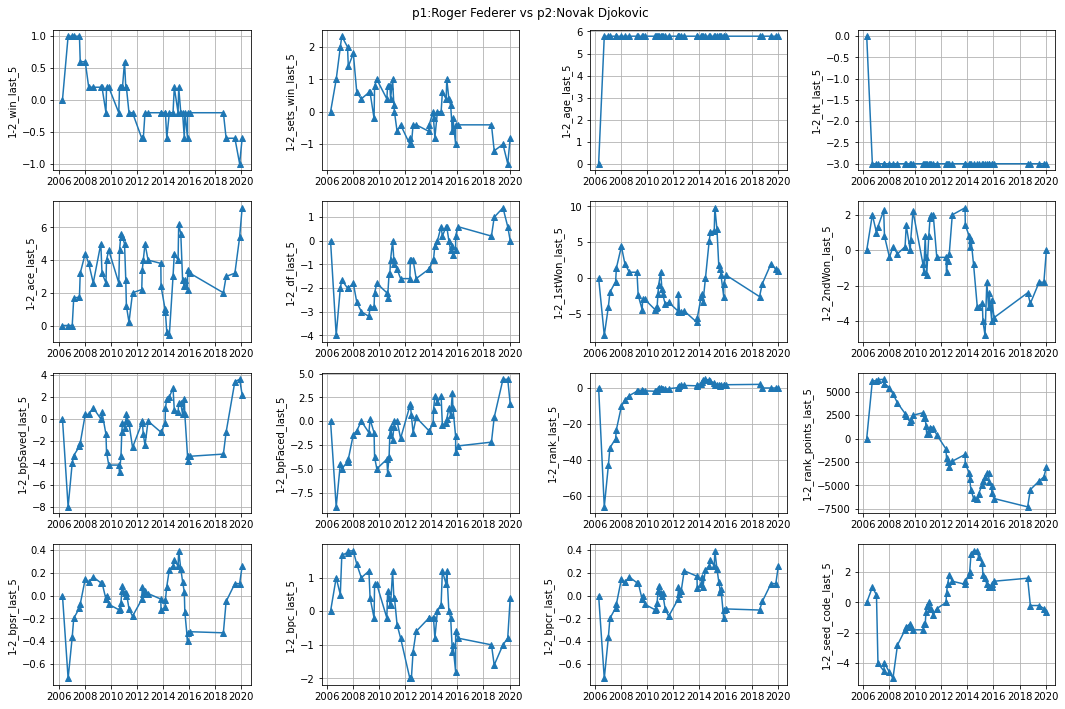

In [221]:
plt.figure(figsize=(15,10))
comp_record = tennis_EDA.player_opponent_lastN(matrix = matrix,player_1_name = 'Roger Federer',player_2_name = 'Novak Djokovic',
                                    year_min = 2000,year_max=2020, n_past_match=5,flag_plot=True)
    

Basic match statistics

From 2000 to 2020, Roger Federer and Novak Djokovic have competed in 50 tournaments, in total played 51 matches, Roger Federer won 23 matches, Novak Djokovic won 28 matches.


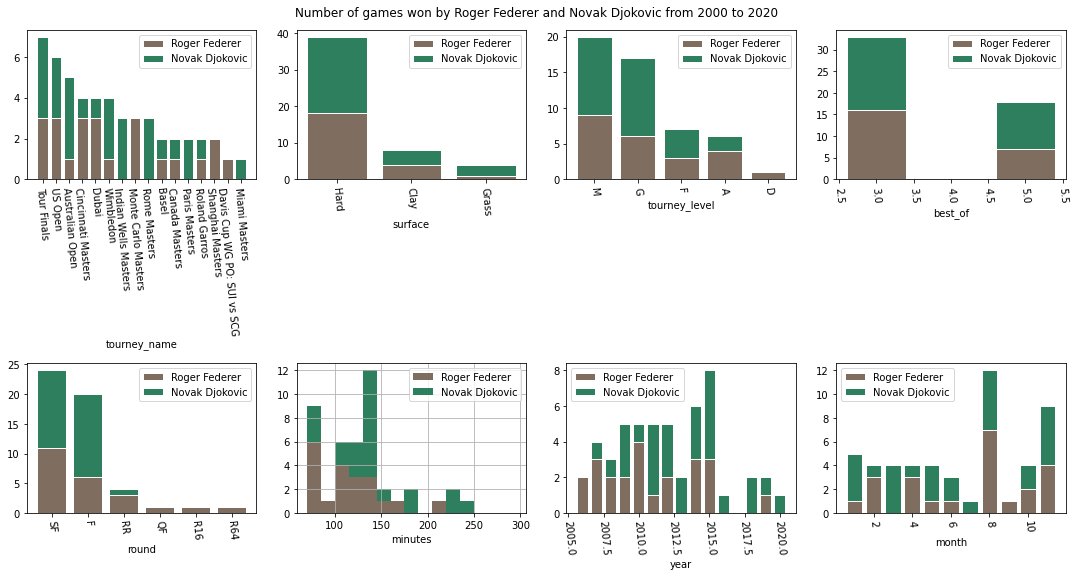

In [216]:
tennis_EDA.player_opponent_match(matrix,col_match,player_1_name = 'Roger Federer',player_2_name = 'Novak Djokovic',
                                    year_min = 2000,year_max=2020)

We can have a glimp how the performance data of the past games are correlated to the winning.

In [223]:
col_self_corr = ['p1_win','1-2_win_last_5', '1-2_sets_win_last_5',
       '1-2_age_last_5', '1-2_ht_last_5', '1-2_ace_last_5', '1-2_df_last_5',
       '1-2_1stWon_last_5', '1-2_2ndWon_last_5', '1-2_bpSaved_last_5',
       '1-2_bpFaced_last_5', '1-2_rank_last_5', '1-2_rank_points_last_5',
       '1-2_bpsr_last_5', '1-2_bpc_last_5', '1-2_bpcr_last_5',
       '1-2_seed_code_last_5']

In [225]:
fed_djo_corr = comp_record[col_self_corr].corr(method='pearson') 

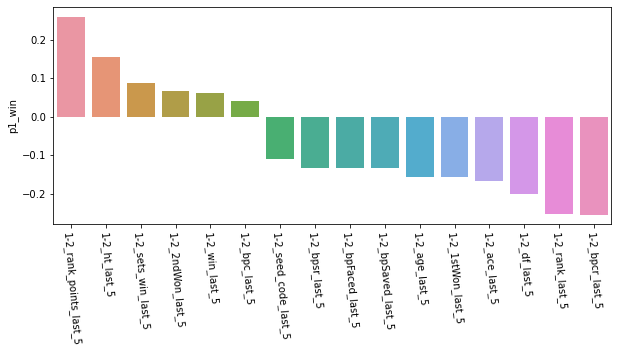

In [234]:
fed_corr = fed_djo_corr['p1_win'].sort_values(ascending = False)[1:]

plt.figure(figsize=(10,4))
sns.barplot(fed_corr.index,fed_corr);
plt.xticks(rotation = -85);

 <a id='Feature'></a>
 ##  4. [Data preparation and feature engineering](#Contents)

Below we will start adding new features. Since the final goal is to predict the outcome of the match, we will use the matrix_n with p1/p2.

* One important factor that have shown a good accuracy in predicting winner is the Elo rating: https://www.betfair.com.au/hub/tennis-elo-modelling/

The Elo rating is a system that calculates not only the number of matches a player won, but also what level of opponents a player has won. 

* Each player starts with an Elo rating of 1500, the player's winning propability is given by

\begin{equation}
p_{win} = [1+10^{(Elo_{opp}-Elo_{player})/400}]^{-1}
\end{equation}

The 400 in the formula is designed such that a difference of 200 rating points would mean that the stronger player has an expected winning probability of approximately 0.75. The Elo of the player will be updated after the jth match

\begin{equation}
Elo_{j+1} = Elo_{j} + K (outcome - p_{win})
\end{equation}

where outcome = 1 for winning and 0 for losing.

The K factor can be a constant 32, but more accurate model suggest to use a decay function  

\begin{equation}
K=\frac{c}{(M+o)^s}
\end{equation}

where c is a constant, M is the number of matches in the player’s dataset, o is a small offset (to avoid very large values when M is low), and s is a shape parameter which allows for more flexibility in the curve’s shape.

In fivethirtyeight.com, they use the following parameters: $c=250, o=5, s = 0.4$

* Increasing $c$ will increase the weight of each matches, while increasing $s$ means that future matches will have a smaller impact on the Elo rating, assuming the player's performance is more stable.


In [12]:
import importlib
importlib.reload(tennis_features)

<module 'tennis_features' from 'D:\\jon documents\\jon documents at ANU\\Data science\\Tennis_winner\\tennis_features.py'>

Text(0, 0.5, 'K')

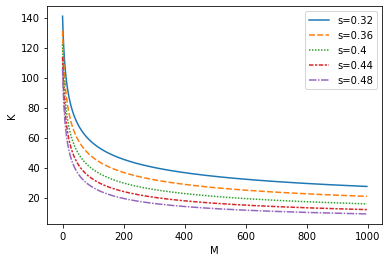

In [183]:
C = 250
M = np.arange(1,1000)
o = 5
K = pd.DataFrame()
i = 0
for s in np.arange(0.32,0.49,0.04):
    K['s='+str(round(s,2))] = C/(M+o)**s
    i+=1

plt.figure
sns.lineplot(data = K)
plt.xlabel('M')
plt.ylabel('K')
#plt.legend()

In [13]:
# add Elo rating features
#matrix_n= tennis_features.Elo_rating(matrix_n,s=0.54)

Text(0.5, 0, 'Tourney date')

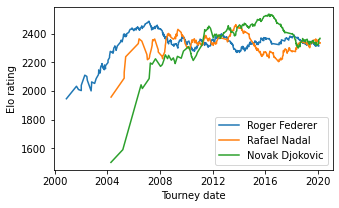

In [247]:
plt.figure(figsize=(5,3))
plt.plot(matrix_n[matrix_n.p1_name == 'Roger Federer']['tourney_date'],matrix_n[matrix_n.p1_name == 'Roger Federer']['Elo_1_s0.4'])
plt.plot(matrix_n[matrix_n.p1_name == 'Rafael Nadal']['tourney_date'],matrix_n[matrix_n.p1_name == 'Rafael Nadal']['Elo_1_s0.4'])
plt.plot(matrix_n[matrix_n.p1_name == 'Novak Djokovic']['tourney_date'],matrix_n[matrix_n.p1_name == 'Novak Djokovic']['Elo_1_s0.4'])

plt.legend(['Roger Federer','Rafael Nadal','Novak Djokovic'])
plt.ylabel('Elo rating')
plt.xlabel('Tourney date')

The second feature to add is the averaged performance of the two players when they are competing each other over the last N matches.

In [29]:
importlib.reload(tennis_features)

<module 'tennis_features' from 'D:\\jon documents\\jon documents at ANU\\Data science\\Tennis_winner\\tennis_features.py'>

In [10]:
# add feature of last N competitions
matrix_n = tennis_features.p1p2_lastN(matrix_n, n_past_match=10, year_start=min(matrix_n.year),year_end=max(matrix_n.year),col_p = None)

Start calculating record of last 10 matches:
100%finished
Time elapsed: 524.6 mins


In [26]:
# import sys

# # These are the usual ipython objects, including this one you are creating
# ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# # Get a sorted list of the objects and their sizes
# sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

In [129]:
matrix_n.to_pickle("./tennis_matrix3_n.pkl")

In [6]:
matrix_n = pd.read_pickle("./tennis_matrix3_n.pkl")


In [9]:
if 'key_0' in matrix_n.columns:
    matrix_n = matrix_n.drop(columns = 'key_0',axis=1)
matrix_n.head(3)

tourney_name surface  draw_size tourney_level tourney_date    year  month  \
0     Auckland    Hard       32.0             A   1985-01-07  1985.0    1.0   
1     Auckland    Hard       32.0             A   1985-01-07  1985.0    1.0   
2     Auckland    Hard       32.0             A   1985-01-07  1985.0    1.0   

   day  day_week  match_num best_of round  minutes     p1_id p1_seed p1_entry  \
0  7.0       0.0        1.0     3.0   R32      NaN  100713.0       1      NaN   
1  7.0       0.0        2.0     3.0   R32      NaN  100179.0     NaN      NaN   
2  7.0       0.0        3.0     3.0   R32      NaN  100798.0     NaN      NaN   

           p1_name p1_hand  p1_ht p1_ioc     p1_age  p1_ace  p1_df  p1_svpt  \
0  John Fitzgerald       R  183.0    AUS  24.027379     NaN    NaN      NaN   
1      Karl Meiler       R  178.0    GER  35.690623     NaN    NaN      NaN   
2     Howard Sands       R  173.0    USA  22.921287     NaN    NaN      NaN   

   p1_1stIn  p1_1stWon  p1_2ndWon  p1_SvGms  p1_bpSaved  p1_bpFaced  p1_rank  \
0       NaN        NaN        NaN       NaN         NaN         NaN     29.0   
1       NaN        NaN        NaN       NaN         NaN         NaN    180.0   
2       NaN        NaN        NaN       NaN         NaN         NaN    170.0   

   p1_rank_points  p1_set_1  p1_set_2  p1_set_3  p1_set_4  p1_set_5  p1_bpsr  \
0             NaN       2.0       6.0       6.0       NaN       NaN      NaN   
1             NaN       2.0       6.0       6.0       NaN       NaN      NaN   
2             NaN       3.0       6.0       6.0       NaN       NaN      NaN   

   p1_bpc  p1_bpcr  p1_seed_code  p1_hand_code     p2_id p2_seed p2_entry  \
0     NaN      NaN           1.0           1.0  100771.0     NaN      NaN   
1     NaN      NaN           NaN           1.0  100840.0     NaN      NaN   
2     NaN      NaN           NaN           1.0  101145.0     NaN      NaN   

           p2_name p2_hand  p2_ht p2_ioc     p2_age  ...  \
0   Kelvin Belcher       R  185.0    USA  23.299110  ...   
1  Mark Wooldridge       R  188.0    USA  22.505133  ...   
2  Jonathan Canter       R  185.0    USA  19.594798  ...   

   p2_seed_code_past_6m  1-2_win_past_6m  1-2_sets_win_past_6m  \
0                   0.0              0.0                   0.0   
1                   0.0              0.0                   0.0   
2                   0.0              0.0                   0.0   

   1-2_ace_past_6m  1-2_df_past_6m  1-2_1stWon_past_6m  1-2_2ndWon_past_6m  \
0              0.0             0.0                 0.0                 0.0   
1              0.0             0.0                 0.0                 0.0   
2              0.0             0.0                 0.0                 0.0   

   1-2_bpSaved_past_6m  1-2_bpFaced_past_6m  1-2_rank_past_6m  \
0                  0.0                  0.0               0.0   
1                  0.0                  0.0               0.0   
2                  0.0                  0.0               0.0   

   1-2_rank_points_past_6m  1-2_bpsr_past_6m  1-2_bpc_past_6m  \
0                      0.0               0.0              0.0   
1                      0.0               0.0              0.0   
2                      0.0               0.0              0.0   

   1-2_bpcr_past_6m  1-2_seed_code_past_6m  1-2_seed_code  1-2_rank  \
0               0.0                    0.0            NaN    -166.0   
1               0.0                    0.0            NaN      16.0   
2               0.0                    0.0            NaN     -69.0   

       pair_code  y_pred_cat_pca  y_pred_cat  y_pred_cat_prob_1-2  \
0  100713/100771             1.0         1.0             0.149997   
1  100179/100840             0.0         0.0            -0.108307   
2  100798/101145             1.0         1.0             0.087902   

   y_pred_cat_pca_prob_1-2  Elo_1_s0.26  Elo_2_s0.26  p1_win_pred_s0.26  \
0                 0.251152       1500.0       1500.0                0.5   
1                -0.144333       1500.0

In [14]:
# add feature of sum performance past N month

matrix_n = tennis_features.last_Nmonth(matrix_n, n_past_month=12, year_start=min(matrix_n.year),year_end=max(matrix_n.year),col_p = None)

Start calculating record of last 12 matches:
100%finished
Time elapsed: 1024.2 mins


In [12]:
matrix_n[matrix_n.p1_name == 'Roger Federer']['p1_win_past_6m']

57969     16.0
60679     11.0
61179     12.0
61452      8.0
61466      8.0
          ... 
116556    15.0
116576    15.0
116586    15.0
116591    15.0
116594    15.0
Name: p1_win_past_6m, Length: 893, dtype: float64

In [20]:
matrix_n['1-2_seed_code'] = matrix_n['p1_seed_code'] - matrix_n['p2_seed_code']
matrix_n['1-2_rank'] = matrix_n['p1_rank'] - matrix_n['p2_rank']

In [77]:
matrix_n.to_pickle("./tennis_matrix3_n.pkl")

Elo rating seems so far the best predictor. However, Elo account for long term performance, it might be useful to define a new short term Elo rating that have more emphasis on recent performance.



* Let's have a look how the features are correlated to the winning/losing  

We will use the difference features between player 1 and player2 as the correlation input, features that have '1-2' in their labels.

In [16]:
matrix_n.columns[250:350]

Index(['p2_bpcr_past_12m', 'p2_seed_code_past_12m', '1-2_win_past_12m',
       '1-2_sets_win_past_12m', '1-2_ace_past_12m', '1-2_df_past_12m',
       '1-2_1stWon_past_12m', '1-2_2ndWon_past_12m', '1-2_bpSaved_past_12m',
       '1-2_bpFaced_past_12m', '1-2_rank_past_12m', '1-2_rank_points_past_12m',
       '1-2_bpsr_past_12m', '1-2_bpc_past_12m', '1-2_bpcr_past_12m',
       '1-2_seed_code_past_12m'],
      dtype='object')

In [17]:

col_corr = ['year','month','1-2_seed_code', '1-2_rank', '1-2_age', '1-2_ht','Elo_1-2_s0.4', 'Elo_sf_1-2_s0.4',
       'win_pred_1-2_s0.4', 'win_pred_sf_1-2_s0.4','Elo_1-2_s0.26', 'Elo_sf_1-2_s0.26',
       'win_pred_1-2_s0.26', 'win_pred_sf_1-2_s0.26','1-2_win_last_10', '1-2_sets_win_last_10', '1-2_ace_last_10',
       '1-2_df_last_10', '1-2_1stWon_last_10', '1-2_2ndWon_last_10',
       '1-2_bpSaved_last_10', '1-2_bpFaced_last_10', '1-2_rank_last_10',
       '1-2_rank_points_last_10', '1-2_bpsr_last_10', '1-2_bpc_last_10',
       '1-2_bpcr_last_10', '1-2_seed_code_last_10', '1-2_win_past_6m', '1-2_sets_win_past_6m',
       '1-2_ace_past_6m', '1-2_df_past_6m', '1-2_1stWon_past_6m',
       '1-2_2ndWon_past_6m', '1-2_bpSaved_past_6m', '1-2_bpFaced_past_6m',
       '1-2_rank_past_6m', '1-2_rank_points_past_6m', '1-2_bpsr_past_6m',
       '1-2_bpc_past_6m', '1-2_bpcr_past_6m', '1-2_seed_code_past_6m','1-2_win_past_12m',
       '1-2_sets_win_past_12m', '1-2_ace_past_12m', '1-2_df_past_12m',
       '1-2_1stWon_past_12m', '1-2_2ndWon_past_12m', '1-2_bpSaved_past_12m',
       '1-2_bpFaced_past_12m', '1-2_rank_past_12m', '1-2_rank_points_past_12m',
       '1-2_bpsr_past_12m', '1-2_bpc_past_12m', '1-2_bpcr_past_12m',
       '1-2_seed_code_past_12m','p1_win']


col_corr.sort()
        
corr_matrix = matrix_n[col_corr].corr()

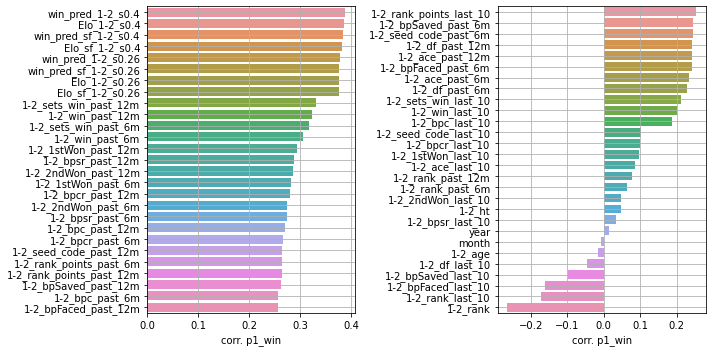

In [18]:
corr_win = corr_matrix['p1_win'].sort_values(ascending=False)

n_half = round(len(corr_win)/2)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.barplot(corr_win[1:n_half],corr_win.index[1:n_half]);
#plt.xticks(rotation = 90);
plt.xlabel('corr. p1_win')
plt.grid()
plt.subplot(1,2,2)
sns.barplot(corr_win[n_half:-1],corr_win.index[n_half:-1]);
#plt.xticks(rotation = 90);
plt.xlabel('corr. p1_win')
plt.grid()
plt.tight_layout()

We should have a carefully check on the mutual correlation of the feature variables. Including highly correlated features can over emphasize their contribution in the model, lead to instability and hard to explain result, even using priciple component analysis.  https://stats.stackexchange.com/questions/50537/should-one-remove-highly-correlated-variables-before-doing-pca

In [19]:
import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

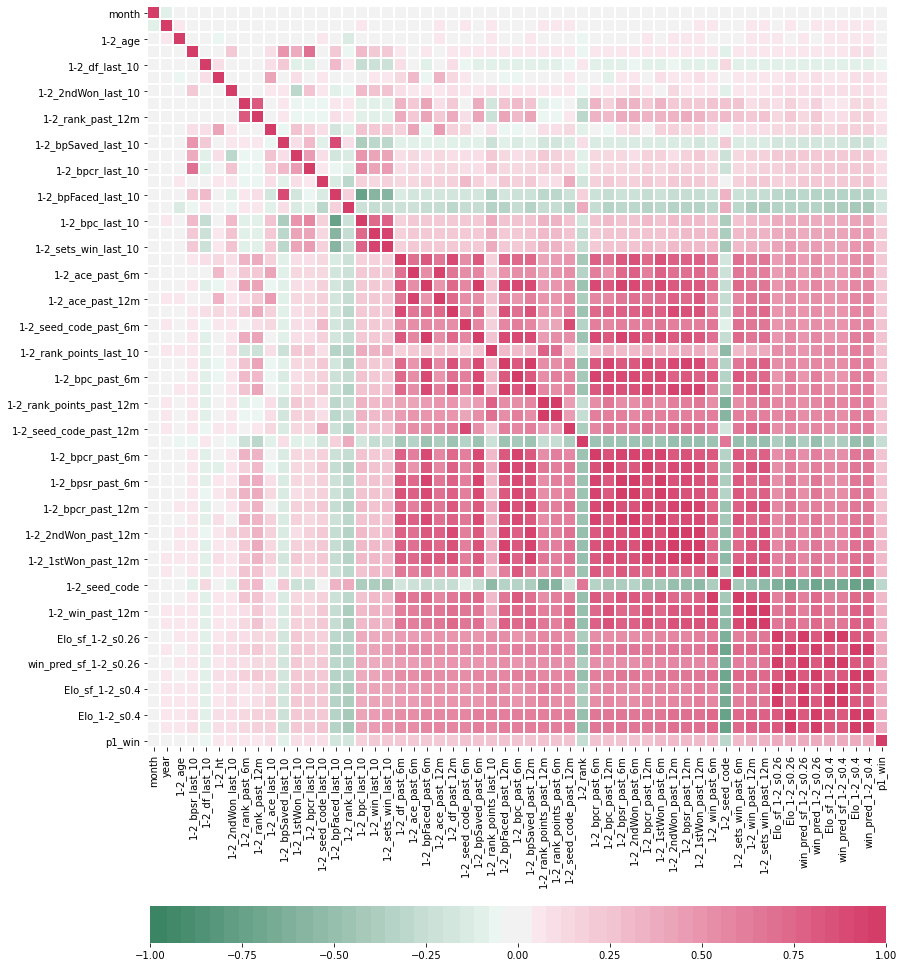

In [20]:
#corr_matrix = cluster_corr(corr_matrix)

# re-order the columns accordin to the absolute value of correlation coefficients
col_corr = abs(corr_matrix['p1_win']).sort_values(ascending=True).index

corr_matrix = matrix_n[col_corr].corr()

plt.figure(figsize = (15,15))

ax=sns.heatmap(corr_matrix,vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(150,0, n=50),
            square=True,
            cbar_kws={'orientation':'horizontal','shrink':0.7},     
            linewidths = 1,
            linecolor = 'white',
            #annot=True,  
           # mask=mask_ut,
        );

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center');
plt.tight_layout()

It seems there are quite a number of highly correlated features. We can filter them out. 

In [27]:
drop_features = []

# threshold to define if the features are highly correlated
thre = 0.9

for i in np.arange(len(corr_matrix)):
    for j in np.arange(i+1,len(corr_matrix)):
        if abs(corr_matrix.iloc[i,j])> thre:
            drop_features.append(corr_matrix.columns[i])
        
drop_features = list(dict.fromkeys(drop_features))
drop_features


['1-2_win_last_10',
 '1-2_ace_past_6m',
 '1-2_bpFaced_past_6m',
 '1-2_bpSaved_past_6m',
 '1-2_bpFaced_past_12m',
 '1-2_bpc_past_6m',
 '1-2_bpSaved_past_12m',
 '1-2_rank_points_past_12m',
 '1-2_bpcr_past_6m',
 '1-2_bpc_past_12m',
 '1-2_bpsr_past_6m',
 '1-2_2ndWon_past_6m',
 '1-2_bpcr_past_12m',
 '1-2_2ndWon_past_12m',
 '1-2_bpsr_past_12m',
 '1-2_win_past_6m',
 '1-2_win_past_12m',
 'Elo_sf_1-2_s0.26',
 'Elo_1-2_s0.26',
 'win_pred_sf_1-2_s0.26',
 'win_pred_1-2_s0.26',
 'Elo_sf_1-2_s0.4',
 'Elo_1-2_s0.4']

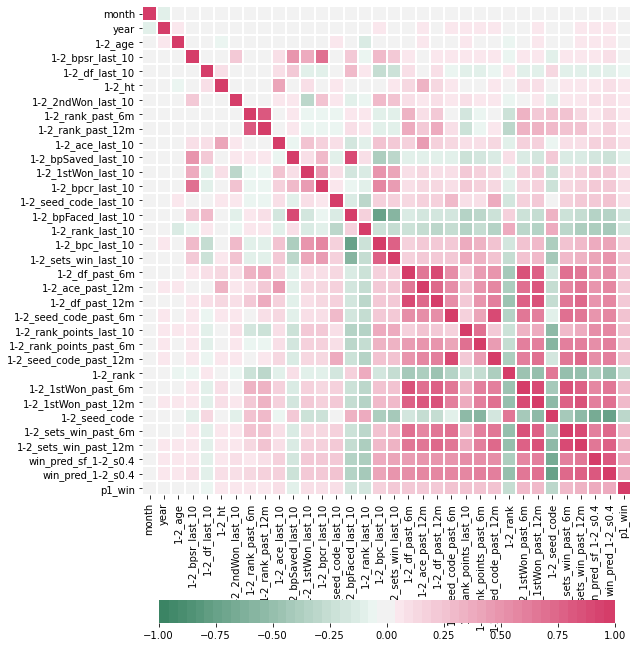

In [28]:
corr_matrix_filtered = matrix_n[col_corr].drop(drop_features, axis=1).corr()

plt.figure(figsize = (10,10))

ax=sns.heatmap(corr_matrix_filtered,
               vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(150,0, n=50),
            square=True,
            cbar_kws={'orientation':'horizontal','shrink':0.7},     
            linewidths = 1,
            linecolor = 'white',
            #annot=True,  
           # mask=mask_ut,
        );

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'); 

plt.tight_layout()

In [29]:
corr_matrix_filtered.columns

Index(['month', 'year', '1-2_age', '1-2_bpsr_last_10', '1-2_df_last_10',
       '1-2_ht', '1-2_2ndWon_last_10', '1-2_rank_past_6m', '1-2_rank_past_12m',
       '1-2_ace_last_10', '1-2_bpSaved_last_10', '1-2_1stWon_last_10',
       '1-2_bpcr_last_10', '1-2_seed_code_last_10', '1-2_bpFaced_last_10',
       '1-2_rank_last_10', '1-2_bpc_last_10', '1-2_sets_win_last_10',
       '1-2_df_past_6m', '1-2_ace_past_12m', '1-2_df_past_12m',
       '1-2_seed_code_past_6m', '1-2_rank_points_last_10',
       '1-2_rank_points_past_6m', '1-2_seed_code_past_12m', '1-2_rank',
       '1-2_1stWon_past_6m', '1-2_1stWon_past_12m', '1-2_seed_code',
       '1-2_sets_win_past_6m', '1-2_sets_win_past_12m', 'win_pred_sf_1-2_s0.4',
       'win_pred_1-2_s0.4', 'p1_win'],
      dtype='object')

 <a id='Model'></a>
 ##  5. [Model building and evaluation](#Contents)

* Baseline models

In [32]:
from sklearn.metrics import accuracy_score

year_start = 1985
year_train = 2010
year_val = 2015
year_end = 2019

year_begin = 2010

condition = (matrix_n.year> year_begin)&(matrix_n.year<= year_end)
y_true = matrix_n[condition]['p1_win']
y_pred_elo = matrix_n[condition]['win_pred_1-2_s0.4'] > 0
acc_elo = accuracy_score(y_true, y_pred_elo)
print('The accuracy of winner prediction based on Elo_s0.4 is: {}%'.format(round(acc_elo*100,3)))

y_pred_elosf = matrix_n[condition]['win_pred_sf_1-2_s0.4'] > 0
acc_elosf = accuracy_score(y_true, y_pred_elosf)
print('The accuracy of winner prediction based on Elo_sf_s0.4 is: {}%'.format(round(acc_elosf*100,3)))

condition = (matrix_n.year> year_begin)&(matrix_n.year<= year_end)
y_true = matrix_n[condition]['p1_win']
y_pred_elo = matrix_n[condition]['win_pred_1-2_s0.26'] > 0
acc_elo = accuracy_score(y_true, y_pred_elo)
print('The accuracy of winner prediction based on Elo_s0.26 is: {}%'.format(round(acc_elo*100,3)))

y_pred_elosf = matrix_n[condition]['win_pred_sf_1-2_s0.26'] > 0
acc_elosf = accuracy_score(y_true, y_pred_elosf)
print('The accuracy of winner prediction based on Elo_sf_s0.26 is: {}%'.format(round(acc_elosf*100,3)))

y_pred_rank = matrix_n[condition]['1-2_rank'] < 0 
acc_rank = accuracy_score(y_true, y_pred_rank)
print('The accuracy of winner prediction based on ranking is: {}%'.format(round(acc_rank*100,3)))


y_pred_win_6m = matrix_n[condition]['1-2_win_past_6m'] > 0 
acc_win_6m= accuracy_score(y_true, y_pred_win_6m)
print('The accuracy of winner prediction based on win_6m is: {}%'.format(round(acc_win_6m*100,3)))

y_pred_win_12m = matrix_n[condition]['1-2_win_past_12m'] > 0 
acc_win_12m= accuracy_score(y_true, y_pred_win_12m)
print('The accuracy of winner prediction based on win_12m is: {}%'.format(round(acc_win_12m*100,3)))


y_pred_win_ratio = matrix_n[condition]['1-2_win_last_10'] > 0 
acc_win_ratio= accuracy_score(y_true, y_pred_win_ratio)
print('The accuracy of winner prediction based on win_ratio_last_10 is: {}%'.format(round(acc_win_ratio*100,3)))



The accuracy of winner prediction based on Elo_s0.4 is: 67.704%
The accuracy of winner prediction based on Elo_sf_s0.4 is: 67.362%
The accuracy of winner prediction based on Elo_s0.26 is: 67.199%
The accuracy of winner prediction based on Elo_sf_s0.26 is: 66.735%
The accuracy of winner prediction based on ranking is: 65.659%
The accuracy of winner prediction based on win_6m is: 62.987%
The accuracy of winner prediction based on win_12m is: 64.04%
The accuracy of winner prediction based on win_ratio_last_10 is: 53.402%


In [33]:
acc_baseline = pd.DataFrame()
acc_baseline['Elo'] = [acc_elo * 100]
acc_baseline['Elo_sf'] = [acc_elosf * 100]
acc_baseline['Rank'] = [acc_rank * 100]
acc_baseline['Win_1-2_6m'] = [acc_win_6m * 100]
acc_baseline['Win_1-2_12m'] = [acc_win_12m * 100]
acc_baseline['Win_ratio_last_10'] = [acc_win_ratio * 100]
acc_baseline

Elo     Elo_sf       Rank  Win_1-2_6m  Win_1-2_12m  Win_ratio_last_10
0  67.198784  66.735082  65.659445   62.987457    64.040289          53.401748

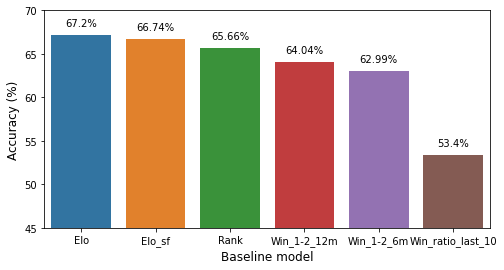

In [34]:
acc_baseline = pd.DataFrame()
acc_baseline['Elo'] = [acc_elo * 100]
acc_baseline['Elo_sf'] = [acc_elosf * 100]
acc_baseline['Rank'] = [acc_rank * 100]
acc_baseline['Win_1-2_12m'] = [acc_win_12m * 100]
acc_baseline['Win_1-2_6m'] = [acc_win_6m * 100]
acc_baseline['Win_ratio_last_10'] = [acc_win_ratio * 100]
acc_baseline

plt.figure(figsize =(8,4))
bar1 = sns.barplot(data=acc_baseline)
plt.ylim(45,70)
plt.ylabel('Accuracy (%)',fontsize=12)
plt.xlabel('Baseline model',fontsize=12)

 
for i, col in enumerate(acc_baseline.columns):
    
    bar1.text(i,acc_baseline[col].values+1, str(np.round(acc_baseline.loc[0,col],2))+'%', color='black', ha="center")

* Logistic regression

In [ ]:
# Import LogisticRegression and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE (recursive feature elimination) and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15) 

train_data,val_data,test_data,X_total\
= model_training.train_test_split (matrix = matrix_n, flag_pca = 0, n_components = None, 
                                   year_start = year_start, year_train = year_train,year_val = year_val, year_end = year_end,
                                 col_catfeature = col_catfeature, col_numfeature = col_numfeature, col_target = col_target,
                                   one_hot_catfeature = False)

X_train, y_train = train_data
X_val, y_val = val_data
X_test, y_test = test_data
    
rfe = rfe.fit(X_train, y_train)

* Tree model: CatBoost

In [35]:
#!pip install catboost
import catboost
print(catboost.__version__)

0.23.2


In [36]:
# catboost for classification
from numpy import mean
from numpy import std
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn import decomposition

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [1]:
import model_training

Using TensorFlow backend.


In [38]:
matrix_n['pair_code'] = matrix_n['p1_id'].astype(np.int64).map(str)+'/'+matrix_n['p2_id'].astype(np.int64).map(str)

In [39]:
# choose features and target to put in the model
col_catfeature = ['tourney_level','surface','pair_code','best_of','round','p1_entry','p2_entry']

# choose the ones filtered after correlation analysis
col_numfeature = ['month', 'year', '1-2_age', '1-2_bpsr_last_10', '1-2_df_last_10',
       '1-2_ht', '1-2_2ndWon_last_10', '1-2_rank_past_6m', '1-2_rank_past_12m',
       '1-2_ace_last_10', '1-2_bpSaved_last_10', '1-2_1stWon_last_10',
       '1-2_bpcr_last_10', '1-2_seed_code_last_10', '1-2_bpFaced_last_10',
       '1-2_rank_last_10', '1-2_bpc_last_10', '1-2_sets_win_last_10',
       '1-2_df_past_6m', '1-2_ace_past_12m', '1-2_df_past_12m',
       '1-2_seed_code_past_6m', '1-2_rank_points_last_10',
       '1-2_rank_points_past_6m', '1-2_seed_code_past_12m', '1-2_rank',
       '1-2_1stWon_past_6m', '1-2_1stWon_past_12m', '1-2_seed_code',
       '1-2_sets_win_past_6m', '1-2_sets_win_past_12m', 'win_pred_sf_1-2_s0.4',
       'win_pred_1-2_s0.4', ] 

col_target = ['p1_win']


matrix_n[col_catfeature]=matrix_n[col_catfeature].fillna('NaN').astype(str)
print(matrix_n[col_catfeature].info())
print(matrix_n[col_numfeature].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117049 entries, 0 to 117048
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tourney_level  117049 non-null  object
 1   surface        117049 non-null  object
 2   pair_code      117049 non-null  object
 3   best_of        117049 non-null  object
 4   round          117049 non-null  object
 5   p1_entry       117049 non-null  object
 6   p2_entry       117049 non-null  object
dtypes: object(7)
memory usage: 12.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117049 entries, 0 to 117048
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    117049 non-null  float64
 1   year                     117049 non-null  float64
 2   1-2_age                  116218 non-null  float64
 3   1-2_bpsr_last_10         50762 non-null   float64
 4   1-

In [40]:
# flag_pca = 1 means to perform principle component analysis

flag_pca =0

year_start = 1985
year_train = 2005
year_val = 2012
year_end = 2019

We first choose several important features from the feature matrix without using PCA. These features are chosen by first putting all the features in the matrix_n in the catboost model, trained and filtered based on their feature importance. 

Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


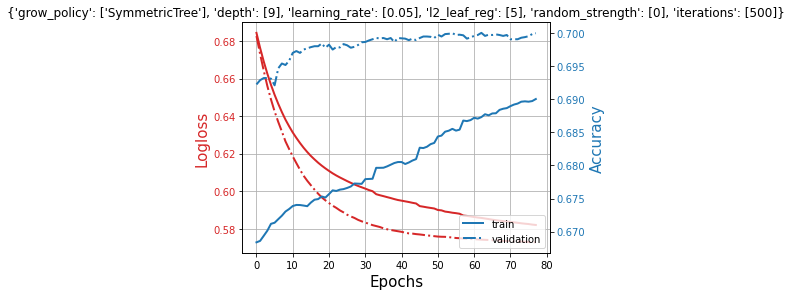

In [41]:
# choose features and target to put in the model
col_catfeature = ['tourney_level','surface','pair_code','best_of','round','p1_entry','p2_entry']

# choose the ones filtered after correlation analysis
col_numfeature = ['month', 'year', '1-2_age', '1-2_bpsr_last_10', '1-2_df_last_10',
       '1-2_ht', '1-2_2ndWon_last_10', '1-2_rank_past_6m', '1-2_rank_past_12m',
       '1-2_ace_last_10', '1-2_bpSaved_last_10', '1-2_1stWon_last_10',
       '1-2_bpcr_last_10', '1-2_seed_code_last_10', '1-2_bpFaced_last_10',
       '1-2_rank_last_10', '1-2_bpc_last_10', '1-2_sets_win_last_10',
       '1-2_df_past_6m', '1-2_ace_past_12m', '1-2_df_past_12m',
       '1-2_seed_code_past_6m', '1-2_rank_points_last_10',
       '1-2_rank_points_past_6m', '1-2_seed_code_past_12m', '1-2_rank',
       '1-2_1stWon_past_6m', '1-2_1stWon_past_12m', '1-2_seed_code',
       '1-2_sets_win_past_6m', '1-2_sets_win_past_12m', 'win_pred_sf_1-2_s0.4',
       'win_pred_1-2_s0.4'] 

# define the loss function and evaludation metric
loss_function='Logloss'
eval_metric = 'Accuracy'

catb = model_training.build_cat(loss_function=loss_function,eval_metric = eval_metric,od_wait=15,random_seed=42)

# whether to use PCA
flag_pca = 0

params = {'grow_policy':['SymmetricTree'],
            'depth': [9],
          'learning_rate' : [0.05],
         'l2_leaf_reg': [5],
          'random_strength':[0],
          'iterations': [500]
         }

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# train test split

train_data,val_data,test_data,X_total\
= model_training.train_test_split (matrix = matrix_n, flag_pca = 0, n_components = None, 
                                   year_start = year_start, year_train = year_train,year_val = year_val, year_end = year_end,
                                 col_catfeature = col_catfeature, col_numfeature = col_numfeature, col_target = col_target,
                                   one_hot_catfeature = False)

if flag_pca == 0:
    cat_features_index = np.arange(len(col_catfeature))

elif flag_pca == 1:
    cat_features_index = np.arange(len(col_catfeature))


# for hyper-parameters, see https://catboost.ai/docs/concepts/python-reference_parameters-list.html
train_results,best_para, catb_grid = model_training.train_cat(model=catb,grid_para=params,cv=tscv,verbose=False,
                    train_data=train_data,val_data=val_data,test_data=test_data,cat_features_index=cat_features_index,
                   loss_function = loss_function,eval_metric = eval_metric,plot_progress = True,retrain_best = False)



In [43]:
X_total.shape

(117049, 40)

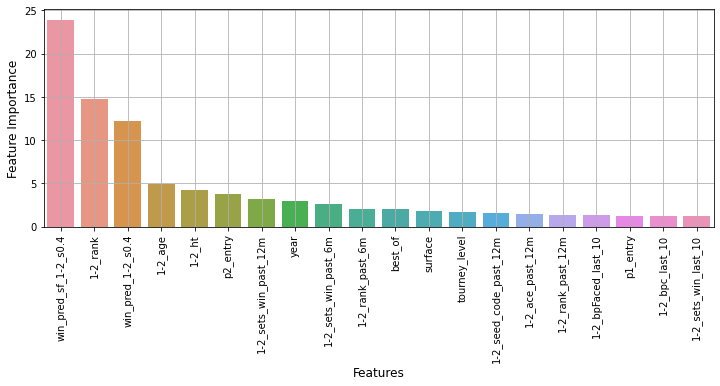

In [44]:
model_training.eval_cat(catb_grid,col_catfeature,col_numfeature, thread_shold = 0, n_top = 20)


In [45]:
matrix_n['y_pred_cat'] = catb_grid.predict(matrix_n[col_catfeature+col_numfeature].replace([np.inf, -np.inf], 0))

In [46]:
X_train, y_train = train_data
X_val, y_val = val_data
X_test, y_test = test_data

# calculate the accuracy on train set
y_train_pred = catb_grid.predict(X_train)
y_train_pred = 1*(y_train_pred>0.5)
acc_cat = accuracy_score(y_train, y_train_pred)
print('In the train set:')
print('The accuracy of winner prediction using Catboost is: {}%.\n'.format(round(acc_cat*100,3))) 

# calculate the accuracy on validation set
y_val_pred = catb_grid.predict(X_val)
y_val_pred = 1*(y_val_pred>0.5)
acc_cat = accuracy_score(y_val, y_val_pred)
print('In the validation set:')
print('The accuracy of winner prediction using Catboost is: {}%.\n'.format(round(acc_cat*100,3))) 


# calculate the accuracy on test set
y_test_pred = catb_grid.predict(X_test)
y_test_pred = 1*(y_test_pred>0.5)
acc_cat = accuracy_score(y_test, y_test_pred)
print('In the test set:')
print('The accuracy of winner prediction using Catboost is: {}%.\n'.format(round(acc_cat*100,3))) 


In the train set:
The accuracy of winner prediction using Catboost is: 68.687%.

In the validation set:
The accuracy of winner prediction using Catboost is: 70.005%.

In the test set:
The accuracy of winner prediction using Catboost is: 67.901%.



In [108]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))/(1024*1024)) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('matrix_n', 470.1152009963989),
 ('array_n', 63.212120056152344),
 ('X_n', 47.668182373046875),
 ('array_pca', 41.45060729980469),
 ('X_train', 31.58685302734375),
 ('X_val', 5.198760986328125),
 ('X_test', 4.2971649169921875),
 ('y_train_pred', 0.3434257507324219),
 ('y_val_pred', 0.056598663330078125),
 ('y_test_pred', 0.0467987060546875),
 ('y_pred_cat', 0.01142120361328125),
 ('y_pred_cat_pca', 0.01142120361328125),
 ('y_true', 0.01142120361328125),
 ('y_pred_elo', 0.008571624755859375),
 ('y_pred_elo1', 0.008571624755859375),
 ('y_pred_elo2', 0.008571624755859375),
 ('y_pred_elo3', 0.008571624755859375),
 ('y_pred_elo4', 0.008571624755859375),
 ('y_pred_rank', 0.008571624755859375),
 ('y_pred_win4m', 0.008571624755859375),
 ('y_pred_win6m', 0.008571624755859375),
 ('y_pred_win8m', 0.008571624755859375),
 ('features', 0.0019731521606445312),
 ('featureimportance', 0.0016832351684570312),
 ('GridSearchCV', 0.00139617919921875),
 ('StandardScaler', 0.001129150390625),
 ('Dense', 0.

Draw the decision tree

In [73]:
# !pip install graphviz

You should consider upgrading via the 'C:\Program Files (x86)\Python\WPy64-3761b1\python-3.7.6.amd64\python.exe -m pip install --upgrade pip' command.


In [85]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' 

In [86]:

pool = Pool(X_train, y_train, cat_features=cat_features_index, feature_names=list(col_catfeature+col_numfeature))

plt.figure(figsize = (18,18))

catb_grid.best_estimator_.plot_tree(
    tree_idx=0,    
    pool=pool,
    
)




<Figure size 1296x1296 with 0 Axes>

The components chosen are based on feature importance. Below we use principle component analysis and see how the accuracy change as a function of the number of principle components.

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 4)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


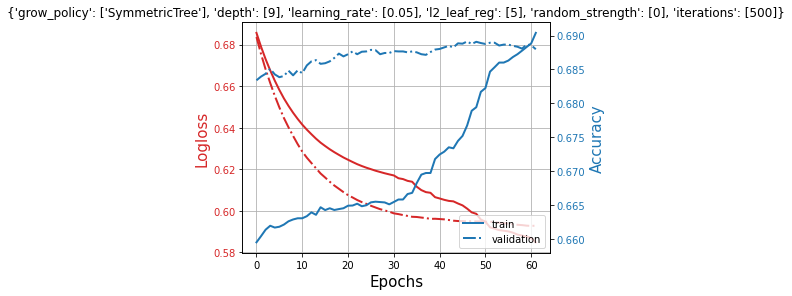

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 6)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


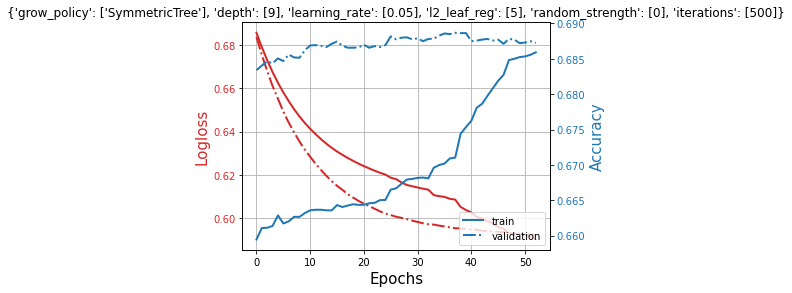

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 8)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


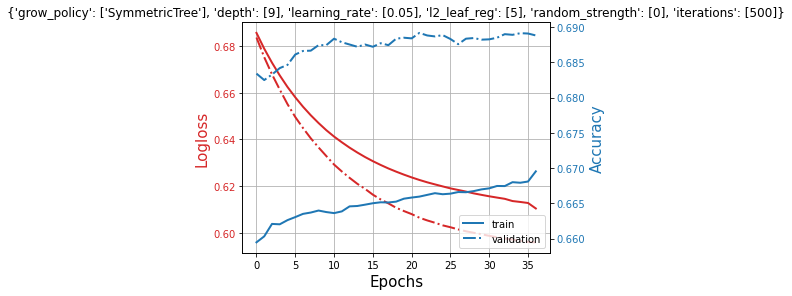

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 10)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


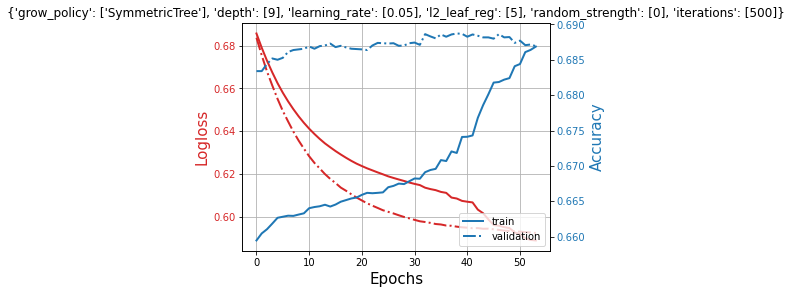

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 12)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


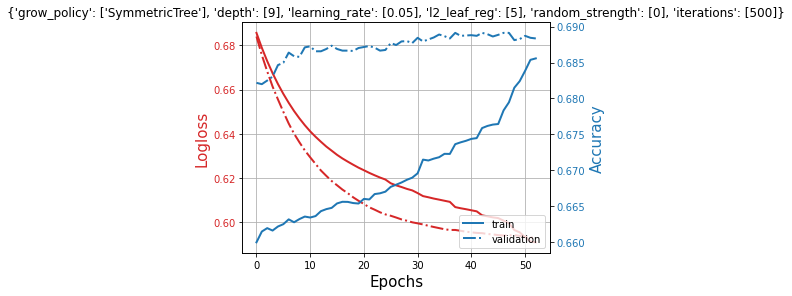

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 14)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


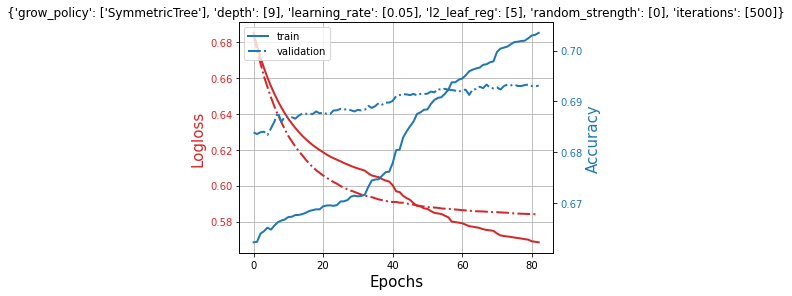

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 16)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


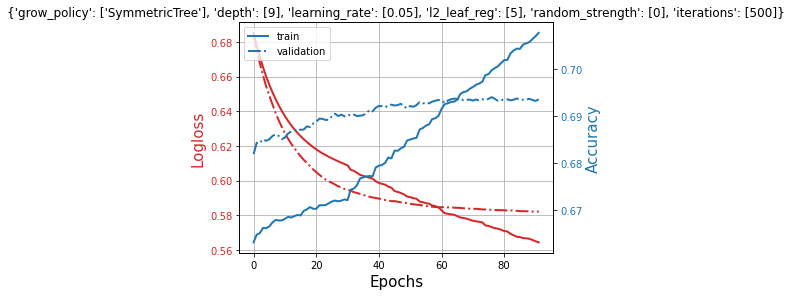

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 20)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


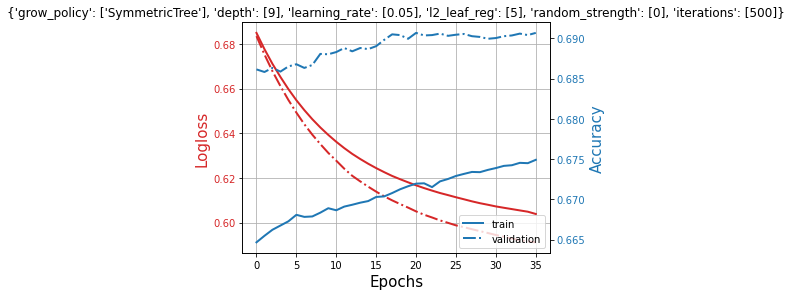

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 24)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


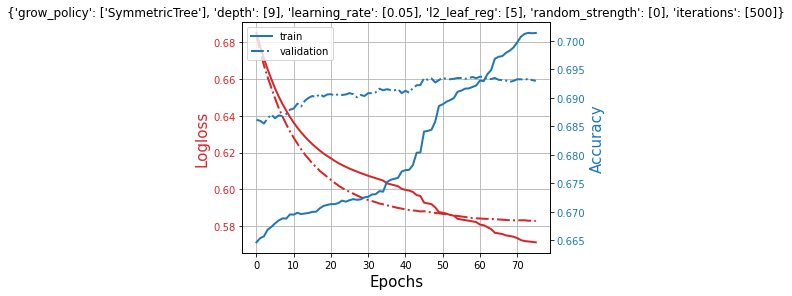

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 26)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


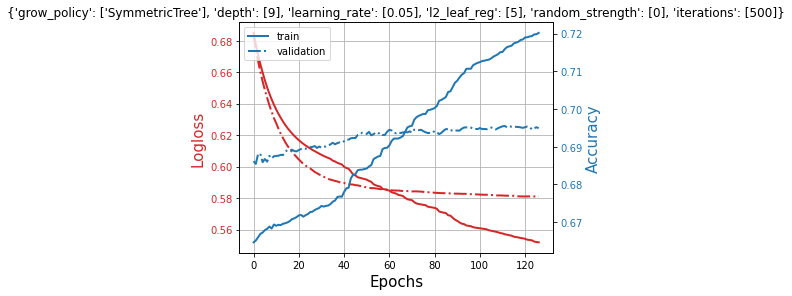

In [120]:
# choose features and target to put in the model
col_catfeature = ['tourney_level','surface','pair_code','best_of','round','p1_entry','p2_entry']

# choose the ones filtered after correlation analysis
col_numfeature = ['month', 'year', '1-2_age', '1-2_bpsr_last_10', '1-2_df_last_10',
       '1-2_ht', '1-2_2ndWon_last_10', '1-2_rank_past_6m', '1-2_rank_past_12m',
       '1-2_ace_last_10', '1-2_bpSaved_last_10', '1-2_1stWon_last_10',
       '1-2_bpcr_last_10', '1-2_seed_code_last_10', '1-2_bpFaced_last_10',
       '1-2_rank_last_10', '1-2_bpc_last_10', '1-2_sets_win_last_10',
       '1-2_df_past_6m', '1-2_ace_past_12m', '1-2_df_past_12m',
       '1-2_seed_code_past_6m', '1-2_rank_points_last_10',
       '1-2_rank_points_past_6m', '1-2_seed_code_past_12m', '1-2_rank',
       '1-2_1stWon_past_6m', '1-2_1stWon_past_12m', '1-2_seed_code',
       '1-2_sets_win_past_6m', '1-2_sets_win_past_12m', 'win_pred_sf_1-2_s0.4',
       'win_pred_1-2_s0.4']  


# define the loss function and evaludation metric
loss_function='Logloss'
eval_metric = 'Accuracy'

catb = model_training.build_cat(loss_function=loss_function,eval_metric = eval_metric,od_wait=15,random_seed=42)

# whether to apply PCA
flag_pca = 1

# number of principle components 

pca_components = [4,6,8,10,12,14,16,20,24,len(col_numfeature)]

#pca_components = [len(col_numfeature)]

acc_vs_components = pd.DataFrame()

# Hyper-parameters
params = {'grow_policy':['SymmetricTree'],
          'depth': [9],
          'learning_rate' : [0.05],
         'l2_leaf_reg': [5],
          'random_strength':[0],
          'iterations': [500]
         }

# time series split
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# train catboost model

idx = 0

for n_pca_components in pca_components:

    # train test split
    train_data,val_data,test_data,X_n\
    = model_training.train_test_split (matrix = matrix_n, flag_pca = 1, n_components = n_pca_components, 
                                   year_start = year_start, year_train = year_train, year_val = year_val, year_end = year_end,
                     col_catfeature = col_catfeature, col_numfeature = col_numfeature, col_target = col_target,
                                   one_hot_catfeature = False)

     
    if flag_pca == 0:
        cat_features_index = np.arange(len(col_catfeature))

    elif flag_pca == 1:
        cat_features_index = np.arange(len(col_catfeature))
        
        
    X_train, y_train = train_data
    X_val, y_val = val_data
    X_test, y_test = test_data


    # # for catboost hyper-parameters, see https://catboost.ai/docs/concepts/python-reference_parameters-list.html
    train_results,best_para, catb_grid_pca = model_training.train_cat(model=catb,grid_para=params,cv=tscv,verbose=False,
                        train_data=train_data,val_data=val_data,test_data=test_data,cat_features_index=cat_features_index,
                       loss_function = loss_function,eval_metric = eval_metric,plot_progress = True,retrain_best = False)

    
    
    # get the accuracy on test set
    y_test_pred = catb_grid_pca.predict(X_test)
    y_test_pred = 1*(y_test_pred>0.5)
    acc_cat = accuracy_score(y_test, y_test_pred)
    
     
    acc_vs_components.loc[idx,'n_pca_component'] = n_pca_components
    acc_vs_components.loc[idx,'acc_test'] = acc_cat
    acc_vs_components.loc[idx,'acc_val'] = train_results.metric_cat_val.values 
    acc_vs_components.loc[idx,'acc_train'] = train_results.metric_cat_train.values
    
    # predict the whole dataset and return the result
    #matrix_n['y_pred_cat_pca_'+str(n_pca_components)] = catb_grid_pca.predict(X_n)
    
    idx+= 1


In [583]:
train_results

grow_policy  depth  learning_rate  l2_leaf_reg  random_strength  \
0  SymmetricTree      9           0.05            5                0   

   iterations  metric_cat_train  loss_cat_train  metric_cat_val  loss_cat_val  
0         500          0.751935        0.510561        0.677734      0.598258

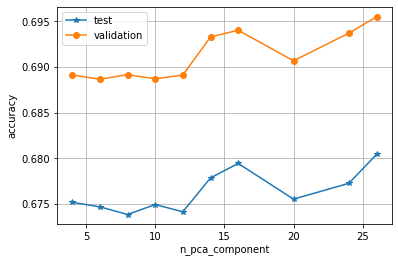

In [121]:
plt.figure
plt.plot(acc_vs_components['n_pca_component'],acc_vs_components['acc_test'],'*-')
plt.plot(acc_vs_components['n_pca_component'],acc_vs_components['acc_val'],'o-')
#plt.plot(acc_vs_components['n_pca_component'],acc_vs_components['acc_train'],'s-')
plt.legend(['test','validation','train'])
plt.xlabel('n_pca_component')
plt.ylabel('accuracy')
plt.grid()

Surprisingly, even with one principle component, the accuracy already reaches 68 % in the test set. With ~40 components, the accuracy increases to around 68.4% for validation and 68.6% for test set. It seems the peak of validation set does not coincide with the peak of test set exactly. 

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 16)
Pandas(Index=0, grow_policy='SymmetricTree', depth=9, learning_rate=0.05, l2_leaf_reg=5, random_strength=0, iterations=500)
{'grow_policy': ['SymmetricTree'], 'depth': [9], 'learning_rate': [0.05], 'l2_leaf_reg': [5], 'random_strength': [0], 'iterations': [500]}


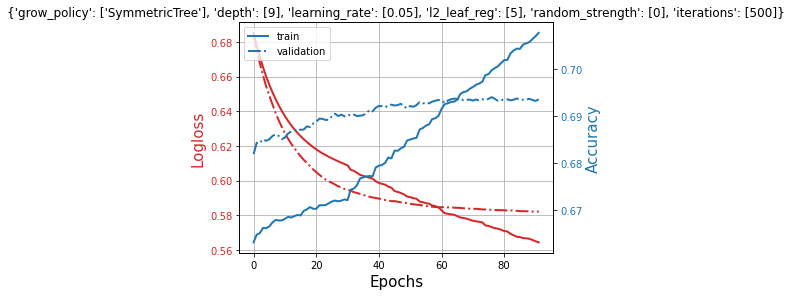

number of feature before PCA: (117049, 26)
number of feature after PCA: (117049, 16)


In [122]:
flag_pca = 1

n_pca_components = 16

if flag_pca == 0:
        cat_features_index = np.arange(len(col_catfeature))

elif flag_pca == 1:
        cat_features_index = np.arange(len(col_catfeature))


train_data,val_data,test_data,X_n\
    = model_training.train_test_split (matrix = matrix_n, flag_pca = 1, n_components = n_pca_components, 
                                   year_start = year_start, year_train = year_train, year_val = year_val, year_end = year_end,
                     col_catfeature = col_catfeature, col_numfeature = col_numfeature, col_target = col_target,
                                   one_hot_catfeature = False)
 
train_results,best_para, catb_grid_pca = model_training.train_cat(model=catb,grid_para=params,cv=tscv,verbose=False,
                        train_data=train_data,val_data=val_data,test_data=test_data,cat_features_index=cat_features_index,
                       loss_function = loss_function,eval_metric = eval_metric,plot_progress = True,retrain_best = False)

# use the model to refit the whole data set
# perform pca
array_pca = model_training.pca_matrix(matrix = matrix_n, col_numfeature = col_numfeature,n_components = n_pca_components, svd_solver = 'full')

# predict the whole dataset and return the result
matrix_n['y_pred_cat_pca'] = catb_grid_pca.predict(X_n)

#### Below we examine how the prediction accuracy changes over time, for different Elo and ranking difference, and in different tournies, rounds, tourney levels.

In [47]:
matrix_n['y_pred_cat'] = catb_grid.predict(X_total)
#matrix_n['y_pred_cat_pca'] = catb_grid_pca.predict(X_n)
matrix_n['y_pred_cat_prob_1-2'] = catb_grid.predict_proba(X_total)[:,1]  - catb_grid.predict_proba(X_total)[:,0]
#matrix_n['y_pred_cat_pca_prob_1-2'] = catb_grid_pca.predict_proba(X_n)[:,1]-catb_grid_pca.predict_proba(X_n)[:,0]

In [48]:
acc_cat_year = []
#acc_cat_pca_year = []
acc_elo_year = []
acc_elo_sf_year = []


acc_win6m_year = []
acc_win12m_year = []


acc_rank_year = []

for i in matrix_n.year.unique():
    
    y_pred_cat = matrix_n[matrix_n.year==i]['y_pred_cat']
    #y_pred_cat_pca = matrix_n[matrix_n.year==i]['y_pred_cat_pca']
    
    y_pred_elo = 1*(matrix_n[matrix_n.year==i]['win_pred_1-2_s0.4'] > 0)
    y_pred_elo_sf = 1*(matrix_n[matrix_n.year==i]['win_pred_sf_1-2_s0.4'] > 0)
    
    y_pred_win6m = 1*(matrix_n[matrix_n.year==i]['1-2_win_past_6m']>0)
    y_pred_win12m = 1*(matrix_n[matrix_n.year==i]['1-2_win_past_12m']>0)
    y_pred_rank = 1*(matrix_n[matrix_n.year==i]['1-2_rank']<0)
    y_true = matrix_n[matrix_n.year==i]['p1_win']
    
    acc_cat = accuracy_score(y_true, y_pred_cat)*100
    acc_cat_year.append(acc_cat)
    
    #acc_cat_pca = accuracy_score(y_true, y_pred_cat_pca)*100
    #acc_cat_pca_year.append(acc_cat_pca)
    
    acc_elo = accuracy_score(y_true, y_pred_elo)*100
    acc_elo_year.append(acc_elo)
    
    acc_elo_sf = accuracy_score(y_true, y_pred_elo_sf)*100
    acc_elo_sf_year.append(acc_elo_sf)
     
    acc_win6m = accuracy_score(y_true, y_pred_win6m)*100
    acc_win6m_year.append(acc_win6m) 
    
    acc_win12m = accuracy_score(y_true, y_pred_win12m)*100
    acc_win12m_year.append(acc_win12m)
    
    acc_rank = accuracy_score(y_true, y_pred_rank)*100
    acc_rank_year.append(acc_rank)
    


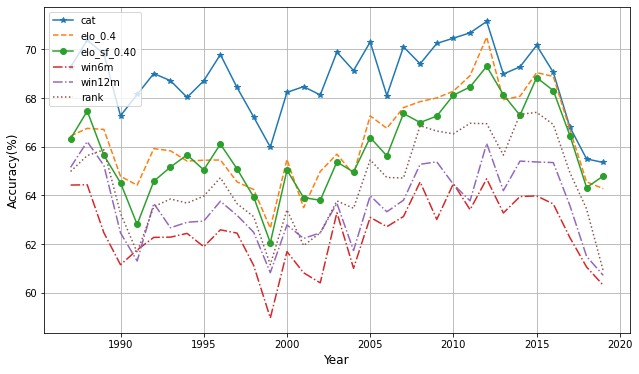

In [49]:
n=2
n_end = -1

plt.figure(figsize=(10.5,6))
plt.plot(matrix_n.year.unique()[n:n_end],acc_cat_year[n:n_end],'-*')
#plt.plot(matrix_n.year.unique()[n:n_end],acc_cat_pca_year[n:n_end],'-*')

plt.plot(matrix_n.year.unique()[n:n_end],acc_elo_year[n:n_end],'--')
plt.plot(matrix_n.year.unique()[n:n_end],acc_elo_sf_year[n:n_end],'-o')
plt.plot(matrix_n.year.unique()[n:n_end],acc_win6m_year[n:n_end],'-.')
plt.plot(matrix_n.year.unique()[n:n_end],acc_win12m_year[n:n_end],'-.')
 
plt.plot(matrix_n.year.unique()[n:n_end],acc_rank_year[n:n_end],':')
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Accuracy(%)',fontsize = 12)
#plt.legend(['cat','cat_pca','elo_0.32','elo_0.36','elo_0.40','elo_0.44','elo_0.48','win4m','win6m','win8m','rank'])
plt.legend(['cat','elo_0.4','elo_sf_0.40','win6m','win12m','rank'])

plt.grid()

* The prediction accuracy of the catboost model fluctuates over the years in between ~72% and ~65%.
* Changing the parameter s in the elo model doesn't show significant change in the Elo ranking
* Prediction accuracy based on rank shows similar accuracy with overall winning over past 6 to 8 months. The accuracy of rank improved after 1984, probably due to a modification in the rank point calculation. 

The accuracy of winner prediction based on catboost is: 66.704%
The accuracy of winner prediction based on cat_pca is: 66.722%
The accuracy of winner prediction based on Elo is: 66.139%
The accuracy of winner prediction based on Elo_sf is: 65.991%
The accuracy of winner prediction based on ranking is: 64.112%
The accuracy of winner prediction based on win_12m is: 62.825%
The accuracy of winner prediction based on win_ratio is: 52.927%


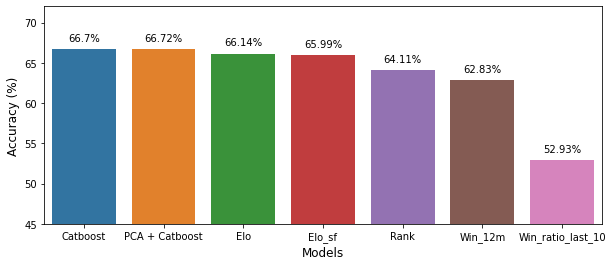

In [55]:
from sklearn.metrics import accuracy_score

year_end = 2019

year_begin = 2015

condition = (matrix_n.year> year_begin)&(matrix_n.year<= year_end)

y_true = matrix_n[condition]['p1_win']

y_pred_cat = matrix_n[condition]['y_pred_cat'] > 0
acc_cat = accuracy_score(y_true, y_pred_cat)
print('The accuracy of winner prediction based on catboost is: {}%'.format(round(acc_cat*100,3)))

y_pred_cat_pca = matrix_n[condition]['y_pred_cat_pca'] > 0
acc_cat_pca = accuracy_score(y_true, y_pred_cat_pca)
print('The accuracy of winner prediction based on cat_pca is: {}%'.format(round(acc_cat_pca*100,3)))

y_pred_elo = matrix_n[condition]['win_pred_1-2_s0.4'] > 0
acc_elo = accuracy_score(y_true, y_pred_elo)
print('The accuracy of winner prediction based on Elo is: {}%'.format(round(acc_elo*100,3)))


y_pred_elosf = matrix_n[condition]['win_pred_sf_1-2_s0.4'] > 0
acc_elosf = accuracy_score(y_true, y_pred_elosf)
print('The accuracy of winner prediction based on Elo_sf is: {}%'.format(round(acc_elosf*100,3)))

y_pred_rank = matrix_n[condition]['1-2_rank'] < 0 
acc_rank = accuracy_score(y_true, y_pred_rank)
print('The accuracy of winner prediction based on ranking is: {}%'.format(round(acc_rank*100,3)))


y_pred_win_12m = matrix_n[condition]['1-2_win_past_12m'] > 0 
acc_win_12m= accuracy_score(y_true, y_pred_win_12m)
print('The accuracy of winner prediction based on win_12m is: {}%'.format(round(acc_win_12m*100,3)))

y_pred_win_ratio = matrix_n[condition]['1-2_win_last_10'] > 0 
acc_win_ratio= accuracy_score(y_true, y_pred_win_ratio)
print('The accuracy of winner prediction based on win_ratio is: {}%'.format(round(acc_win_ratio*100,3)))


acc_baseline = pd.DataFrame()
acc_baseline['Catboost'] = [acc_cat * 100]
acc_baseline['PCA + Catboost'] = [acc_cat_pca * 100]

acc_baseline['Elo'] = [acc_elo * 100]
acc_baseline['Elo_sf'] = [acc_elosf * 100]
acc_baseline['Rank'] = [acc_rank * 100]
acc_baseline['Win_12m'] = [acc_win_12m * 100]
acc_baseline['Win_ratio_last_10'] = [acc_win_ratio * 100]
acc_baseline

plt.figure(figsize =(10,4))
bar1 = sns.barplot(data=acc_baseline)
plt.ylim(45,72)
plt.ylabel('Accuracy (%)',fontsize=12)
plt.xlabel('Models',fontsize=12)


 
for i, col in enumerate(acc_baseline.columns):
    
    bar1.text(i,acc_baseline[col].values+1, str(np.round(acc_baseline.loc[0,col],2))+'%', color='black', ha="center")

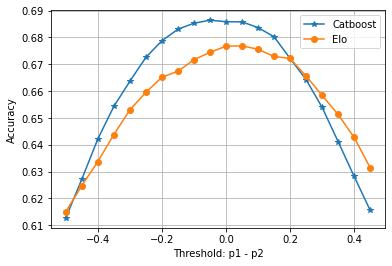

In [461]:
# we can see how the threshold of winning probability affect the accuracy
condition = (matrix_n.year> year_begin)&(matrix_n.year<= year_end)
y_true = matrix_n[condition]['p1_win']
acc_elo_thr = []
acc_cat_thr = []
threshold = np.arange(-0.5,0.5,0.05)

for i, thr in enumerate(threshold):
    y_pred_elo = matrix_n[condition]['win_pred_1-2'] > thr;
    acc_elo_thr.append(accuracy_score(y_true, y_pred_elo));
    
    y_pred_cat = matrix_n[condition]['y_pred_cat_prob_1-2'] > thr;
    acc_cat_thr.append(accuracy_score(y_true, y_pred_cat));
    
plt.figure
plt.plot(threshold,acc_cat_thr,'*-');
plt.plot(threshold,acc_elo_thr,'o-');
plt.xlabel('Threshold: p1 - p2');
plt.ylabel('Accuracy');
plt.legend(['Catboost','Elo']);
plt.grid()

#### We further examine how the performance varies for different ranges of rankings

In [152]:
# We further examine how the performance varies for different ranges of rankings
acc_cat_year_top50 = []
acc_elo_year_top50 = []
acc_cat_year_top100 = []
acc_elo_year_top100 = []
acc_cat_year_below100 = []
acc_elo_year_below100 = []

for n,i in enumerate(matrix_n.year.unique()):
    
    y_pred_cat_top50 = matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank <=50)]['y_pred_cat']
    y_pred_elo_top50 = 1*(matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank <=50)]['p1_win_pred']>0.5) 
    y_true_top50 = matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank <=50)]['p1_win']
    
    y_pred_cat_top100 = matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank >50)&(matrix_n.p1_rank <=100)]['y_pred_cat']
    y_pred_elo_top100 = 1*(matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank >50)&(matrix_n.p1_rank <=100)]['p1_win_pred']>0.5) 
    y_true_top100 = matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank >50)&(matrix_n.p1_rank <=100)]['p1_win']
    
    y_pred_cat_below100 = matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank >100)]['y_pred_cat']
    y_pred_elo_below100 = 1*(matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank >100)]['p1_win_pred']>0.5) 
    y_true_below100 = matrix_n[(matrix_n.year==i)&(matrix_n.p1_rank >100)]['p1_win']
   
        
    acc_cat_top50 = accuracy_score(y_true_top50, y_pred_cat_top50)*100
    acc_cat_year_top50.append(acc_cat_top50)
    
    acc_elo_top50 = accuracy_score(y_true_top50, y_pred_elo_top50)*100
    acc_elo_year_top50.append(acc_elo_top50)
    
    acc_cat_top100 = accuracy_score(y_true_top100, y_pred_cat_top100)*100
    acc_cat_year_top100.append(acc_cat_top100)
    
    acc_elo_top100 = accuracy_score(y_true_top100, y_pred_elo_top100)*100
    acc_elo_year_top100.append(acc_elo_top100)
    
    acc_cat_below100 = accuracy_score(y_true_below100, y_pred_cat_below100)*100
    acc_cat_year_below100.append(acc_cat_below100)
    
    acc_elo_below100 = accuracy_score(y_true_below100, y_pred_elo_below100)*100
    acc_elo_year_below100.append(acc_elo_below100)
    
    

C:\Program Files (x86)\Python\WPy64-3761b1\python-3.7.6.amd64\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Program Files (x86)\Python\WPy64-3761b1\python-3.7.6.amd64\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


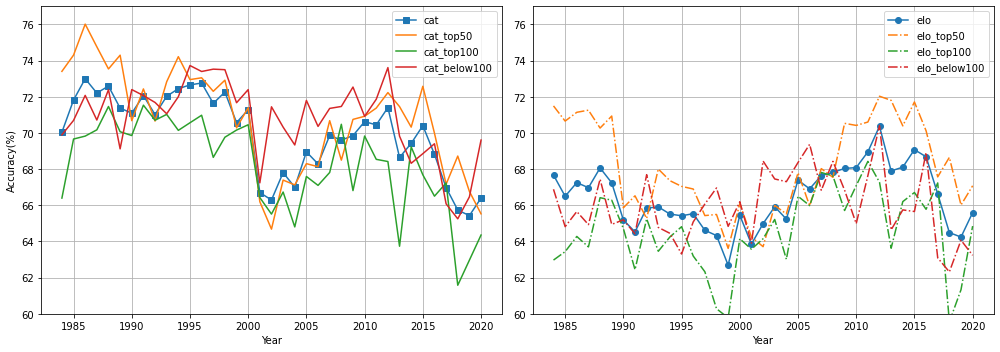

In [159]:
n=5
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(matrix_n.year.unique()[n:],acc_cat_year[n:],'-s')
plt.plot(matrix_n.year.unique()[n:],acc_cat_year_top50[n:],'-')
plt.plot(matrix_n.year.unique()[n:],acc_cat_year_top100[n:],'-')
plt.plot(matrix_n.year.unique()[n:],acc_cat_year_below100[n:],'-')
plt.xlabel('Year')
plt.ylabel('Accuracy(%)')
plt.legend(['cat','cat_top50','cat_top100','cat_below100'])
plt.ylim(60,77)
plt.grid()

plt.subplot(1,2,2)
plt.plot(matrix_n.year.unique()[n:],acc_elo_year[n:],'-o')
plt.plot(matrix_n.year.unique()[n:],acc_elo_year_top50[n:],'-.')
plt.plot(matrix_n.year.unique()[n:],acc_elo_year_top100[n:],'-.')
plt.plot(matrix_n.year.unique()[n:],acc_elo_year_below100[n:],'-.')

plt.xlabel('Year')
#plt.ylabel('Accuracy(%)')
plt.legend(['elo','elo_top50','elo_top100','elo_below100'])
plt.ylim(60,77)

plt.grid()

plt.tight_layout()

The prediction accuracy for players with ranking in top 50 or below 100 are higher. 

Let's have a further look how the prediction accurancy varies for different rank and rank difference

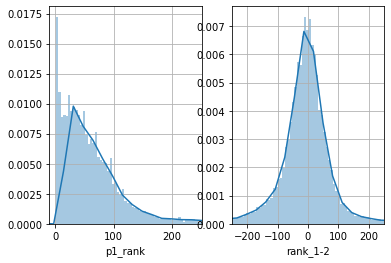

In [178]:
condition = (matrix_n.year> year_begin)&(matrix_n.year<= year_end)

plt.figure;
plt.subplot(1,2,1);
sns.distplot(matrix_n[condition]['p1_rank'],bins=500);
plt.xlim(-10,250)
plt.grid()

plt.subplot(1,2,2);

sns.distplot(matrix_n[condition]['rank_1-2'],bins=500);
plt.xlim(-250,250)
plt.grid()

In [279]:

condition_1 = (matrix_n.year> year_begin)&(matrix_n.year<= year_end)

# intervals for rank of player 1
rank_array = [1,25,50,100,max(matrix_n[condition_1]['p1_rank'])]

# intervals for rank difference (absolute value)
rank_diff_array = [1,25,50,100,max(matrix_n[condition_1]['rank_1-2'])]

acc_vs_rank_cat = np.empty((len(rank_array)-1,len(rank_diff_array)-1))
rank_count =  np.empty((len(rank_array)-1,len(rank_diff_array)-1))

for i,rank in enumerate(rank_array[0:-1]):
    
    for j,rank_diff in enumerate(rank_diff_array[0:-1]):
        
        condition_2 = (matrix_n['p1_rank']>=rank) & (matrix_n['p1_rank']<rank_array[i+1])
        condition_3 = (abs(matrix_n['rank_1-2'])>=rank_diff) & (abs(matrix_n['rank_1-2'])<rank_diff_array[j+1])
        
        count = matrix_n[condition_1&condition_2&condition_3]['p1_win'].shape[0]
        y_true_rank = matrix_n[condition_1&condition_2&condition_3]['p1_win']
        y_pred_cat_rank = matrix_n[condition_1&condition_2&condition_3]['y_pred_cat_pca'] > 0.5
        y_pred_elo_rank = matrix_n[condition_1&condition_2&condition_3]['win_pred_1-2'] > 0
        
        acc_cat_rank = accuracy_score(y_true_rank, y_pred_cat_rank)*100
        acc_elo_rank = accuracy_score(y_true_rank, y_pred_elo_rank)*100
        
        acc_vs_rank_cat[i,j] = acc_cat_rank - acc_elo_rank
        rank_count[i,j] = count
        
        
acc_vs_rank_cat

array([[ 0.21715527,  0.59800664,  0.3986711 ,  0.64935065],
       [ 0.54858934,  0.50391937,  0.64585576,  0.50955414],
       [ 3.21556173,  1.16715298,  0.24727992, -0.70093458],
       [ 1.78890877,  2.35849057,  0.        ,  4.        ]])

In [216]:
matrix_n[condition_1&condition_2&condition_3]['p1_win'].shape[0]

2575

Text(0.5, 1.0, 'Count')

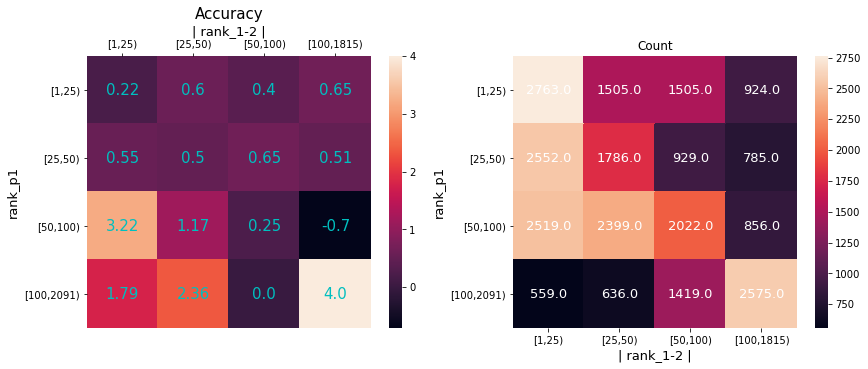

In [293]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
im_1 = sns.heatmap(acc_vs_rank_cat)

y_ticklabel = []
x_ticklabel = []

for i,rank in enumerate(rank_array[0:-1]):
    
    y_ticklabel.append('[{},{})'.format(rank_array[i],round(rank_array[i+1])))
    
    for j,rank_diff in enumerate(rank_diff_array[0:-1]):
        
        im_1.text(j+0.5,i+0.5,np.round(acc_vs_rank_cat[i,j],2),color="c",ha="center", va="center",fontsize = 15) 
        
        if i == 0 :
            x_ticklabel.append('[{},{})'.format(rank_diff_array[j],round(rank_diff_array[j+1])))


im_1.set_yticklabels(y_ticklabel)
im_1.set_xticklabels(x_ticklabel)

im_1.set_ylabel('rank_p1',fontsize = 13)
im_1.set_xlabel('| rank_1-2 |',fontsize = 13)
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
im_1.xaxis.tick_top()
im_1.xaxis.set_label_position('top')
plt.title('Accuracy',fontsize = 15)

plt.subplot(1,2,2)
im_2 = sns.heatmap(rank_count)

for i,rank in enumerate(rank_array[0:-1]):
    
    for j,rank_diff in enumerate(rank_diff_array[0:-1]):
        
        im_2.text(j+0.5,i+0.5,np.round(rank_count[i,j],0),color="white",ha="center", va="center",fontsize = 13)
        
        
im_2.set_yticklabels(y_ticklabel)
im_2.set_xticklabels(x_ticklabel)

im_2.set_ylabel('rank_p1',fontsize = 13)
im_2.set_xlabel('| rank_1-2 |',fontsize = 13)
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.title('Count')


In [273]:
y_ticklabel

['[1,10)', '[10,25)', '[25,50)', '[50,100)', '[100,2091.0)']

We can check how the winning/losing vs the features' distribution

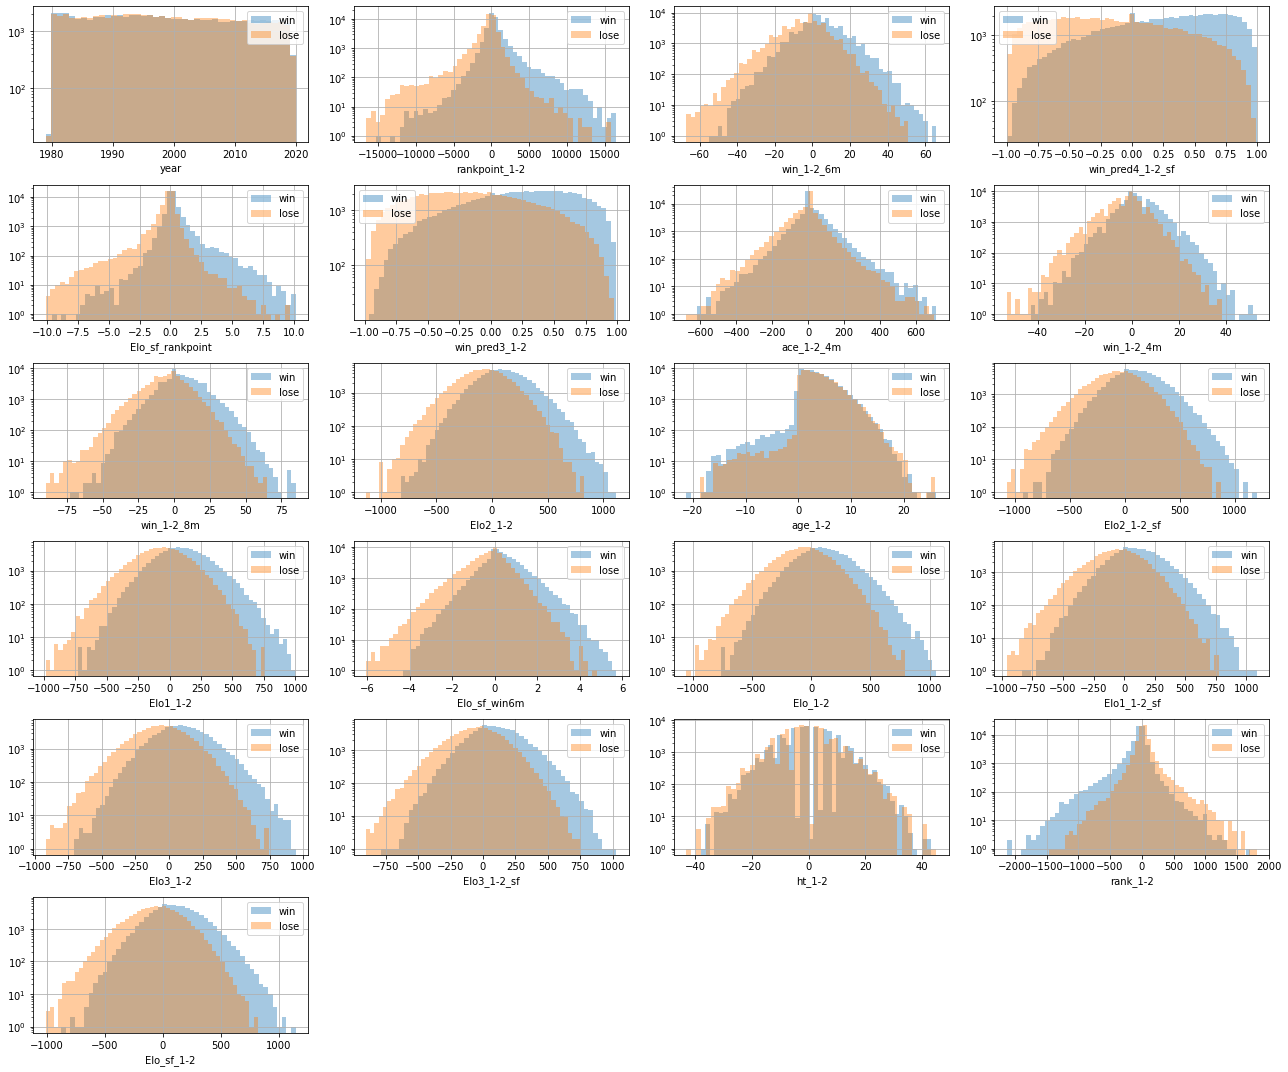

In [296]:
# col_feature = ['Elo_1-2','Elo_sf_1-2', 'win_pred_1-2','win_pred_sf_1-2',
#                'win_1-2_6m', 'rank_1-2','rankpoint_1-2','seed_code_1-2',  
#                'ace_1-2_6m', 'df_1-2_6m', '1stWon_1-2_6m','2ndWon_1-2_6m',
#                'ace_1-2_last_10', 'df_1-2_last_10', '1stWon_1-2_last_10','2ndWon_1-2_last_10',
#         'bpsr_1-2_6m', 'bpcr_1-2_6m', '1-2_sets_last_10', 'p1_win_ratio_last_10',         
#        'bpsr_1-2_last_10','bpcr_1-2_last_10', 'bps_1-2_last_10', 'bpc_1-2_last_10', 
#         ]

col_feature = ['year',
 'rankpoint_1-2',
 'win_1-2_6m',
 'win_pred4_1-2_sf',
 'Elo_sf_rankpoint',
 'win_pred3_1-2',
 'ace_1-2_4m',

 'win_1-2_4m',
 'win_1-2_8m',
 'Elo2_1-2',

 'age_1-2',
 'Elo2_1-2_sf',
 'Elo1_1-2',
 'Elo_sf_win6m',
 'Elo_1-2',
 'Elo1_1-2_sf',
 'Elo3_1-2',
 'Elo3_1-2_sf',
 'ht_1-2',
 'rank_1-2',
 'Elo_sf_1-2'] #'p2_entry',

df_win = matrix_n[matrix_n.p1_win == 1][col_feature].replace([np.inf, -np.inf], np.nan)
df_lose = matrix_n[matrix_n.p1_win == 0][col_feature].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(18,15))
for i in range(len(col_feature)):
    plt.subplot(6,4,i+1)
    sns.distplot(df_win[col_feature[i]],kde=False,bins=min(df_win[col_feature[i]].nunique(),51))
    sns.distplot(df_lose[col_feature[i]],kde=False,bins=min(df_win[col_feature[i]].nunique(),51))
    plt.legend(['win','lose'])
    plt.yscale('log')
    plt.grid()
    
    if col_feature[i] == '1-2_sets_last_10':
        plt.xlim(-50,50)
    
plt.tight_layout() 

In [95]:
min(df_win['year'].nunique(),51)

42

It's quite clear that the winning and losing are skewed on the two sides of the feature difference '1-2'. Surprisingly, the technical performance distribution of the pair of players does not show significant difference in the winning and losing, but the performance over the past 6 months do show more noticeable difference. 

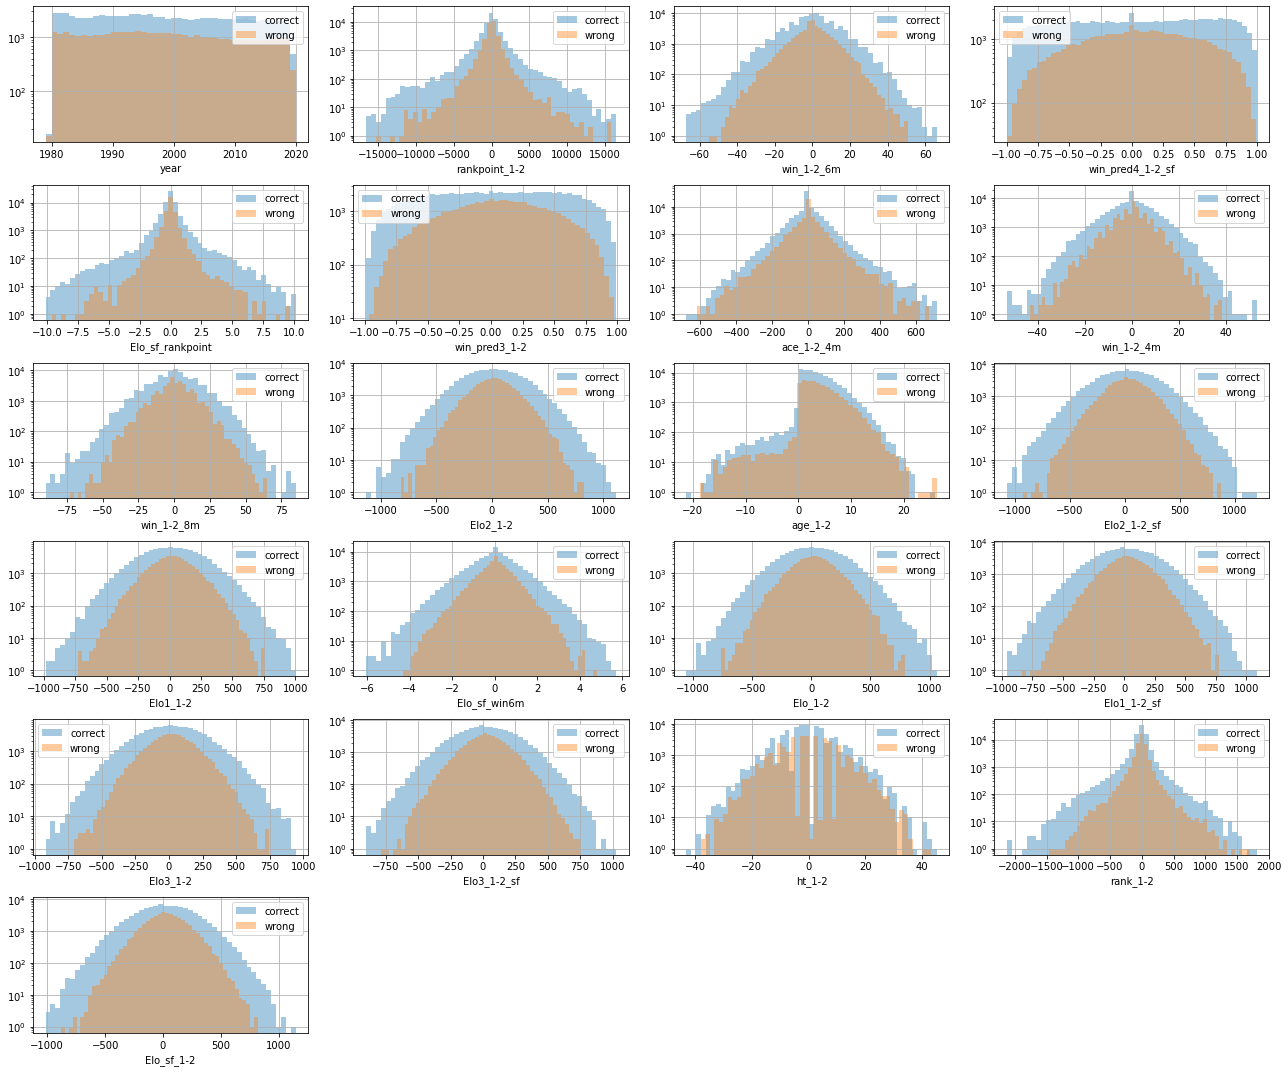

In [172]:
# let's have a look how the right/wrong prediction distribute over different parameters


df_correct = matrix_n[matrix_n.y_pred == matrix_n.p1_win][col_feature].replace([np.inf, -np.inf], np.nan)
df_wrong = matrix_n[matrix_n.y_pred != matrix_n.p1_win][col_feature].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(18,15))
for i in range(len(col_feature)):
    plt.subplot(6,4,i+1)
    sns.distplot(df_correct[col_feature[i]],kde=False,bins=min(df_win[col_feature[i]].nunique(),51))
    sns.distplot(df_wrong[col_feature[i]],kde=False,bins=min(df_win[col_feature[i]].nunique(),51))
    plt.legend(['correct','wrong'])
    plt.yscale('log')
    plt.grid()
    
plt.tight_layout() 

The distribution of wrong prediction showed a pretty symmetric pattern around the zero, and from the previous figures, it seems to be the overlapped regime between the true winning and losing distributions.

Essentially, to have a better distinguishability between the distribution of winning and losing, we need to minimize the overlapped area between the winning and losing distribution. Can we create some synthetic features from multiple existing features? (e.g. Using, multiplication or other nonlinear functions to interact different features? -- checked, the answer is no)

In [ ]:
# create some synthetic features:
# 1. Elo *  rankpoint
# 2. Elo * win6m
# 3. Elo * win6m * rankpoint
# 4. Elo * win6m * rankpoint * (-seed_code)
# 5. Elo * bpcr_6m * bpsr_6m * ace_6m * df_6m * 1stwon * 2ndwon


* ### Neural network

Using TensorFlow backend.


To use neural network, we need to convert the categorical features into vector, it can be dummy onehot encoding, or use something like word to vec embodding.  

From the catboost result, it seems the player id has little impact on the final result. Let's go without player_id first.

In [311]:
 
col_catfeature=['tourney_level','surface','best_of','round','p1_entry','p2_entry']



col_numfeature = ['year','month','age_1-2', 'ht_1-2', 'rank_1-2','rankpoint_1-2', 'seed_code_1-2',
                  'Elo_1-2', 'Elo_sf_1-2','win_pred_1-2', 'win_pred_sf_1-2','win_1-2_6m','win_1-2_8m'
        ]


col_numfeature = ['year','month', 'age_1-2', 'ht_1-2', 'rank_1-2',
       'rankpoint_1-2', 'seed_code_1-2',
                  
        'p1_win_ratio_last_20','p1_win_ratio_last_10',  
         '1-2_sets_last_20','1-2_sets_last_10',
                  
        'Elo_1-2', 'Elo_sf_1-2','win_pred_1-2', 'win_pred_sf_1-2',
        'Elo1_1-2','Elo1_1-2_sf','win_pred1_1-2', 'win_pred1_1-2_sf', 
        'Elo2_1-2','Elo2_1-2_sf', 'win_pred2_1-2','win_pred2_1-2_sf',
        'Elo3_1-2', 'Elo3_1-2_sf','win_pred4_1-2', 'win_pred4_1-2_sf',
        'Elo4_1-2', 'Elo4_1-2_sf', 'win_pred3_1-2','win_pred3_1-2_sf',
     
        'win_1-2_4m', 'ace_1-2_4m', 'df_1-2_4m','1stWon_1-2_4m', 
       '2ndWon_1-2_4m', 'bpsr_1-2_4m', 'bpcr_1-2_4m',
        'win_1-2_6m', 'ace_1-2_6m', 'df_1-2_6m', '1stWon_1-2_6m',
       '2ndWon_1-2_6m', 'bpsr_1-2_6m', 'bpcr_1-2_6m', 
       'win_1-2_8m', 'ace_1-2_8m', 'df_1-2_8m', '1stWon_1-2_8m',
       '2ndWon_1-2_8m', 'bpsr_1-2_8m', 'bpcr_1-2_8m', 
                  
        'Elo_sf_rankpoint', 'Elo_sf_win6m',
       'Elo_sf_rankpoint_win6m', 'Elo_sf_rp_win6m_seed',       
       'Elo_sf_rp_win6m_winratio',
       'bpcr_bpsr_ace_1stwon_2ndwon_6m',
       'bpcr_bpsr_ace_1stwon_2ndwon_last_10']


col_numfeature = ['year','month','seed_code_1-2', 'rank_1-2', 'bps_1-2_last_10', 'bps_1-2_last_20',
       'df_1-2_last_10', 'df_1-2_last_20', 'age_1-2', '1-2_set_5_last_20',
       '1-2_set_5_last_10', 'bpsr_1-2_last_10', 'bpsr_1-2_last_20',
       '2ndWon_1-2_last_20', '2ndWon_1-2_last_10', 'ht_1-2',
       '1-2_set_4_last_20', '1-2_set_4_last_10', 'ace_1-2_last_20',
       'ace_1-2_last_10', '1-2_set_3_last_20', '1-2_set_3_last_10',
       '1stWon_1-2_last_20', '1stWon_1-2_last_10', 'bpcr_1-2_last_20',
       'bpcr_1-2_last_10', 'df_1-2_4m', '1-2_set_1_last_20',
       '1-2_set_1_last_10', 'bpc_1-2_last_20', 'bpc_1-2_last_10',
       '1-2_set_2_last_20', '1-2_set_2_last_10', 'df_1-2_6m', 'df_1-2_8m',
       'ace_1-2_4m', 'ace_1-2_6m', 'ace_1-2_8m', '1-2_sets_last_20',
       '1-2_sets_last_10', '2ndWon_1-2_4m', 'bpsr_1-2_4m', 'bpcr_1-2_4m',
       '1stWon_1-2_4m', '2ndWon_1-2_6m', 'bpsr_1-2_6m', '2ndWon_1-2_8m',
       'bpcr_1-2_6m', 'bpsr_1-2_8m', '1stWon_1-2_6m', 'bpcr_1-2_8m',
       '1stWon_1-2_8m', 'rankpoint_1-2', 'win_1-2_4m', 'win_1-2_6m',
       'win_1-2_8m', 'Elo3_1-2_sf', 'Elo4_1-2_sf', 'Elo1_1-2_sf',
       'Elo2_1-2_sf', 'win_pred4_1-2_sf', 'win_pred3_1-2_sf', 'Elo_sf_1-2',
       'win_pred2_1-2_sf', 'win_pred1_1-2_sf', 'win_pred_sf_1-2', 'Elo4_1-2',
       'Elo2_1-2', 'win_pred4_1-2', 'Elo_1-2', 'Elo3_1-2', 'Elo1_1-2',
       'win_pred2_1-2', 'win_pred_1-2', 'win_pred3_1-2', 'win_pred1_1-2','win_ratio_1-2_last_20','win_ratio_1-2_last_10']


col_target = ['p1_win']
matrix_n2 = matrix_n[col_catfeature+col_numfeature]
matrix_n2[col_catfeature].nunique()

tourney_level     6
surface           6
best_of           2
round            10
p1_entry          8
p2_entry          7
dtype: int64

In [204]:
matrix_n2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135825 entries, 0 to 135824
Data columns (total 65 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   tourney_level                        135825 non-null  object 
 1   surface                              135825 non-null  object 
 2   best_of                              135825 non-null  object 
 3   round                                135825 non-null  object 
 4   p1_entry                             135825 non-null  object 
 5   p2_entry                             135825 non-null  object 
 6   year                                 135825 non-null  int64  
 7   month                                135825 non-null  int64  
 8   age_1-2                              134146 non-null  float64
 9   ht_1-2                               118052 non-null  float64
 10  rank_1-2                             124774 non-null  float64
 11  rankpoint_1-2

There are some missing information in both the categorical and numerical features. For categorical features, we choose to ignore them during one-hot encoding, for numerical features, the missing values are the difference between palyer 1 and player 2, by default we set them to zero if it is not provided

In [312]:

#convert categorical data to one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')    
df_ohe = ohe.fit_transform(matrix_n2[col_catfeature]).toarray()

# convert dataframe to numpy array
array_n2 = matrix_n2[col_numfeature].replace([np.inf, -np.inf], np.nan).fillna(0).to_numpy()
# normalize the data before putting into NN

array_n2 = StandardScaler().fit_transform(array_n2)
X_n2 = np.concatenate((df_ohe,array_n2),axis=1)

Define the model

In [315]:
del array_n2, df_ohe

In [316]:
# we'll do a grid search of the hyperparameter
# ref: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.layers import Dropout



In [317]:
# Function to create model, required for KerasClassifier
#def create_model(layers=[20,1],learning_rate=0.001,drop_out = 0.05,loss_function = 'binary_crossentropy',eval_metric = 'accuracy'):

def build_nn(ly_m1=40,ly_m2=20,ly_f=1,learning_rate=0.001,drop_out = 0.05,loss_function = 'binary_crossentropy',eval_metric = 'accuracy'):
 
    # fix random seed for reproducibility
    from numpy.random import seed
    seed(1)
    import tensorflow
    tensorflow.random.set_seed(2)
    
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.wrappers.scikit_learn import KerasClassifier
    
    # create a dense neural network model
  
    model = Sequential()

#     for i,ly in enumerate(layers):

#         print('layer {}, {} neurons;'.format(i,ly))

#         if i==0:
#             model.add(Dense(ly, activation='relu',kernel_constraint=maxnorm(3),kernel_initializer='uniform'))
#             model.add(Dropout(drop_out))

#         elif (i>0) & (i+1<len(layers)):
#             model.add(Dense(ly, activation='relu',kernel_constraint=maxnorm(3)))
#             model.add(Dropout(drop_out)) 

#         elif i+1 == len(layers):    
#             model.add(Dense(ly, activation='sigmoid'))

    model.add(Dense(ly_m1, activation='relu',kernel_initializer='uniform'))
    model.add(Dropout(drop_out))         
    model.add(Dense(ly_m2, activation='relu'))
    model.add(Dropout(drop_out)) 
    model.add(Dense(ly_f, activation='sigmoid'))

    # compile the keras model
    opt = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss=loss_function, optimizer=opt, metrics=[eval_metric])

    
    
    
    return model

In [349]:
# this is a function to define the neural network traning and evaluation

def train_nn(build_fn=None,grid_para=None,cv=None,verbose=False,train_data=None,val_data=None,test_data=None,
              loss_function = 'binary_crossentropy',eval_metric = 'accuracy',plot_progress = False,retrain_best = False):
  
    # fix random seed for reproducibility
    from numpy.random import seed
    seed(1)
#     from tensorflow import set_random_seed
#     set_random_seed(2)
    import tensorflow
    tensorflow.random.set_seed(2)
    
    
    # create model
    model_nn = KerasClassifier(build_fn=build_fn, verbose=2)

    
    from sklearn.model_selection import GridSearchCV
     
    X_train, y_train = train_data[0],train_data[1]
    X_val, y_val = val_data[0],val_data[1]
   
    #X_test, y_test = test_data[0],test_data[1]
    
    
    """Instead of using the GridSearchCV for finding the best hyperparameters, we only use it for cross-validation,but keep
    all the results, including the hyperparameters and the metrics of the model in train, validation and test sets.
     """
    
    # pay attention, * is used before the list to unpack the list into multiple argument for function
    # https://stackoverflow.com/questions/36901/what-does-double-star-asterisk-and-star-asterisk-do-for-parameters
    

   ####
    cases = list(product(*list(grid_para.values())[0:])) 

    cases = pd.DataFrame(columns = grid_para.keys(), data = cases)

    # define early stopping criteria

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=False, patience=20)

    cv = tscv

    for row in cases.itertuples():

        print(row)
        idx = row.Index

        """
        row_bracket generate a dictionary of the form {key_A: [value_A],key_B: [value_B], ...  }
        which is required for the GridSearchCV param input 
        """

        row_bracket = list(map(lambda x: [x], row[1:]))
        param = dict(zip(grid_para.keys(),row_bracket))
        print(param)

        nn_grid = GridSearchCV(estimator=model_nn, param_grid=param, cv = cv,n_jobs = 1,refit = True)

        nn_grid.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    callbacks=[es],
                    shuffle = False,
                    verbose=verbose          
                 )


        train_metric = nn_grid.best_estimator_.model.history.history[eval_metric]
        train_loss = nn_grid.best_estimator_.model.history.history['loss']
        val_metric = nn_grid.best_estimator_.model.history.history['val_'+eval_metric]
        val_loss = nn_grid.best_estimator_.model.history.history['val_loss']

        cases.loc[idx,'metric_nn_train'] = max(train_metric)
        #cases.loc[idx,'loss_nn_train'] =nn_grid.best_estimator_.get_best_score()['loss']
        cases.loc[idx,'metric_nn_val'] = max(val_metric)
        #cases.loc[idx,'loss_nn_val'] =nn_grid.best_estimator_.get_best_score()['validation'][loss_function]



        if plot_progress == True:
            plot_train_progress(param,loss_function,train_loss,val_loss,eval_metric,train_metric,val_metric)


    # retrain the best parameters

    best_index = cases.metric_nn_val.argmax()

    # use .loc[best_index:best_index] instead of .loc[best_index] to keep the dataframe format
    # avoid chaning the int64 dtypes to float64, which will be wrong format for parameters like batch_size and epochs

    best_para = cases.loc[best_index:best_index,list(grid_para.keys())] 

    # use orient='list' to covert the dataframe to dictionary in the form of {column -> [values]}
    best_para = best_para.to_dict(orient='list').values()

    param = dict(zip(grid_para.keys(),best_para))

    print('best parameters:',param)
    
    if retrain_best == True:

        nn_grid = GridSearchCV(estimator=model_nn, param_grid=param, cv = cv,n_jobs = 1)#,refit = True)

        nn_grid.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    callbacks=[es],
                    shuffle = False,
                    verbose= False        
                 )

        train_metric = nn_grid.best_estimator_.model.history.history[eval_metric]
        train_loss = nn_grid.best_estimator_.model.history.history['loss']
        val_metric = nn_grid.best_estimator_.model.history.history['val_'+eval_metric]
        val_loss = nn_grid.best_estimator_.model.history.history['val_loss']

        plot_train_progress(param,loss_function,train_loss,val_loss,eval_metric,train_metric,val_metric)

    return cases, param, nn_grid
    

In [319]:
def plot_train_progress(param,loss_function,train_loss,val_loss,eval_metric,train_metric,val_metric):
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epochs',fontsize=15)
    ax1.set_ylabel(loss_function, color=color,fontsize=15)
    ax1.plot(train_loss, color=color,lw=2)
    ax1.plot(val_loss,'-.', color=color,lw=2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(eval_metric, color=color,fontsize=15)  # we already handled the x-label with ax1
    ax2.plot(train_metric, color=color,lw=2)
    ax2.plot(val_metric, '-.',color=color,lw=2)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.legend(['train','validation'])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(param)
    plt.show()

In [313]:
year_start = 1985
year_train = 2000
year_val = 2010
year_end = 2019

# define the index for train, validation and test sets
index_train = matrix_n2[(matrix_n2.year>=year_start) &(matrix_n2.year<=year_train)].index
index_val = matrix_n2[(matrix_n2.year>year_train) & (matrix_n2.year<=year_val)].index
index_test = matrix_n2[(matrix_n2.year>year_val) & (matrix_n2.year<=year_end) ].index


In [314]:
# generate features and targets 
X_train_2 = np.nan_to_num(X_n2[index_train,:])
X_val_2 = np.nan_to_num(X_n2[index_val,:])
X_test_2 = np.nan_to_num(X_n2[index_test,:])

y_train_2 = matrix_n[(matrix_n2.year>=year_start) &(matrix_n2.year<=year_train)][col_target].to_numpy()
y_val_2 = matrix_n[(matrix_n2.year>year_train) & (matrix_n2.year<=year_val)][col_target].to_numpy()
y_test_2 = matrix_n[(matrix_n2.year>year_val) & (matrix_n2.year<=year_end)][col_target].to_numpy()

In [315]:
# combine into data sets that will be used for training
train_data_2 = [X_train_2, y_train_2]
val_data_2 = [X_val_2, y_val_2]
test_data_2 = [X_test_2, y_test_2]

In [320]:
len(X_train_2[0,:])

117

Pandas(Index=0, ly_m1=80, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.0005, drop_out=0.05)
{'ly_m1': [80], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.0005], 'drop_out': [0.05]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 3s 138us/step - loss: 0.5943 - accuracy: 0.6790 - val_loss: 0.5962 - val_accuracy: 0.6779
Epoch 2/150
19339/19339 [==============================] - 3s 131us/step - loss: 0.5872 - accuracy: 0.6843 - val_loss: 0.5931 - val_accuracy: 0.6800
Epoch 3/150
19339/19339 [==============================] - 3s 147us/step - loss: 0.5857 - accuracy: 0.6861 - val_loss: 0.5926 - val_accuracy: 0.6791
Epoch 4/150
19339/19339 [==============================] - 2s 106us/step - loss: 0.5850 - accuracy: 0.6886 - val_loss: 0.5952 - val_accuracy: 0.6758
Epoch 5/150
19339/19339 [==============================] - 3s 147us/step - loss: 0.5836 - accuracy: 0.6889 - val_loss:

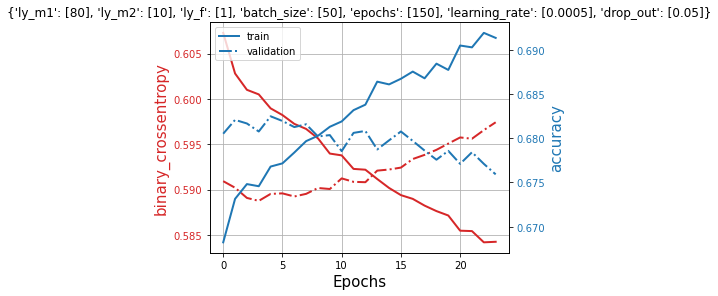

Pandas(Index=1, ly_m1=80, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.0005, drop_out=0.1)
{'ly_m1': [80], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.0005], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 279us/step - loss: 0.5960 - accuracy: 0.6785 - val_loss: 0.5972 - val_accuracy: 0.6782
Epoch 2/150
19339/19339 [==============================] - 3s 130us/step - loss: 0.5895 - accuracy: 0.6846 - val_loss: 0.5934 - val_accuracy: 0.6791
Epoch 3/150
19339/19339 [==============================] - 2s 128us/step - loss: 0.5874 - accuracy: 0.6855 - val_loss: 0.5938 - val_accuracy: 0.6784
Epoch 4/150
19339/19339 [==============================] - 2s 129us/step - loss: 0.5876 - accuracy: 0.6879 - val_loss: 0.5960 - val_accuracy: 0.6778
Epoch 5/150
19339/19339 [==============================] - 3s 137us/step - loss: 0.5851 - accuracy: 0.6885 - val_loss: 0

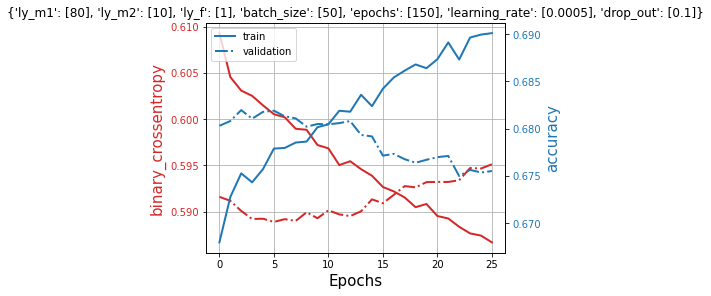

Pandas(Index=2, ly_m1=80, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.05)
{'ly_m1': [80], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.05]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 7s 362us/step - loss: 0.5940 - accuracy: 0.6806 - val_loss: 0.5962 - val_accuracy: 0.6775
Epoch 2/150
19339/19339 [==============================] - 6s 295us/step - loss: 0.5872 - accuracy: 0.6867 - val_loss: 0.5926 - val_accuracy: 0.6792
Epoch 3/150
19339/19339 [==============================] - 6s 325us/step - loss: 0.5855 - accuracy: 0.6865 - val_loss: 0.5944 - val_accuracy: 0.6781
Epoch 4/150
19339/19339 [==============================] - 6s 322us/step - loss: 0.5847 - accuracy: 0.6902 - val_loss: 0.5951 - val_accuracy: 0.6798
Epoch 5/150
19339/19339 [==============================] - 6s 315us/step - loss: 0.5828 - accuracy: 0.6898 - val_los

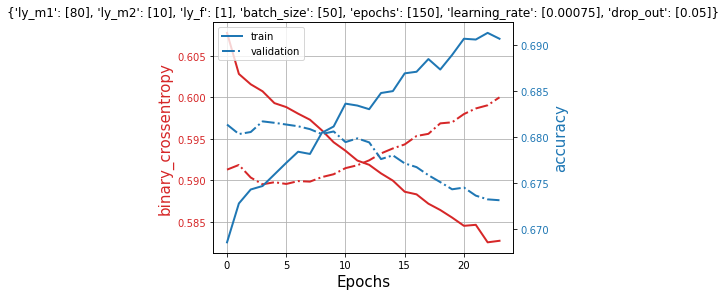

Pandas(Index=3, ly_m1=80, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [80], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 6s 305us/step - loss: 0.5957 - accuracy: 0.6783 - val_loss: 0.5947 - val_accuracy: 0.6782
Epoch 2/150
19339/19339 [==============================] - 6s 306us/step - loss: 0.5893 - accuracy: 0.6854 - val_loss: 0.5929 - val_accuracy: 0.6790
Epoch 3/150
19339/19339 [==============================] - 5s 266us/step - loss: 0.5873 - accuracy: 0.6859 - val_loss: 0.5959 - val_accuracy: 0.6766
Epoch 4/150
19339/19339 [==============================] - 6s 317us/step - loss: 0.5875 - accuracy: 0.6883 - val_loss: 0.5993 - val_accuracy: 0.6749
Epoch 5/150
19339/19339 [==============================] - 7s 369us/step - loss: 0.5849 - accuracy: 0.6895 - val_loss:

58017/58017 [==============================] - 12s 202us/step - loss: 0.5993 - accuracy: 0.6776 - val_loss: 0.5896 - val_accuracy: 0.6823
Epoch 9/150
58017/58017 [==============================] - 14s 248us/step - loss: 0.5990 - accuracy: 0.6792 - val_loss: 0.5903 - val_accuracy: 0.6830
Epoch 10/150
58017/58017 [==============================] - 14s 240us/step - loss: 0.5973 - accuracy: 0.6796 - val_loss: 0.5897 - val_accuracy: 0.6818
Epoch 11/150
58017/58017 [==============================] - 13s 230us/step - loss: 0.5965 - accuracy: 0.6804 - val_loss: 0.5905 - val_accuracy: 0.6813
Epoch 12/150
58017/58017 [==============================] - 12s 203us/step - loss: 0.5951 - accuracy: 0.6823 - val_loss: 0.5905 - val_accuracy: 0.6804
Epoch 13/150
58017/58017 [==============================] - 12s 204us/step - loss: 0.5955 - accuracy: 0.6803 - val_loss: 0.5913 - val_accuracy: 0.6806
Epoch 14/150
58017/58017 [==============================] - 12s 203us/step - loss: 0.5942 - accuracy: 0.6819

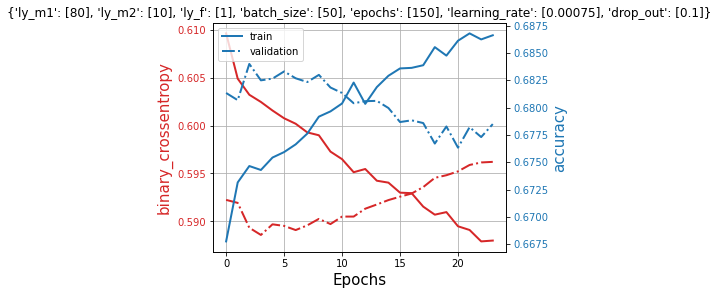

best parameters: {'ly_m1': [80], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


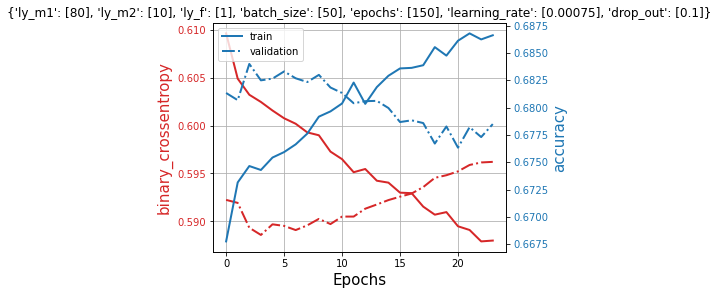

In [325]:
# define the layer structure
#layers = [[40,20,1]]

loss_function = 'binary_crossentropy'
eval_metric = 'accuracy'
# model_nn = build_nn(layers,learning_rate=0.001,drop_out = 0.05,loss_function = loss_function,eval_metric = eval_metric)
# model_nn

# create model
#model_nn = KerasClassifier(build_fn=create_model, verbose=2)

# define the grid search parameters

# number of neurons in the middle layers and output final layers
ly_m1 = [80]   
ly_m2 = [10]
ly_f = [1]
batch_size = [50]
epochs = [150]
learning_rate = [0.0005,0.00075]
drop_out = [0.05,0.1]

#param_grid = dict(layers = layers,batch_size=batch_size, epochs=epochs,learning_rate=learning_rate,drop_out=drop_out)

param_grid = dict(ly_m1=ly_m1,ly_m2=ly_m2,ly_f=ly_f,batch_size=batch_size, epochs=epochs,
                  learning_rate=learning_rate,drop_out=drop_out)


tscv = TimeSeriesSplit(n_splits=2)
#tscv = None
 
cases_nn, best_para_nn, nn_grid = train_nn(build_fn=build_nn,grid_para=param_grid ,cv=tscv,verbose=True,
                                           train_data=train_data_2,val_data=val_data_2,test_data=None,
                                      loss_function = loss_function,eval_metric = eval_metric,plot_progress = True)


In [322]:
nn_grid.best_estimator_.model.summary()
    

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 80)                9440      
_________________________________________________________________
dropout_23 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                810       
_________________________________________________________________
dropout_24 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 10,261
Trainable params: 10,261
Non-trainable params: 0
_________________________________________________________________


In [326]:
cases_nn

ly_m1  ly_m2  ly_f  batch_size  epochs  learning_rate  drop_out  \
0     80     10     1          50     150        0.00050      0.05   
1     80     10     1          50     150        0.00050      0.10   
2     80     10     1          50     150        0.00075      0.05   
3     80     10     1          50     150        0.00075      0.10   

   metric_nn_train  metric_nn_val  
0         0.691918       0.682486  
1         0.690091       0.681955  
2         0.691349       0.681736  
3         0.686781       0.683987

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 8)
Pandas(Index=0, ly_m1=7, ly_m2=2, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [7], 'ly_m2': [2], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 3s 143us/step - loss: 0.6496 - accuracy: 0.6449 - val_loss: 0.6441 - val_accuracy: 0.6710
Epoch 2/150
19339/19339 [==============================] - 2s 124us/step - loss: 0.6329 - accuracy: 0.6621 - val_loss: 0.6331 - val_accuracy: 0.6717
Epoch 3/150
19339/19339 [==============================] - 3s 137us/step - loss: 0.6244 - accuracy: 0.6680 - val_loss: 0.6262 - val_accuracy: 0.6726
Epoch 4/150
19339/19339 [==============================] - 3s 157us/step - loss: 0.6203 - accuracy: 0.6689 - val_loss: 0.6219 - val_accuracy: 0.6714
Epoch 5/150
19339/19339 [=============

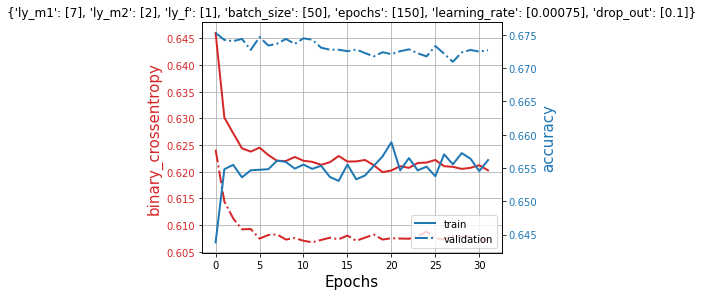

Pandas(Index=1, ly_m1=8, ly_m2=2, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [8], 'ly_m2': [2], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 103us/step - loss: 0.6476 - accuracy: 0.6587 - val_loss: 0.6392 - val_accuracy: 0.6746
Epoch 2/150
19339/19339 [==============================] - 2s 86us/step - loss: 0.6314 - accuracy: 0.6715 - val_loss: 0.6285 - val_accuracy: 0.6759
Epoch 3/150
19339/19339 [==============================] - 2s 90us/step - loss: 0.6229 - accuracy: 0.6723 - val_loss: 0.6221 - val_accuracy: 0.6750
Epoch 4/150
19339/19339 [==============================] - 2s 87us/step - loss: 0.6191 - accuracy: 0.6703 - val_loss: 0.6182 - val_accuracy: 0.6743
Epoch 5/150
19339/19339 [==============================] - 2s 90us/step - loss: 0.6165 - accuracy: 0.6694 - val_loss: 0.6151 

Epoch 22/150
38678/38678 [==============================] - 3s 66us/step - loss: 0.6168 - accuracy: 0.6595 - val_loss: 0.6049 - val_accuracy: 0.6735
Epoch 23/150
38678/38678 [==============================] - 3s 68us/step - loss: 0.6141 - accuracy: 0.6617 - val_loss: 0.6053 - val_accuracy: 0.6744
Epoch 24/150
38678/38678 [==============================] - 3s 67us/step - loss: 0.6142 - accuracy: 0.6627 - val_loss: 0.6052 - val_accuracy: 0.6737
Epoch 25/150
38678/38678 [==============================] - 3s 67us/step - loss: 0.6152 - accuracy: 0.6595 - val_loss: 0.6051 - val_accuracy: 0.6735
Epoch 26/150
38678/38678 [==============================] - 3s 67us/step - loss: 0.6149 - accuracy: 0.6588 - val_loss: 0.6049 - val_accuracy: 0.6749
Epoch 27/150
38678/38678 [==============================] - 3s 67us/step - loss: 0.6150 - accuracy: 0.6592 - val_loss: 0.6047 - val_accuracy: 0.6747
Epoch 28/150
38678/38678 [==============================] - 3s 68us/step - loss: 0.6148 - accuracy: 0.6589

Epoch 23/150
58017/58017 [==============================] - 3s 59us/step - loss: 0.6190 - accuracy: 0.6586 - val_loss: 0.6045 - val_accuracy: 0.6779
Epoch 24/150
58017/58017 [==============================] - 3s 59us/step - loss: 0.6200 - accuracy: 0.6571 - val_loss: 0.6046 - val_accuracy: 0.6772
Epoch 25/150
58017/58017 [==============================] - 3s 59us/step - loss: 0.6202 - accuracy: 0.6560 - val_loss: 0.6051 - val_accuracy: 0.6750
Epoch 26/150
58017/58017 [==============================] - 3s 59us/step - loss: 0.6206 - accuracy: 0.6557 - val_loss: 0.6049 - val_accuracy: 0.6768
Epoch 27/150
58017/58017 [==============================] - 3s 59us/step - loss: 0.6193 - accuracy: 0.6570 - val_loss: 0.6045 - val_accuracy: 0.6780
Epoch 28/150
58017/58017 [==============================] - 3s 59us/step - loss: 0.6193 - accuracy: 0.6592 - val_loss: 0.6052 - val_accuracy: 0.6763
Epoch 29/150
58017/58017 [==============================] - 3s 60us/step - loss: 0.6184 - accuracy: 0.6603

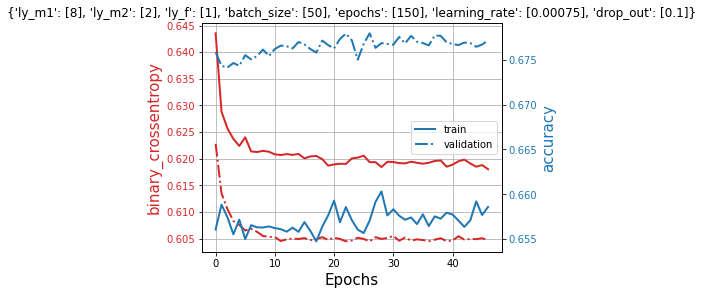

Pandas(Index=2, ly_m1=9, ly_m2=2, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [9], 'ly_m2': [2], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 115us/step - loss: 0.6520 - accuracy: 0.6408 - val_loss: 0.6472 - val_accuracy: 0.6650
Epoch 2/150
19339/19339 [==============================] - 2s 89us/step - loss: 0.6324 - accuracy: 0.6650 - val_loss: 0.6350 - val_accuracy: 0.6692
Epoch 3/150
19339/19339 [==============================] - 2s 94us/step - loss: 0.6263 - accuracy: 0.6633 - val_loss: 0.6280 - val_accuracy: 0.6704
Epoch 4/150
19339/19339 [==============================] - 2s 91us/step - loss: 0.6206 - accuracy: 0.6625 - val_loss: 0.6225 - val_accuracy: 0.6713
Epoch 5/150
19339/19339 [==============================] - 2s 93us/step - loss: 0.6169 - accuracy: 0.6680 - val_loss: 0.6184 

Epoch 22/150
38678/38678 [==============================] - 3s 69us/step - loss: 0.6173 - accuracy: 0.6581 - val_loss: 0.6058 - val_accuracy: 0.6756
Epoch 23/150
38678/38678 [==============================] - 3s 70us/step - loss: 0.6142 - accuracy: 0.6620 - val_loss: 0.6059 - val_accuracy: 0.6754
Epoch 24/150
38678/38678 [==============================] - 3s 69us/step - loss: 0.6150 - accuracy: 0.6625 - val_loss: 0.6054 - val_accuracy: 0.6751
Epoch 25/150
38678/38678 [==============================] - 3s 69us/step - loss: 0.6157 - accuracy: 0.6594 - val_loss: 0.6056 - val_accuracy: 0.6756
Epoch 26/150
38678/38678 [==============================] - 3s 70us/step - loss: 0.6149 - accuracy: 0.6603 - val_loss: 0.6062 - val_accuracy: 0.6742
Epoch 27/150
38678/38678 [==============================] - 3s 78us/step - loss: 0.6163 - accuracy: 0.6597 - val_loss: 0.6056 - val_accuracy: 0.6751
Epoch 28/150
38678/38678 [==============================] - 3s 74us/step - loss: 0.6154 - accuracy: 0.6603

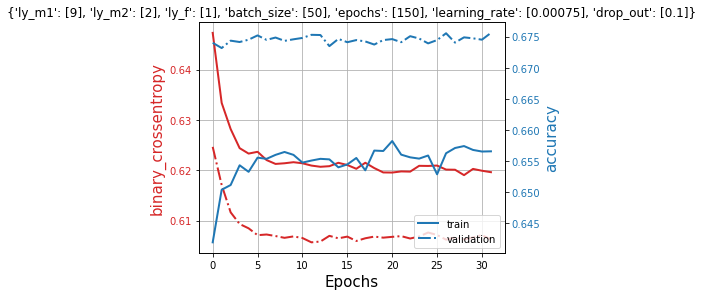

Pandas(Index=3, ly_m1=10, ly_m2=2, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [10], 'ly_m2': [2], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 108us/step - loss: 0.6466 - accuracy: 0.6464 - val_loss: 0.6455 - val_accuracy: 0.6661
Epoch 2/150
19339/19339 [==============================] - 2s 92us/step - loss: 0.6316 - accuracy: 0.6642 - val_loss: 0.6340 - val_accuracy: 0.6689
Epoch 3/150
19339/19339 [==============================] - 2s 94us/step - loss: 0.6231 - accuracy: 0.6667 - val_loss: 0.6262 - val_accuracy: 0.6709
Epoch 4/150
19339/19339 [==============================] - 2s 93us/step - loss: 0.6190 - accuracy: 0.6722 - val_loss: 0.6223 - val_accuracy: 0.6699
Epoch 5/150
19339/19339 [==============================] - 2s 93us/step - loss: 0.6162 - accuracy: 0.6705 - val_loss: 0.618

Epoch 25/150
38678/38678 [==============================] - 3s 71us/step - loss: 0.6143 - accuracy: 0.6598 - val_loss: 0.6056 - val_accuracy: 0.6758
Epoch 26/150
38678/38678 [==============================] - 3s 72us/step - loss: 0.6141 - accuracy: 0.6598 - val_loss: 0.6054 - val_accuracy: 0.6759
Epoch 27/150
38678/38678 [==============================] - 3s 71us/step - loss: 0.6138 - accuracy: 0.6611 - val_loss: 0.6054 - val_accuracy: 0.6757
Epoch 28/150
38678/38678 [==============================] - 3s 71us/step - loss: 0.6142 - accuracy: 0.6613 - val_loss: 0.6059 - val_accuracy: 0.6758
Epoch 29/150
38678/38678 [==============================] - 3s 70us/step - loss: 0.6139 - accuracy: 0.6623 - val_loss: 0.6058 - val_accuracy: 0.6750
Epoch 30/150
38678/38678 [==============================] - 3s 71us/step - loss: 0.6142 - accuracy: 0.6598 - val_loss: 0.6055 - val_accuracy: 0.6755
Epoch 31/150
38678/38678 [==============================] - 3s 72us/step - loss: 0.6121 - accuracy: 0.6642

Epoch 26/150
58017/58017 [==============================] - 4s 65us/step - loss: 0.6201 - accuracy: 0.6553 - val_loss: 0.6047 - val_accuracy: 0.6770
Epoch 27/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6192 - accuracy: 0.6575 - val_loss: 0.6044 - val_accuracy: 0.6774
Epoch 28/150
58017/58017 [==============================] - 4s 68us/step - loss: 0.6190 - accuracy: 0.6564 - val_loss: 0.6048 - val_accuracy: 0.6776
Epoch 29/150
58017/58017 [==============================] - 4s 72us/step - loss: 0.6188 - accuracy: 0.6583 - val_loss: 0.6043 - val_accuracy: 0.6772
Epoch 30/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6192 - accuracy: 0.6561 - val_loss: 0.6043 - val_accuracy: 0.6770
Epoch 31/150
58017/58017 [==============================] - 4s 71us/step - loss: 0.6188 - accuracy: 0.6566 - val_loss: 0.6043 - val_accuracy: 0.6774
Epoch 32/150
58017/58017 [==============================] - 4s 70us/step - loss: 0.6184 - accuracy: 0.6578

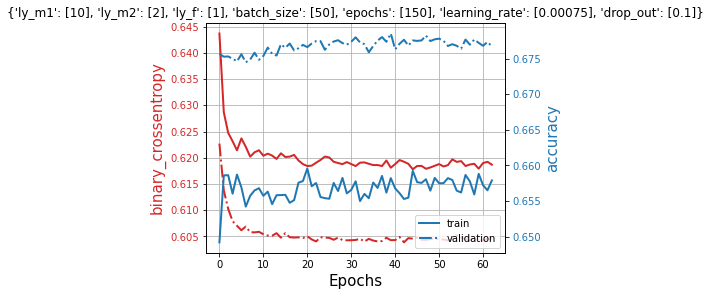

Pandas(Index=4, ly_m1=10, ly_m2=2, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [10], 'ly_m2': [2], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 116us/step - loss: 0.6466 - accuracy: 0.6464 - val_loss: 0.6455 - val_accuracy: 0.6661
Epoch 2/150
19339/19339 [==============================] - 2s 100us/step - loss: 0.6316 - accuracy: 0.6642 - val_loss: 0.6340 - val_accuracy: 0.6689
Epoch 3/150
19339/19339 [==============================] - 2s 98us/step - loss: 0.6231 - accuracy: 0.6667 - val_loss: 0.6262 - val_accuracy: 0.6709
Epoch 4/150
19339/19339 [==============================] - 2s 101us/step - loss: 0.6190 - accuracy: 0.6722 - val_loss: 0.6223 - val_accuracy: 0.6699
Epoch 5/150
19339/19339 [==============================] - 2s 99us/step - loss: 0.6162 - accuracy: 0.6705 - val_loss: 0.6

Epoch 25/150
38678/38678 [==============================] - 3s 76us/step - loss: 0.6143 - accuracy: 0.6598 - val_loss: 0.6056 - val_accuracy: 0.6758
Epoch 26/150
38678/38678 [==============================] - 3s 77us/step - loss: 0.6141 - accuracy: 0.6598 - val_loss: 0.6054 - val_accuracy: 0.6759
Epoch 27/150
38678/38678 [==============================] - 3s 76us/step - loss: 0.6138 - accuracy: 0.6611 - val_loss: 0.6054 - val_accuracy: 0.6757
Epoch 28/150
38678/38678 [==============================] - 3s 76us/step - loss: 0.6142 - accuracy: 0.6613 - val_loss: 0.6059 - val_accuracy: 0.6758
Epoch 29/150
38678/38678 [==============================] - 3s 75us/step - loss: 0.6139 - accuracy: 0.6623 - val_loss: 0.6058 - val_accuracy: 0.6750
Epoch 30/150
38678/38678 [==============================] - 3s 77us/step - loss: 0.6142 - accuracy: 0.6598 - val_loss: 0.6055 - val_accuracy: 0.6755
Epoch 31/150
38678/38678 [==============================] - 3s 73us/step - loss: 0.6121 - accuracy: 0.6642

Epoch 26/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6201 - accuracy: 0.6553 - val_loss: 0.6047 - val_accuracy: 0.6770
Epoch 27/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6192 - accuracy: 0.6575 - val_loss: 0.6044 - val_accuracy: 0.6774
Epoch 28/150
58017/58017 [==============================] - 4s 68us/step - loss: 0.6190 - accuracy: 0.6564 - val_loss: 0.6048 - val_accuracy: 0.6776
Epoch 29/150
58017/58017 [==============================] - 4s 66us/step - loss: 0.6188 - accuracy: 0.6583 - val_loss: 0.6043 - val_accuracy: 0.6772
Epoch 30/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6192 - accuracy: 0.6561 - val_loss: 0.6043 - val_accuracy: 0.6770
Epoch 31/150
58017/58017 [==============================] - 4s 68us/step - loss: 0.6188 - accuracy: 0.6566 - val_loss: 0.6043 - val_accuracy: 0.6774
Epoch 32/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6184 - accuracy: 0.6578

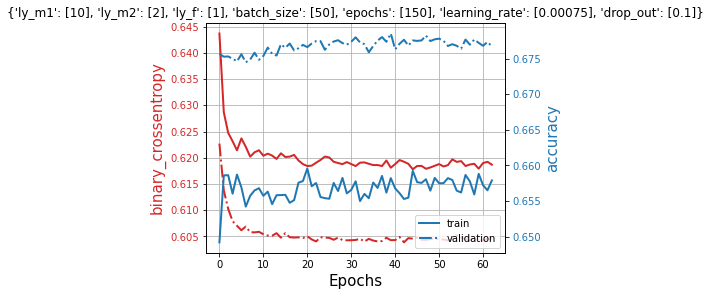

best parameters: {'ly_m1': [10], 'ly_m2': [2], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


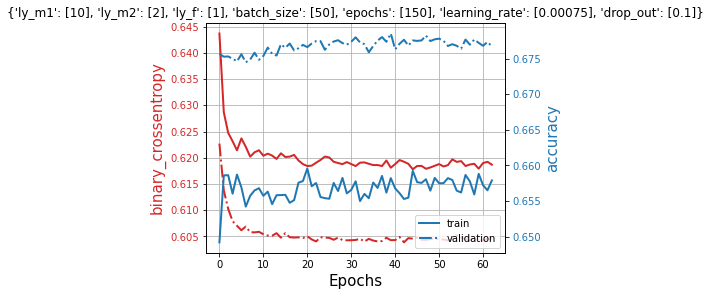

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 16)
Pandas(Index=0, ly_m1=14, ly_m2=4, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [14], 'ly_m2': [4], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 116us/step - loss: 0.6472 - accuracy: 0.6499 - val_loss: 0.6510 - val_accuracy: 0.6573
Epoch 2/150
19339/19339 [==============================] - 2s 101us/step - loss: 0.6280 - accuracy: 0.6782 - val_loss: 0.6411 - val_accuracy: 0.6600
Epoch 3/150
19339/19339 [==============================] - 2s 100us/step - loss: 0.6191 - accuracy: 0.6788 - val_loss: 0.6356 - val_accuracy: 0.6586
Epoch 4/150
19339/19339 [==============================] - 2s 101us/step - loss: 0.6127 - accuracy: 0.6803 - val_loss: 0.6323 - val_accuracy: 0.6573
Epoch 5/150
19339/19339 [==========

Epoch 37/150
58017/58017 [==============================] - 4s 66us/step - loss: 0.6111 - accuracy: 0.6642 - val_loss: 0.6020 - val_accuracy: 0.6755
Epoch 38/150
58017/58017 [==============================] - 4s 70us/step - loss: 0.6110 - accuracy: 0.6637 - val_loss: 0.6021 - val_accuracy: 0.6746
Epoch 39/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6104 - accuracy: 0.6663 - val_loss: 0.6023 - val_accuracy: 0.6750
Epoch 40/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6114 - accuracy: 0.6643 - val_loss: 0.6022 - val_accuracy: 0.6760
Epoch 41/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6098 - accuracy: 0.6650 - val_loss: 0.6023 - val_accuracy: 0.6742
Epoch 42/150
58017/58017 [==============================] - 4s 68us/step - loss: 0.6095 - accuracy: 0.6649 - val_loss: 0.6026 - val_accuracy: 0.6740
Epoch 43/150
58017/58017 [==============================] - 4s 70us/step - loss: 0.6109 - accuracy: 0.6644

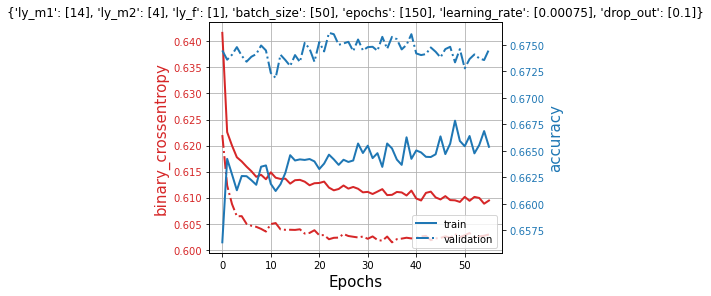

Pandas(Index=1, ly_m1=16, ly_m2=4, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [16], 'ly_m2': [4], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 117us/step - loss: 0.6475 - accuracy: 0.6514 - val_loss: 0.6411 - val_accuracy: 0.6689
Epoch 2/150
19339/19339 [==============================] - 2s 103us/step - loss: 0.6266 - accuracy: 0.6801 - val_loss: 0.6308 - val_accuracy: 0.6722
Epoch 3/150
19339/19339 [==============================] - 2s 102us/step - loss: 0.6184 - accuracy: 0.6782 - val_loss: 0.6240 - val_accuracy: 0.6722
Epoch 4/150
19339/19339 [==============================] - 2s 99us/step - loss: 0.6121 - accuracy: 0.6788 - val_loss: 0.6192 - val_accuracy: 0.6718
Epoch 5/150
19339/19339 [==============================] - 2s 104us/step - loss: 0.6096 - accuracy: 0.6807 - val_loss: 0.

Epoch 21/150
38678/38678 [==============================] - 3s 76us/step - loss: 0.6051 - accuracy: 0.6733 - val_loss: 0.6050 - val_accuracy: 0.6733
Epoch 22/150
38678/38678 [==============================] - 3s 76us/step - loss: 0.6042 - accuracy: 0.6730 - val_loss: 0.6052 - val_accuracy: 0.6727
Epoch 23/150
38678/38678 [==============================] - 3s 77us/step - loss: 0.6032 - accuracy: 0.6728 - val_loss: 0.6046 - val_accuracy: 0.6729
Epoch 24/150
38678/38678 [==============================] - 3s 75us/step - loss: 0.6036 - accuracy: 0.6727 - val_loss: 0.6044 - val_accuracy: 0.6723
Epoch 25/150
38678/38678 [==============================] - 3s 76us/step - loss: 0.6048 - accuracy: 0.6744 - val_loss: 0.6053 - val_accuracy: 0.6719
Epoch 26/150
38678/38678 [==============================] - 3s 76us/step - loss: 0.6031 - accuracy: 0.6729 - val_loss: 0.6051 - val_accuracy: 0.6727
Epoch 27/150
38678/38678 [==============================] - 3s 75us/step - loss: 0.6040 - accuracy: 0.6708

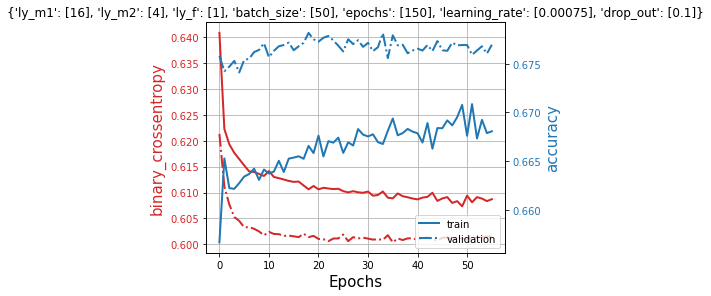

Pandas(Index=2, ly_m1=18, ly_m2=4, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [18], 'ly_m2': [4], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 254us/step - loss: 0.6534 - accuracy: 0.6495 - val_loss: 0.6458 - val_accuracy: 0.6683
Epoch 2/150
19339/19339 [==============================] - 7s 382us/step - loss: 0.6275 - accuracy: 0.6775 - val_loss: 0.6353 - val_accuracy: 0.6660
Epoch 3/150
19339/19339 [==============================] - 3s 130us/step - loss: 0.6190 - accuracy: 0.6787 - val_loss: 0.6294 - val_accuracy: 0.6644
Epoch 4/150
19339/19339 [==============================] - 2s 97us/step - loss: 0.6122 - accuracy: 0.6803 - val_loss: 0.6253 - val_accuracy: 0.6654
Epoch 5/150
19339/19339 [==============================] - 2s 127us/step - loss: 0.6103 - accuracy: 0.6812 - val_loss: 0.

Epoch 25/150
58017/58017 [==============================] - 4s 63us/step - loss: 0.6097 - accuracy: 0.6674 - val_loss: 0.6007 - val_accuracy: 0.6758
Epoch 26/150
58017/58017 [==============================] - 4s 63us/step - loss: 0.6098 - accuracy: 0.6675 - val_loss: 0.6008 - val_accuracy: 0.6765
Epoch 27/150
58017/58017 [==============================] - 6s 107us/step - loss: 0.6092 - accuracy: 0.6680 - val_loss: 0.6003 - val_accuracy: 0.6775
Epoch 28/150
58017/58017 [==============================] - 12s 202us/step - loss: 0.6100 - accuracy: 0.6672 - val_loss: 0.6012 - val_accuracy: 0.6760
Epoch 29/150
58017/58017 [==============================] - 10s 170us/step - loss: 0.6091 - accuracy: 0.6686 - val_loss: 0.6003 - val_accuracy: 0.6766
Epoch 30/150
58017/58017 [==============================] - 9s 155us/step - loss: 0.6090 - accuracy: 0.6686 - val_loss: 0.6008 - val_accuracy: 0.6762
Epoch 31/150
58017/58017 [==============================] - 5s 87us/step - loss: 0.6090 - accuracy: 

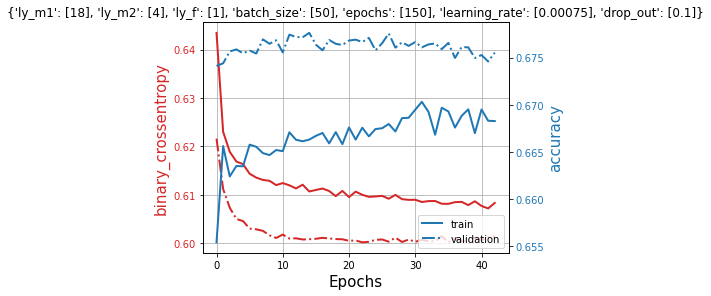

Pandas(Index=3, ly_m1=19, ly_m2=4, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [19], 'ly_m2': [4], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 129us/step - loss: 0.6465 - accuracy: 0.6540 - val_loss: 0.6571 - val_accuracy: 0.6468
Epoch 2/150
19339/19339 [==============================] - 2s 105us/step - loss: 0.6269 - accuracy: 0.6773 - val_loss: 0.6491 - val_accuracy: 0.6466
Epoch 3/150
19339/19339 [==============================] - 2s 95us/step - loss: 0.6190 - accuracy: 0.6780 - val_loss: 0.6436 - val_accuracy: 0.6466
Epoch 4/150
19339/19339 [==============================] - 2s 95us/step - loss: 0.6130 - accuracy: 0.6788 - val_loss: 0.6395 - val_accuracy: 0.6486
Epoch 5/150
19339/19339 [==============================] - 3s 159us/step - loss: 0.6104 - accuracy: 0.6785 - val_loss: 0.6

58017/58017 [==============================] - 5s 84us/step - loss: 0.6087 - accuracy: 0.6667 - val_loss: 0.6007 - val_accuracy: 0.6755
Epoch 28/150
58017/58017 [==============================] - 5s 88us/step - loss: 0.6096 - accuracy: 0.6668 - val_loss: 0.6010 - val_accuracy: 0.6758
Epoch 29/150
58017/58017 [==============================] - 4s 68us/step - loss: 0.6089 - accuracy: 0.6670 - val_loss: 0.6007 - val_accuracy: 0.6765
Epoch 30/150
58017/58017 [==============================] - 4s 75us/step - loss: 0.6084 - accuracy: 0.6684 - val_loss: 0.6010 - val_accuracy: 0.6759
Epoch 31/150
58017/58017 [==============================] - 4s 69us/step - loss: 0.6087 - accuracy: 0.6684 - val_loss: 0.6008 - val_accuracy: 0.6758
Epoch 32/150
58017/58017 [==============================] - 5s 86us/step - loss: 0.6076 - accuracy: 0.6693 - val_loss: 0.6009 - val_accuracy: 0.6773
Epoch 33/150
58017/58017 [==============================] - 5s 80us/step - loss: 0.6075 - accuracy: 0.6684 - val_loss: 

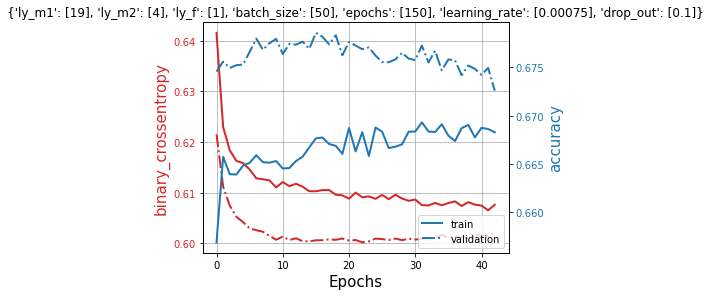

Pandas(Index=4, ly_m1=21, ly_m2=4, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [21], 'ly_m2': [4], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 115us/step - loss: 0.6472 - accuracy: 0.6504 - val_loss: 0.6456 - val_accuracy: 0.6645
Epoch 2/150
19339/19339 [==============================] - 2s 96us/step - loss: 0.6286 - accuracy: 0.6745 - val_loss: 0.6356 - val_accuracy: 0.6651
Epoch 3/150
19339/19339 [==============================] - 2s 97us/step - loss: 0.6213 - accuracy: 0.6751 - val_loss: 0.6306 - val_accuracy: 0.6641
Epoch 4/150
19339/19339 [==============================] - 2s 97us/step - loss: 0.6154 - accuracy: 0.6769 - val_loss: 0.6265 - val_accuracy: 0.6644
Epoch 5/150
19339/19339 [==============================] - 2s 99us/step - loss: 0.6133 - accuracy: 0.6777 - val_loss: 0.624

58017/58017 [==============================] - 4s 64us/step - loss: 0.6083 - accuracy: 0.6686 - val_loss: 0.6012 - val_accuracy: 0.6760
Epoch 48/150
58017/58017 [==============================] - 7s 114us/step - loss: 0.6073 - accuracy: 0.6690 - val_loss: 0.6016 - val_accuracy: 0.6768
Epoch 49/150
58017/58017 [==============================] - 10s 169us/step - loss: 0.6077 - accuracy: 0.6698 - val_loss: 0.6017 - val_accuracy: 0.6756
Epoch 50/150
58017/58017 [==============================] - 14s 249us/step - loss: 0.6066 - accuracy: 0.6696 - val_loss: 0.6017 - val_accuracy: 0.6759
Epoch 51/150
58017/58017 [==============================] - 9s 156us/step - loss: 0.6088 - accuracy: 0.6687 - val_loss: 0.6022 - val_accuracy: 0.6755
Epoch 52/150
58017/58017 [==============================] - 11s 195us/step - loss: 0.6075 - accuracy: 0.6699 - val_loss: 0.6018 - val_accuracy: 0.6756
Epoch 53/150
58017/58017 [==============================] - 12s 204us/step - loss: 0.6086 - accuracy: 0.6677 - 

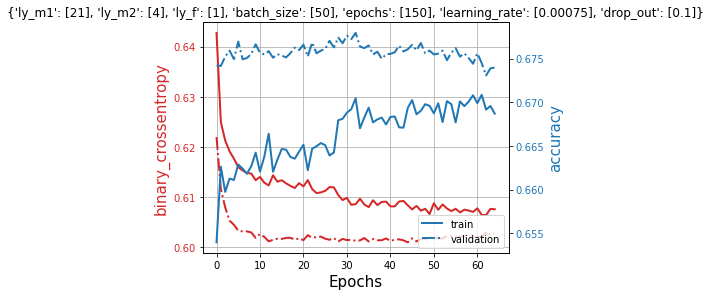

best parameters: {'ly_m1': [19], 'ly_m2': [4], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


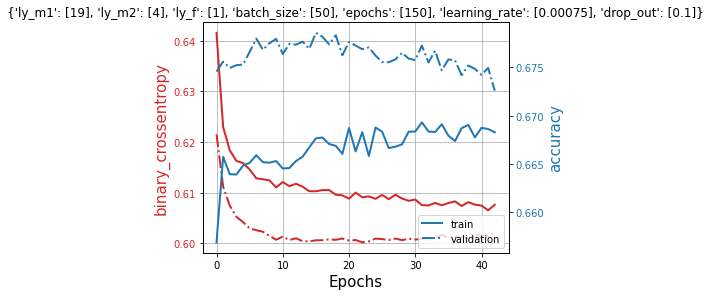

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 25)
Pandas(Index=0, ly_m1=22, ly_m2=6, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [22], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 9s 476us/step - loss: 0.6444 - accuracy: 0.6608 - val_loss: 0.6408 - val_accuracy: 0.6698
Epoch 2/150
19339/19339 [==============================] - 7s 381us/step - loss: 0.6247 - accuracy: 0.6823 - val_loss: 0.6316 - val_accuracy: 0.6701
Epoch 3/150
19339/19339 [==============================] - 7s 373us/step - loss: 0.6150 - accuracy: 0.6821 - val_loss: 0.6260 - val_accuracy: 0.6691
Epoch 4/150
19339/19339 [==============================] - 7s 345us/step - loss: 0.6096 - accuracy: 0.6809 - val_loss: 0.6225 - val_accuracy: 0.6676
Epoch 5/150
19339/19339 [==========

19339/19339 [==============================] - 7s 385us/step - loss: 0.5843 - accuracy: 0.6900 - val_loss: 0.6173 - val_accuracy: 0.6624
Epoch 54/150
19339/19339 [==============================] - 8s 393us/step - loss: 0.5825 - accuracy: 0.6889 - val_loss: 0.6177 - val_accuracy: 0.6621
Epoch 55/150
19339/19339 [==============================] - 9s 480us/step - loss: 0.5838 - accuracy: 0.6906 - val_loss: 0.6179 - val_accuracy: 0.6618
Epoch 56/150
19339/19339 [==============================] - 9s 443us/step - loss: 0.5857 - accuracy: 0.6883 - val_loss: 0.6189 - val_accuracy: 0.6621
Epoch 57/150
19339/19339 [==============================] - 3s 140us/step - loss: 0.5849 - accuracy: 0.6888 - val_loss: 0.6186 - val_accuracy: 0.6616
Train on 38678 samples, validate on 31986 samples
Epoch 1/150
38678/38678 [==============================] - 4s 106us/step - loss: 0.6411 - accuracy: 0.6630 - val_loss: 0.6233 - val_accuracy: 0.6782
Epoch 2/150
38678/38678 [==============================] - 4s 97

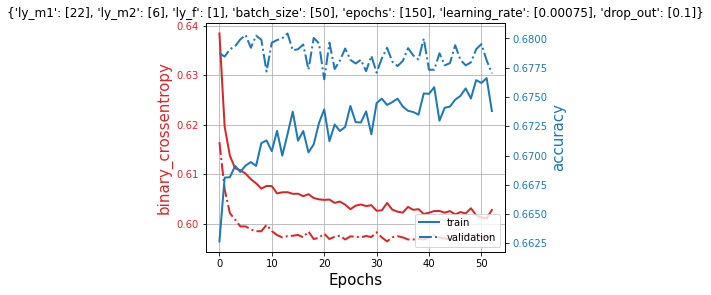

Pandas(Index=1, ly_m1=25, ly_m2=6, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [25], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 4s 219us/step - loss: 0.6445 - accuracy: 0.6542 - val_loss: 0.6474 - val_accuracy: 0.6627
Epoch 2/150
19339/19339 [==============================] - 2s 127us/step - loss: 0.6253 - accuracy: 0.6814 - val_loss: 0.6379 - val_accuracy: 0.6604
Epoch 3/150
19339/19339 [==============================] - 3s 143us/step - loss: 0.6159 - accuracy: 0.6806 - val_loss: 0.6327 - val_accuracy: 0.6588
Epoch 4/150
19339/19339 [==============================] - 6s 297us/step - loss: 0.6106 - accuracy: 0.6816 - val_loss: 0.6280 - val_accuracy: 0.6590
Epoch 5/150
19339/19339 [==============================] - 8s 392us/step - loss: 0.6059 - accuracy: 0.6838 - val_loss: 0

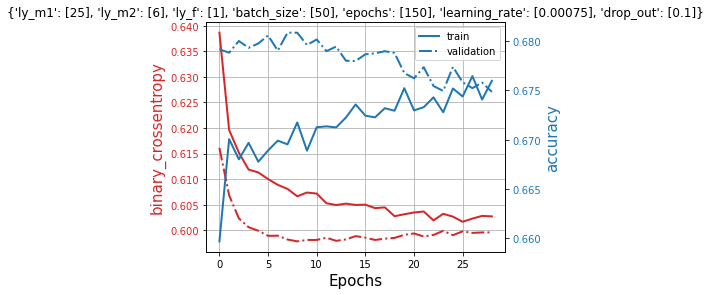

Pandas(Index=2, ly_m1=28, ly_m2=6, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [28], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 270us/step - loss: 0.6425 - accuracy: 0.6610 - val_loss: 0.6484 - val_accuracy: 0.6637
Epoch 2/150
19339/19339 [==============================] - 4s 232us/step - loss: 0.6241 - accuracy: 0.6814 - val_loss: 0.6381 - val_accuracy: 0.6624
Epoch 3/150
19339/19339 [==============================] - 5s 234us/step - loss: 0.6148 - accuracy: 0.6828 - val_loss: 0.6319 - val_accuracy: 0.6624
Epoch 4/150
19339/19339 [==============================] - 4s 230us/step - loss: 0.6086 - accuracy: 0.6821 - val_loss: 0.6275 - val_accuracy: 0.6607
Epoch 5/150
19339/19339 [==============================] - 4s 230us/step - loss: 0.6046 - accuracy: 0.6855 - val_loss: 0

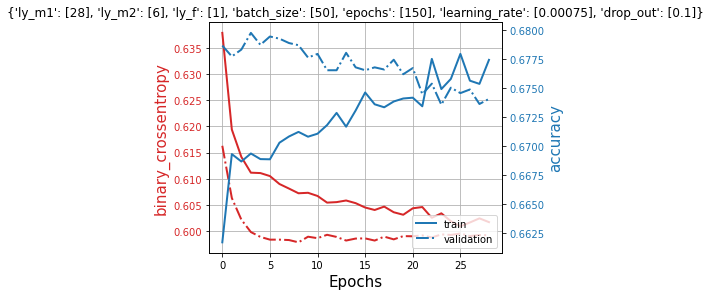

Pandas(Index=3, ly_m1=30, ly_m2=6, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [30], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 121us/step - loss: 0.6444 - accuracy: 0.6627 - val_loss: 0.6416 - val_accuracy: 0.6744
Epoch 2/150
19339/19339 [==============================] - 2s 101us/step - loss: 0.6245 - accuracy: 0.6828 - val_loss: 0.6298 - val_accuracy: 0.6749
Epoch 3/150
19339/19339 [==============================] - 2s 104us/step - loss: 0.6165 - accuracy: 0.6816 - val_loss: 0.6237 - val_accuracy: 0.6739
Epoch 4/150
19339/19339 [==============================] - 3s 138us/step - loss: 0.6099 - accuracy: 0.6813 - val_loss: 0.6195 - val_accuracy: 0.6726
Epoch 5/150
19339/19339 [==============================] - 3s 139us/step - loss: 0.6057 - accuracy: 0.6829 - val_loss: 0

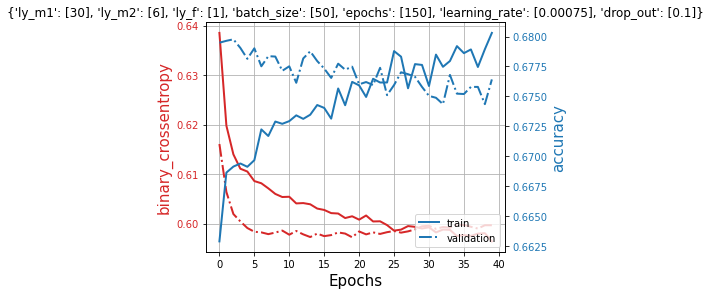

Pandas(Index=4, ly_m1=32, ly_m2=6, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [32], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 278us/step - loss: 0.6414 - accuracy: 0.6652 - val_loss: 0.6488 - val_accuracy: 0.6589
Epoch 2/150
19339/19339 [==============================] - 5s 243us/step - loss: 0.6231 - accuracy: 0.6820 - val_loss: 0.6372 - val_accuracy: 0.6624
Epoch 3/150
19339/19339 [==============================] - 5s 237us/step - loss: 0.6149 - accuracy: 0.6832 - val_loss: 0.6311 - val_accuracy: 0.6628
Epoch 4/150
19339/19339 [==============================] - 5s 266us/step - loss: 0.6079 - accuracy: 0.6830 - val_loss: 0.6265 - val_accuracy: 0.6638
Epoch 5/150
19339/19339 [==============================] - 5s 276us/step - loss: 0.6040 - accuracy: 0.6844 - val_loss: 0

58017/58017 [==============================] - 4s 72us/step - loss: 0.5979 - accuracy: 0.6766 - val_loss: 0.6018 - val_accuracy: 0.6713
Epoch 36/150
58017/58017 [==============================] - 5s 90us/step - loss: 0.5979 - accuracy: 0.6790 - val_loss: 0.6014 - val_accuracy: 0.6721


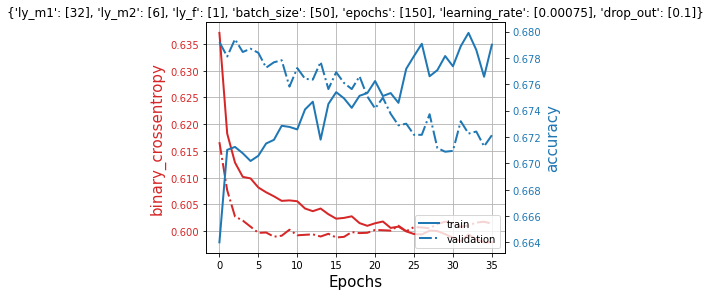

best parameters: {'ly_m1': [25], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


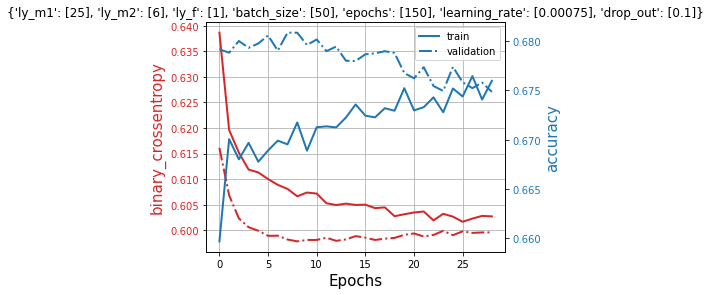

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 32)
Pandas(Index=0, ly_m1=29, ly_m2=8, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [29], 'ly_m2': [8], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 278us/step - loss: 0.6053 - accuracy: 0.6711 - val_loss: 0.6148 - val_accuracy: 0.6668
Epoch 2/150
19339/19339 [==============================] - 5s 265us/step - loss: 0.5924 - accuracy: 0.6856 - val_loss: 0.6145 - val_accuracy: 0.6620
Epoch 3/150
19339/19339 [==============================] - 5s 253us/step - loss: 0.5912 - accuracy: 0.6876 - val_loss: 0.6145 - val_accuracy: 0.6611
Epoch 4/150
19339/19339 [==============================] - 5s 242us/step - loss: 0.5902 - accuracy: 0.6871 - val_loss: 0.6164 - val_accuracy: 0.6601
Epoch 5/150
19339/19339 [==========

Epoch 2/150
58017/58017 [==============================] - 4s 71us/step - loss: 0.6064 - accuracy: 0.6729 - val_loss: 0.5906 - val_accuracy: 0.6803
Epoch 3/150
58017/58017 [==============================] - 4s 71us/step - loss: 0.6044 - accuracy: 0.6738 - val_loss: 0.5901 - val_accuracy: 0.6801
Epoch 4/150
58017/58017 [==============================] - 4s 73us/step - loss: 0.6024 - accuracy: 0.6740 - val_loss: 0.5895 - val_accuracy: 0.6796
Epoch 5/150
58017/58017 [==============================] - 7s 126us/step - loss: 0.6018 - accuracy: 0.6750 - val_loss: 0.5890 - val_accuracy: 0.6794
Epoch 6/150
58017/58017 [==============================] - 10s 179us/step - loss: 0.6010 - accuracy: 0.6758 - val_loss: 0.5897 - val_accuracy: 0.6790
Epoch 7/150
58017/58017 [==============================] - 10s 164us/step - loss: 0.6004 - accuracy: 0.6758 - val_loss: 0.5897 - val_accuracy: 0.6785
Epoch 8/150
58017/58017 [==============================] - 10s 167us/step - loss: 0.5994 - accuracy: 0.6771

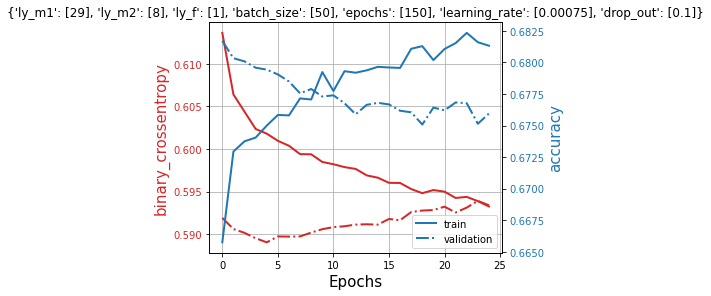

Pandas(Index=1, ly_m1=32, ly_m2=8, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [32], 'ly_m2': [8], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 3s 138us/step - loss: 0.6070 - accuracy: 0.6664 - val_loss: 0.6155 - val_accuracy: 0.6691
Epoch 2/150
19339/19339 [==============================] - 2s 103us/step - loss: 0.5917 - accuracy: 0.6831 - val_loss: 0.6129 - val_accuracy: 0.6676
Epoch 3/150
19339/19339 [==============================] - 2s 104us/step - loss: 0.5914 - accuracy: 0.6853 - val_loss: 0.6137 - val_accuracy: 0.6660
Epoch 4/150
19339/19339 [==============================] - 2s 102us/step - loss: 0.5903 - accuracy: 0.6861 - val_loss: 0.6142 - val_accuracy: 0.6646
Epoch 5/150
19339/19339 [==============================] - 2s 103us/step - loss: 0.5886 - accuracy: 0.6858 - val_loss: 0

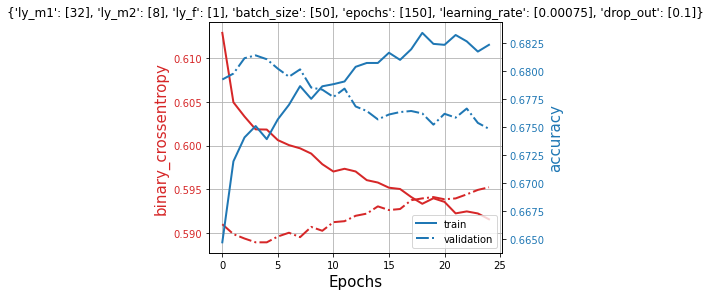

Pandas(Index=2, ly_m1=35, ly_m2=8, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [35], 'ly_m2': [8], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 120us/step - loss: 0.6011 - accuracy: 0.6758 - val_loss: 0.6040 - val_accuracy: 0.6748
Epoch 2/150
19339/19339 [==============================] - 2s 107us/step - loss: 0.5899 - accuracy: 0.6843 - val_loss: 0.6009 - val_accuracy: 0.6731
Epoch 3/150
19339/19339 [==============================] - 2s 103us/step - loss: 0.5877 - accuracy: 0.6858 - val_loss: 0.6004 - val_accuracy: 0.6718
Epoch 4/150
19339/19339 [==============================] - 2s 106us/step - loss: 0.5864 - accuracy: 0.6859 - val_loss: 0.6011 - val_accuracy: 0.6726
Epoch 5/150
19339/19339 [==============================] - 2s 110us/step - loss: 0.5862 - accuracy: 0.6904 - val_loss: 0

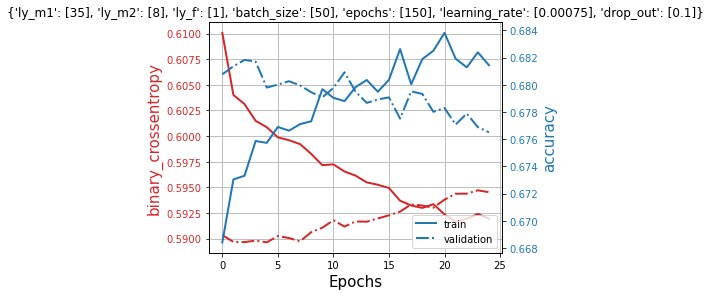

Pandas(Index=3, ly_m1=38, ly_m2=8, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [38], 'ly_m2': [8], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 272us/step - loss: 0.6015 - accuracy: 0.6749 - val_loss: 0.6037 - val_accuracy: 0.6755
Epoch 2/150
19339/19339 [==============================] - 5s 236us/step - loss: 0.5901 - accuracy: 0.6840 - val_loss: 0.6014 - val_accuracy: 0.6748
Epoch 3/150
19339/19339 [==============================] - 5s 240us/step - loss: 0.5891 - accuracy: 0.6852 - val_loss: 0.6001 - val_accuracy: 0.6762
Epoch 4/150
19339/19339 [==============================] - 5s 239us/step - loss: 0.5869 - accuracy: 0.6873 - val_loss: 0.6021 - val_accuracy: 0.6749
Epoch 5/150
19339/19339 [==============================] - 5s 238us/step - loss: 0.5868 - accuracy: 0.6878 - val_loss: 0

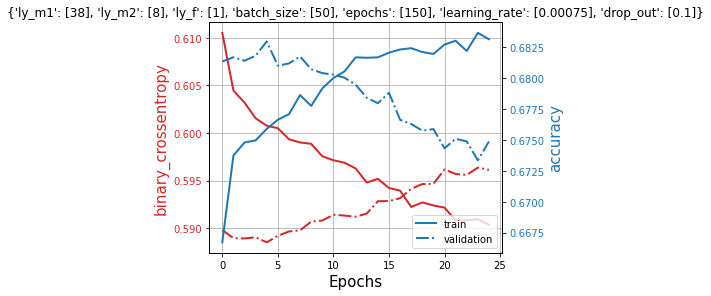

Pandas(Index=4, ly_m1=42, ly_m2=8, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [42], 'ly_m2': [8], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 120us/step - loss: 0.6027 - accuracy: 0.6725 - val_loss: 0.6130 - val_accuracy: 0.6684
Epoch 2/150
19339/19339 [==============================] - 2s 105us/step - loss: 0.5916 - accuracy: 0.6832 - val_loss: 0.6116 - val_accuracy: 0.6643
Epoch 3/150
19339/19339 [==============================] - 2s 107us/step - loss: 0.5906 - accuracy: 0.6882 - val_loss: 0.6111 - val_accuracy: 0.6634
Epoch 4/150
19339/19339 [==============================] - 2s 105us/step - loss: 0.5884 - accuracy: 0.6880 - val_loss: 0.6108 - val_accuracy: 0.6634
Epoch 5/150
19339/19339 [==============================] - 2s 106us/step - loss: 0.5887 - accuracy: 0.6880 - val_loss: 0

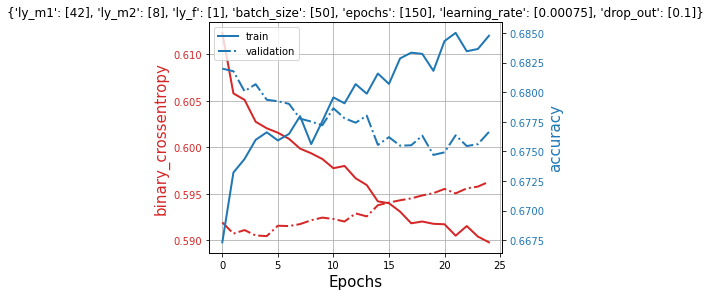

best parameters: {'ly_m1': [38], 'ly_m2': [8], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


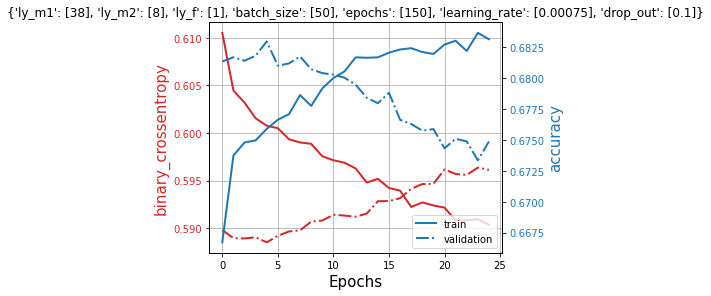

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 40)
Pandas(Index=0, ly_m1=36, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [36], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 119us/step - loss: 0.6009 - accuracy: 0.6767 - val_loss: 0.6125 - val_accuracy: 0.6651
Epoch 2/150
19339/19339 [==============================] - 2s 107us/step - loss: 0.5899 - accuracy: 0.6873 - val_loss: 0.6101 - val_accuracy: 0.6633
Epoch 3/150
19339/19339 [==============================] - 2s 106us/step - loss: 0.5860 - accuracy: 0.6860 - val_loss: 0.6100 - val_accuracy: 0.6628
Epoch 4/150
19339/19339 [==============================] - 2s 106us/step - loss: 0.5868 - accuracy: 0.6890 - val_loss: 0.6101 - val_accuracy: 0.6632
Epoch 5/150
19339/19339 [========

Epoch 4/150
58017/58017 [==============================] - 9s 151us/step - loss: 0.6012 - accuracy: 0.6761 - val_loss: 0.5889 - val_accuracy: 0.6815
Epoch 5/150
58017/58017 [==============================] - 10s 170us/step - loss: 0.6003 - accuracy: 0.6771 - val_loss: 0.5890 - val_accuracy: 0.6814
Epoch 6/150
58017/58017 [==============================] - 10s 173us/step - loss: 0.5991 - accuracy: 0.6777 - val_loss: 0.5892 - val_accuracy: 0.6810
Epoch 7/150
58017/58017 [==============================] - 10s 173us/step - loss: 0.5988 - accuracy: 0.6788 - val_loss: 0.5897 - val_accuracy: 0.6798
Epoch 8/150
58017/58017 [==============================] - 7s 123us/step - loss: 0.5968 - accuracy: 0.6797 - val_loss: 0.5899 - val_accuracy: 0.6795
Epoch 9/150
58017/58017 [==============================] - 4s 73us/step - loss: 0.5968 - accuracy: 0.6799 - val_loss: 0.5902 - val_accuracy: 0.6792
Epoch 10/150
58017/58017 [==============================] - 4s 74us/step - loss: 0.5951 - accuracy: 0.68

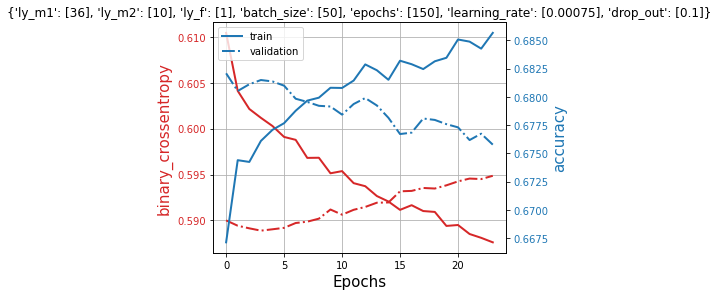

Pandas(Index=1, ly_m1=40, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [40], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 277us/step - loss: 0.5986 - accuracy: 0.6808 - val_loss: 0.5985 - val_accuracy: 0.6756
Epoch 2/150
19339/19339 [==============================] - 5s 243us/step - loss: 0.5896 - accuracy: 0.6834 - val_loss: 0.5982 - val_accuracy: 0.6743
Epoch 3/150
19339/19339 [==============================] - 5s 244us/step - loss: 0.5867 - accuracy: 0.6857 - val_loss: 0.5983 - val_accuracy: 0.6746
Epoch 4/150
19339/19339 [==============================] - 3s 157us/step - loss: 0.5866 - accuracy: 0.6867 - val_loss: 0.5990 - val_accuracy: 0.6750
Epoch 5/150
19339/19339 [==============================] - 2s 105us/step - loss: 0.5844 - accuracy: 0.6909 - val_loss:

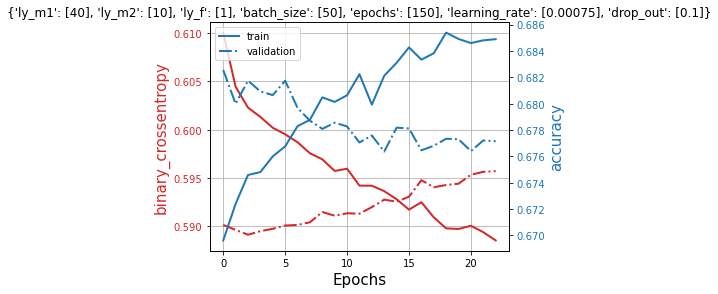

Pandas(Index=2, ly_m1=44, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [44], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 120us/step - loss: 0.6016 - accuracy: 0.6740 - val_loss: 0.6025 - val_accuracy: 0.6748
Epoch 2/150
19339/19339 [==============================] - 2s 103us/step - loss: 0.5892 - accuracy: 0.6860 - val_loss: 0.6020 - val_accuracy: 0.6740
Epoch 3/150
19339/19339 [==============================] - 2s 104us/step - loss: 0.5871 - accuracy: 0.6840 - val_loss: 0.6027 - val_accuracy: 0.6730
Epoch 4/150
19339/19339 [==============================] - 2s 108us/step - loss: 0.5870 - accuracy: 0.6869 - val_loss: 0.6017 - val_accuracy: 0.6745
Epoch 5/150
19339/19339 [==============================] - 2s 106us/step - loss: 0.5848 - accuracy: 0.6858 - val_loss:

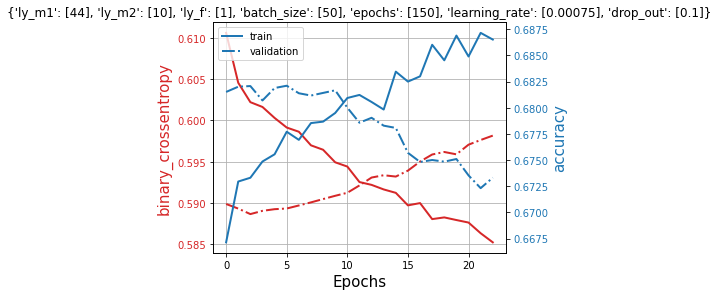

Pandas(Index=3, ly_m1=48, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [48], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 120us/step - loss: 0.5999 - accuracy: 0.6740 - val_loss: 0.6207 - val_accuracy: 0.6539
Epoch 2/150
19339/19339 [==============================] - 2s 109us/step - loss: 0.5896 - accuracy: 0.6852 - val_loss: 0.6182 - val_accuracy: 0.6548
Epoch 3/150
19339/19339 [==============================] - 2s 107us/step - loss: 0.5864 - accuracy: 0.6876 - val_loss: 0.6177 - val_accuracy: 0.6564
Epoch 4/150
19339/19339 [==============================] - 4s 227us/step - loss: 0.5866 - accuracy: 0.6889 - val_loss: 0.6175 - val_accuracy: 0.6555
Epoch 5/150
19339/19339 [==============================] - 5s 256us/step - loss: 0.5838 - accuracy: 0.6889 - val_loss:

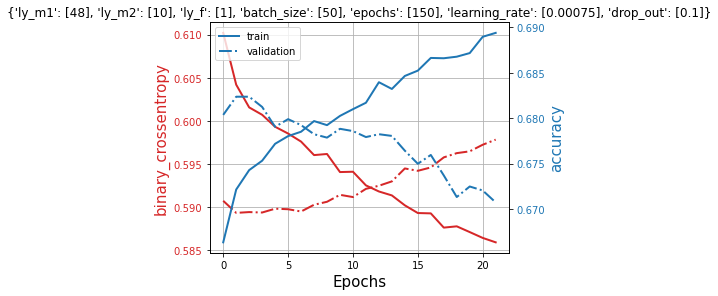

Pandas(Index=4, ly_m1=52, ly_m2=10, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [52], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 282us/step - loss: 0.6000 - accuracy: 0.6771 - val_loss: 0.6029 - val_accuracy: 0.6722
Epoch 2/150
19339/19339 [==============================] - 5s 248us/step - loss: 0.5896 - accuracy: 0.6851 - val_loss: 0.6018 - val_accuracy: 0.6705
Epoch 3/150
19339/19339 [==============================] - 5s 249us/step - loss: 0.5867 - accuracy: 0.6854 - val_loss: 0.6027 - val_accuracy: 0.6696
Epoch 4/150
19339/19339 [==============================] - 4s 182us/step - loss: 0.5867 - accuracy: 0.6893 - val_loss: 0.6037 - val_accuracy: 0.6683
Epoch 5/150
19339/19339 [==============================] - 2s 112us/step - loss: 0.5841 - accuracy: 0.6894 - val_loss:

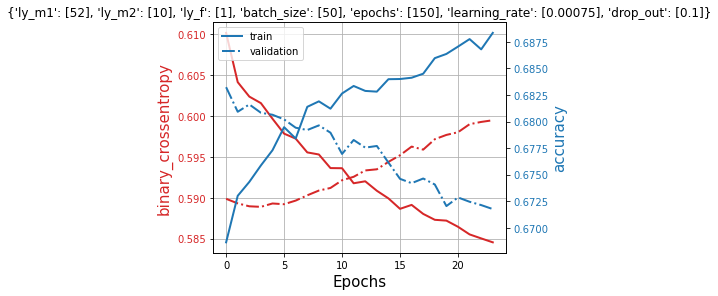

best parameters: {'ly_m1': [52], 'ly_m2': [10], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


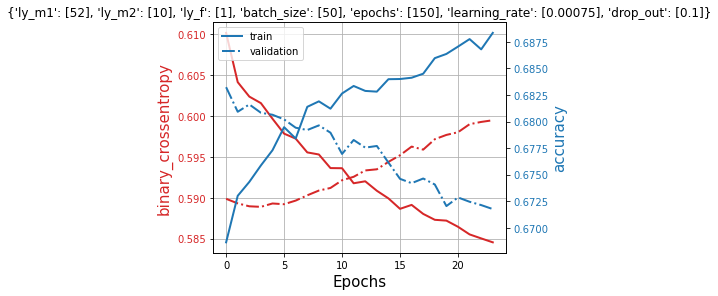

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 50)
Pandas(Index=0, ly_m1=45, ly_m2=12, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [45], 'ly_m2': [12], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 127us/step - loss: 0.6014 - accuracy: 0.6753 - val_loss: 0.6251 - val_accuracy: 0.6545
Epoch 2/150
19339/19339 [==============================] - 2s 110us/step - loss: 0.5883 - accuracy: 0.6855 - val_loss: 0.6229 - val_accuracy: 0.6517
Epoch 3/150
19339/19339 [==============================] - 2s 106us/step - loss: 0.5860 - accuracy: 0.6879 - val_loss: 0.6212 - val_accuracy: 0.6562
Epoch 4/150
19339/19339 [==============================] - 2s 108us/step - loss: 0.5848 - accuracy: 0.6868 - val_loss: 0.6194 - val_accuracy: 0.6571
Epoch 5/150
19339/19339 [========

Epoch 2/150
58017/58017 [==============================] - 5s 79us/step - loss: 0.6032 - accuracy: 0.6741 - val_loss: 0.5893 - val_accuracy: 0.6833
Epoch 3/150
58017/58017 [==============================] - 4s 77us/step - loss: 0.6016 - accuracy: 0.6753 - val_loss: 0.5891 - val_accuracy: 0.6807
Epoch 4/150
58017/58017 [==============================] - 5s 89us/step - loss: 0.5992 - accuracy: 0.6765 - val_loss: 0.5889 - val_accuracy: 0.6804
Epoch 5/150
58017/58017 [==============================] - 6s 99us/step - loss: 0.5989 - accuracy: 0.6771 - val_loss: 0.5893 - val_accuracy: 0.6818
Epoch 6/150
58017/58017 [==============================] - 5s 88us/step - loss: 0.5972 - accuracy: 0.6787 - val_loss: 0.5893 - val_accuracy: 0.6813
Epoch 7/150
58017/58017 [==============================] - 5s 83us/step - loss: 0.5960 - accuracy: 0.6784 - val_loss: 0.5895 - val_accuracy: 0.6809
Epoch 8/150
58017/58017 [==============================] - 4s 75us/step - loss: 0.5949 - accuracy: 0.6807 - val_

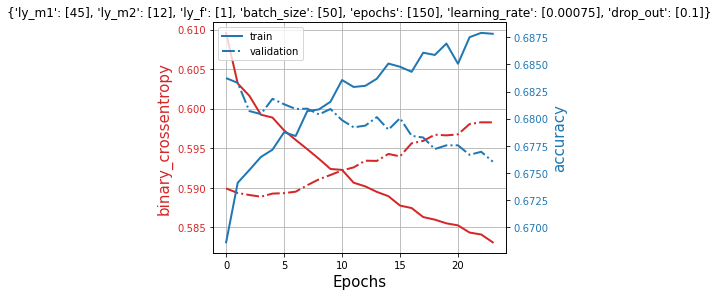

Pandas(Index=1, ly_m1=50, ly_m2=12, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [50], 'ly_m2': [12], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 125us/step - loss: 0.5997 - accuracy: 0.6773 - val_loss: 0.6093 - val_accuracy: 0.6639
Epoch 2/150
19339/19339 [==============================] - 2s 110us/step - loss: 0.5880 - accuracy: 0.6848 - val_loss: 0.6079 - val_accuracy: 0.6660
Epoch 3/150
19339/19339 [==============================] - 2s 111us/step - loss: 0.5858 - accuracy: 0.6876 - val_loss: 0.6082 - val_accuracy: 0.6653
Epoch 4/150
19339/19339 [==============================] - 2s 109us/step - loss: 0.5843 - accuracy: 0.6898 - val_loss: 0.6082 - val_accuracy: 0.6659
Epoch 5/150
19339/19339 [==============================] - 2s 114us/step - loss: 0.5813 - accuracy: 0.6904 - val_loss:

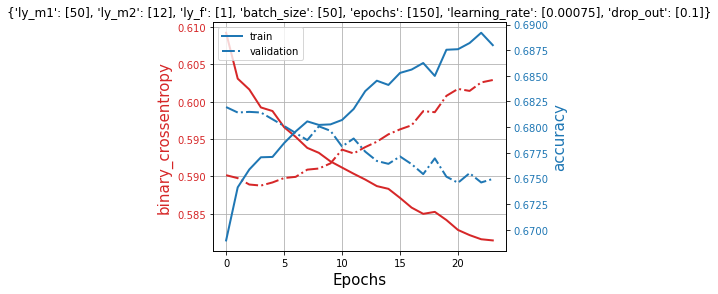

Pandas(Index=2, ly_m1=55, ly_m2=12, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [55], 'ly_m2': [12], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 129us/step - loss: 0.6000 - accuracy: 0.6759 - val_loss: 0.6222 - val_accuracy: 0.6533
Epoch 2/150
19339/19339 [==============================] - 2s 109us/step - loss: 0.5873 - accuracy: 0.6868 - val_loss: 0.6180 - val_accuracy: 0.6567
Epoch 3/150
19339/19339 [==============================] - 2s 107us/step - loss: 0.5856 - accuracy: 0.6874 - val_loss: 0.6177 - val_accuracy: 0.6564
Epoch 4/150
19339/19339 [==============================] - 2s 112us/step - loss: 0.5835 - accuracy: 0.6888 - val_loss: 0.6179 - val_accuracy: 0.6562
Epoch 5/150
19339/19339 [==============================] - 2s 112us/step - loss: 0.5822 - accuracy: 0.6891 - val_loss:

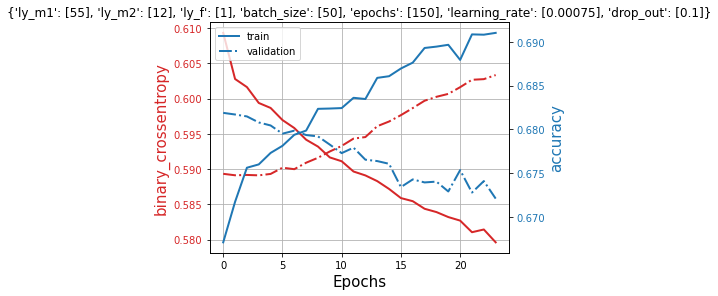

Pandas(Index=3, ly_m1=60, ly_m2=12, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [60], 'ly_m2': [12], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 3s 132us/step - loss: 0.5994 - accuracy: 0.6786 - val_loss: 0.6076 - val_accuracy: 0.6666
Epoch 2/150
19339/19339 [==============================] - 2s 115us/step - loss: 0.5871 - accuracy: 0.6847 - val_loss: 0.6051 - val_accuracy: 0.6682
Epoch 3/150
19339/19339 [==============================] - 2s 112us/step - loss: 0.5854 - accuracy: 0.6878 - val_loss: 0.6051 - val_accuracy: 0.6666
Epoch 4/150
19339/19339 [==============================] - 2s 113us/step - loss: 0.5839 - accuracy: 0.6879 - val_loss: 0.6049 - val_accuracy: 0.6669
Epoch 5/150
19339/19339 [==============================] - 2s 112us/step - loss: 0.5816 - accuracy: 0.6911 - val_loss:

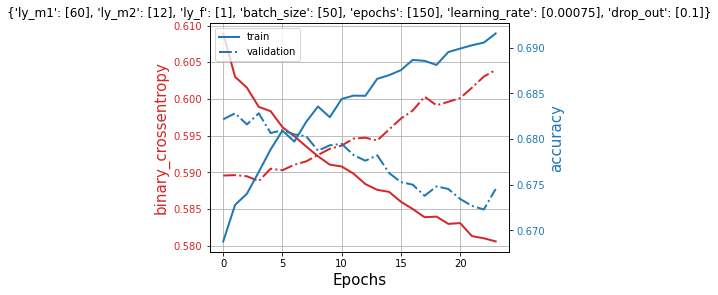

Pandas(Index=4, ly_m1=65, ly_m2=12, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [65], 'ly_m2': [12], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 2s 126us/step - loss: 0.5975 - accuracy: 0.6779 - val_loss: 0.6103 - val_accuracy: 0.6666
Epoch 2/150
19339/19339 [==============================] - 2s 113us/step - loss: 0.5879 - accuracy: 0.6860 - val_loss: 0.6083 - val_accuracy: 0.6677
Epoch 3/150
19339/19339 [==============================] - 2s 118us/step - loss: 0.5847 - accuracy: 0.6879 - val_loss: 0.6070 - val_accuracy: 0.6678
Epoch 4/150
19339/19339 [==============================] - 2s 114us/step - loss: 0.5836 - accuracy: 0.6906 - val_loss: 0.6080 - val_accuracy: 0.6668
Epoch 5/150
19339/19339 [==============================] - 2s 113us/step - loss: 0.5807 - accuracy: 0.6891 - val_loss:

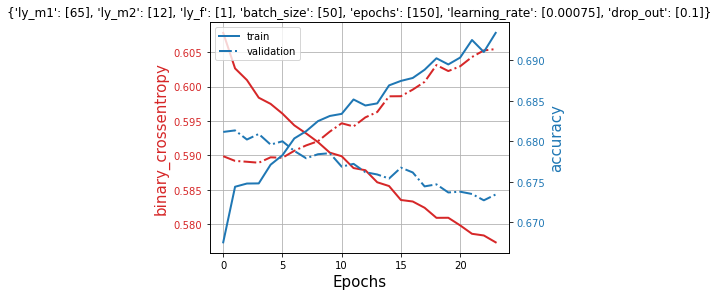

best parameters: {'ly_m1': [45], 'ly_m2': [12], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


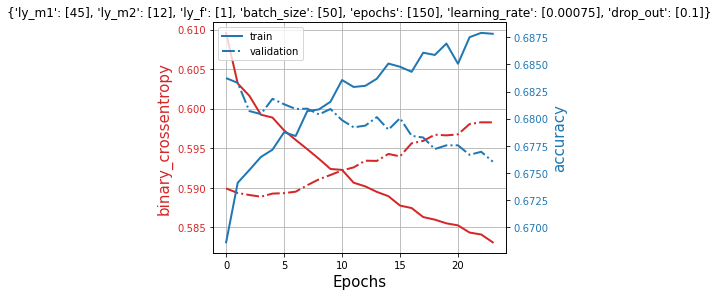

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 60)
Pandas(Index=0, ly_m1=54, ly_m2=15, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [54], 'ly_m2': [15], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 12s 605us/step - loss: 0.6003 - accuracy: 0.6782 - val_loss: 0.6065 - val_accuracy: 0.6723
Epoch 2/150
19339/19339 [==============================] - 6s 334us/step - loss: 0.5873 - accuracy: 0.6860 - val_loss: 0.6063 - val_accuracy: 0.6703
Epoch 3/150
19339/19339 [==============================] - 4s 210us/step - loss: 0.5860 - accuracy: 0.6878 - val_loss: 0.6060 - val_accuracy: 0.6704
Epoch 4/150
19339/19339 [==============================] - 3s 146us/step - loss: 0.5851 - accuracy: 0.6887 - val_loss: 0.6076 - val_accuracy: 0.6674
Epoch 5/150
19339/19339 [=======

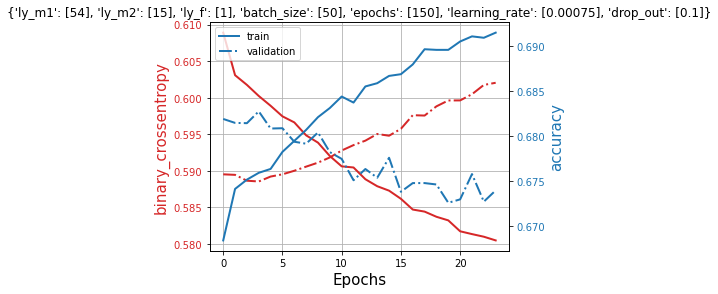

Pandas(Index=1, ly_m1=60, ly_m2=15, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [60], 'ly_m2': [15], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 11s 586us/step - loss: 0.5987 - accuracy: 0.6791 - val_loss: 0.5995 - val_accuracy: 0.6744
Epoch 2/150
19339/19339 [==============================] - 7s 357us/step - loss: 0.5875 - accuracy: 0.6855 - val_loss: 0.5992 - val_accuracy: 0.6738
Epoch 3/150
19339/19339 [==============================] - 5s 257us/step - loss: 0.5859 - accuracy: 0.6902 - val_loss: 0.5991 - val_accuracy: 0.6743
Epoch 4/150
19339/19339 [==============================] - 6s 333us/step - loss: 0.5846 - accuracy: 0.6885 - val_loss: 0.5986 - val_accuracy: 0.6744
Epoch 5/150
19339/19339 [==============================] - 6s 318us/step - loss: 0.5819 - accuracy: 0.6905 - val_loss

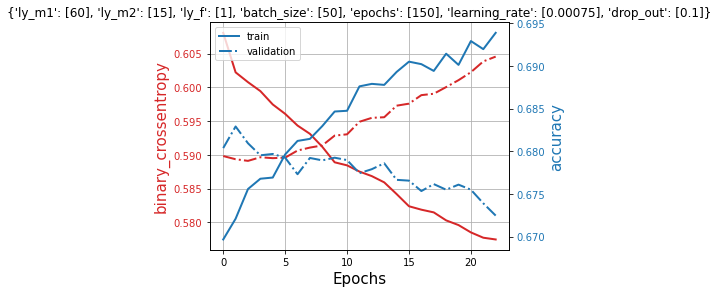

Pandas(Index=2, ly_m1=66, ly_m2=15, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [66], 'ly_m2': [15], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 13s 692us/step - loss: 0.5978 - accuracy: 0.6791 - val_loss: 0.6008 - val_accuracy: 0.6730loss: 0.5975 - accuracy: 0.67
Epoch 2/150
19339/19339 [==============================] - 12s 602us/step - loss: 0.5867 - accuracy: 0.6883 - val_loss: 0.6004 - val_accuracy: 0.6729
Epoch 3/150
19339/19339 [==============================] - 12s 628us/step - loss: 0.5850 - accuracy: 0.6877 - val_loss: 0.5993 - val_accuracy: 0.6745
Epoch 4/150
19339/19339 [==============================] - 12s 642us/step - loss: 0.5832 - accuracy: 0.6901 - val_loss: 0.6008 - val_accuracy: 0.6711
Epoch 5/150
19339/19339 [==============================] - 13s 668us/step - loss: 0.5

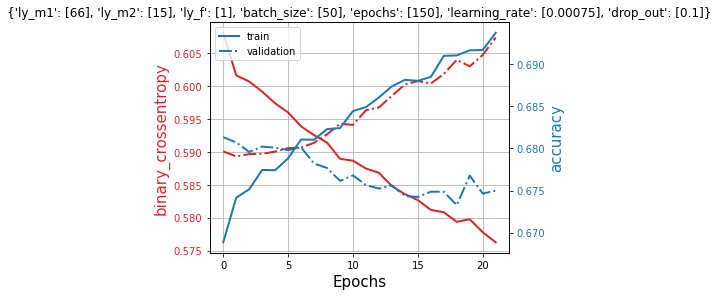

Pandas(Index=3, ly_m1=72, ly_m2=15, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [72], 'ly_m2': [15], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 13s 646us/step - loss: 0.5987 - accuracy: 0.6785 - val_loss: 0.6104 - val_accuracy: 0.6669
Epoch 2/150
19339/19339 [==============================] - 12s 611us/step - loss: 0.5873 - accuracy: 0.6858 - val_loss: 0.6105 - val_accuracy: 0.6655
Epoch 3/150
19339/19339 [==============================] - 12s 616us/step - loss: 0.5854 - accuracy: 0.6894 - val_loss: 0.6120 - val_accuracy: 0.6624
Epoch 4/150
19339/19339 [==============================] - 12s 614us/step - loss: 0.5844 - accuracy: 0.6883 - val_loss: 0.6122 - val_accuracy: 0.6618
Epoch 5/150
19339/19339 [==============================] - 12s 604us/step - loss: 0.5820 - accuracy: 0.6904 - val_

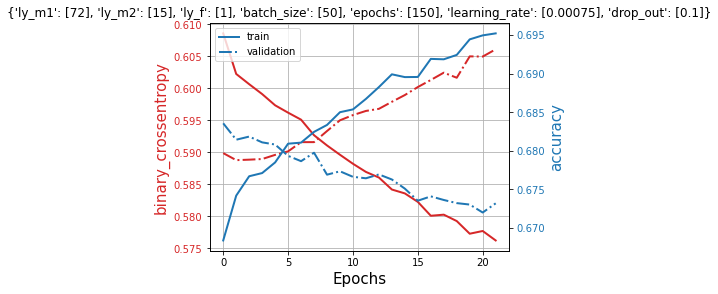

Pandas(Index=4, ly_m1=78, ly_m2=15, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [78], 'ly_m2': [15], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 4s 210us/step - loss: 0.5969 - accuracy: 0.6794 - val_loss: 0.6019 - val_accuracy: 0.6723
Epoch 2/150
19339/19339 [==============================] - 3s 177us/step - loss: 0.5866 - accuracy: 0.6859 - val_loss: 0.6002 - val_accuracy: 0.6737
Epoch 3/150
19339/19339 [==============================] - 4s 197us/step - loss: 0.5854 - accuracy: 0.6884 - val_loss: 0.5997 - val_accuracy: 0.6741
Epoch 4/150
19339/19339 [==============================] - 5s 246us/step - loss: 0.5835 - accuracy: 0.6888 - val_loss: 0.5989 - val_accuracy: 0.6740
Epoch 5/150
19339/19339 [==============================] - 12s 638us/step - loss: 0.5818 - accuracy: 0.6908 - val_loss

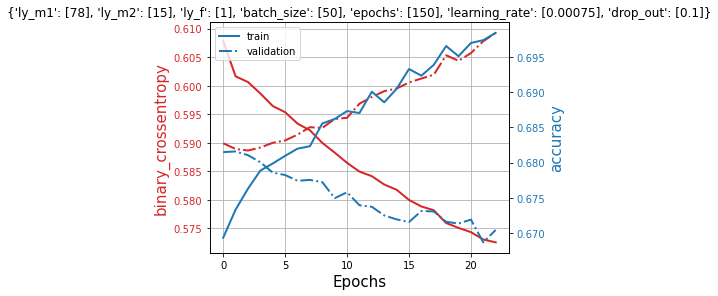

best parameters: {'ly_m1': [72], 'ly_m2': [15], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


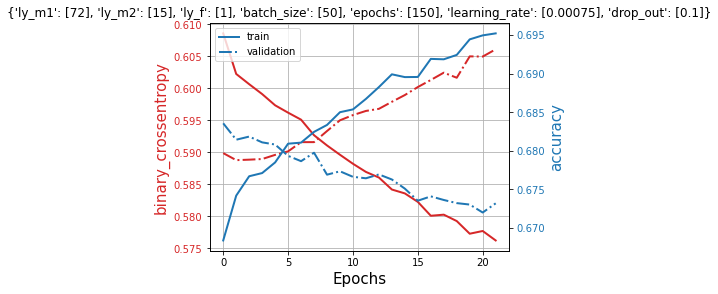

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 70)
Pandas(Index=0, ly_m1=63, ly_m2=18, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [63], 'ly_m2': [18], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 4s 206us/step - loss: 0.5977 - accuracy: 0.6787 - val_loss: 0.6046 - val_accuracy: 0.6711
Epoch 2/150
19339/19339 [==============================] - 7s 365us/step - loss: 0.5881 - accuracy: 0.6857 - val_loss: 0.6046 - val_accuracy: 0.6684
Epoch 3/150
19339/19339 [==============================] - 11s 587us/step - loss: 0.5850 - accuracy: 0.6865 - val_loss: 0.6033 - val_accuracy: 0.6694
Epoch 4/150
19339/19339 [==============================] - 12s 607us/step - loss: 0.5827 - accuracy: 0.6887 - val_loss: 0.6051 - val_accuracy: 0.6670
Epoch 5/150
19339/19339 [======

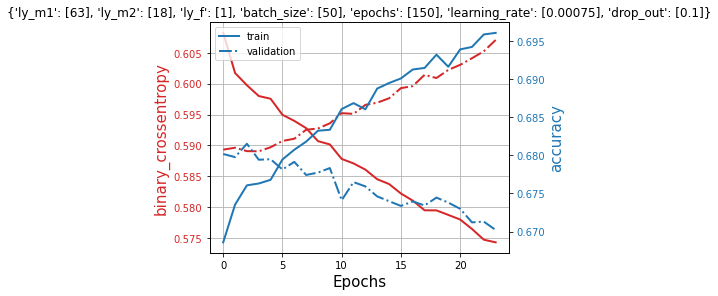

Pandas(Index=1, ly_m1=70, ly_m2=18, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [70], 'ly_m2': [18], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 11s 582us/step - loss: 0.5963 - accuracy: 0.6812 - val_loss: 0.5971 - val_accuracy: 0.6775
Epoch 2/150
19339/19339 [==============================] - 10s 520us/step - loss: 0.5874 - accuracy: 0.6864 - val_loss: 0.5951 - val_accuracy: 0.6779
Epoch 3/150
19339/19339 [==============================] - 9s 484us/step - loss: 0.5844 - accuracy: 0.6873 - val_loss: 0.5950 - val_accuracy: 0.6768
Epoch 4/150
19339/19339 [==============================] - 10s 501us/step - loss: 0.5826 - accuracy: 0.6912 - val_loss: 0.5960 - val_accuracy: 0.6759
Epoch 5/150
19339/19339 [==============================] - 10s 526us/step - loss: 0.5818 - accuracy: 0.6903 - val_l

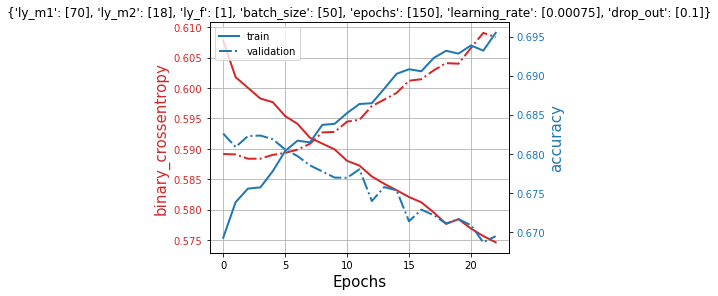

Pandas(Index=2, ly_m1=77, ly_m2=18, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [77], 'ly_m2': [18], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 5s 246us/step - loss: 0.5950 - accuracy: 0.6806 - val_loss: 0.5983 - val_accuracy: 0.6772
Epoch 2/150
19339/19339 [==============================] - 11s 579us/step - loss: 0.5871 - accuracy: 0.6864 - val_loss: 0.5973 - val_accuracy: 0.6770
Epoch 3/150
19339/19339 [==============================] - 12s 598us/step - loss: 0.5846 - accuracy: 0.6866 - val_loss: 0.5976 - val_accuracy: 0.6769
Epoch 4/150
19339/19339 [==============================] - 12s 599us/step - loss: 0.5819 - accuracy: 0.6902 - val_loss: 0.5986 - val_accuracy: 0.6766
Epoch 5/150
19339/19339 [==============================] - 11s 579us/step - loss: 0.5813 - accuracy: 0.6934 - val_l

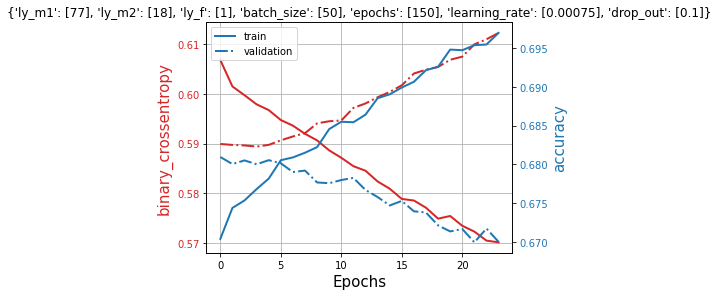

Pandas(Index=3, ly_m1=84, ly_m2=18, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [84], 'ly_m2': [18], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 6s 313us/step - loss: 0.5942 - accuracy: 0.6790 - val_loss: 0.6055 - val_accuracy: 0.6729
Epoch 2/150
19339/19339 [==============================] - 12s 602us/step - loss: 0.5876 - accuracy: 0.6855 - val_loss: 0.6045 - val_accuracy: 0.6716
Epoch 3/150
19339/19339 [==============================] - 11s 586us/step - loss: 0.5846 - accuracy: 0.6858 - val_loss: 0.6053 - val_accuracy: 0.6702ss: 0.5835 - accuracy
Epoch 4/150
19339/19339 [==============================] - 12s 595us/step - loss: 0.5823 - accuracy: 0.6897 - val_loss: 0.6048 - val_accuracy: 0.67155823 - accuracy: 0.
Epoch 5/150
19339/19339 [==============================] - 12s 615us/step -

Epoch 9/150
58017/58017 [==============================] - 23s 395us/step - loss: 0.5898 - accuracy: 0.6859 - val_loss: 0.5934 - val_accuracy: 0.6788
Epoch 10/150
58017/58017 [==============================] - 24s 417us/step - loss: 0.5877 - accuracy: 0.6857 - val_loss: 0.5941 - val_accuracy: 0.6787
Epoch 11/150
58017/58017 [==============================] - 25s 434us/step - loss: 0.5860 - accuracy: 0.6884 - val_loss: 0.5952 - val_accuracy: 0.6778
Epoch 12/150
58017/58017 [==============================] - 24s 422us/step - loss: 0.5845 - accuracy: 0.6881 - val_loss: 0.5966 - val_accuracy: 0.6769
Epoch 13/150
58017/58017 [==============================] - 25s 434us/step - loss: 0.5832 - accuracy: 0.6883 - val_loss: 0.5977 - val_accuracy: 0.6780
Epoch 14/150
58017/58017 [==============================] - 24s 422us/step - loss: 0.5803 - accuracy: 0.6916 - val_loss: 0.6003 - val_accuracy: 0.6744
Epoch 15/150
58017/58017 [==============================] - 25s 426us/step - loss: 0.5797 - acc

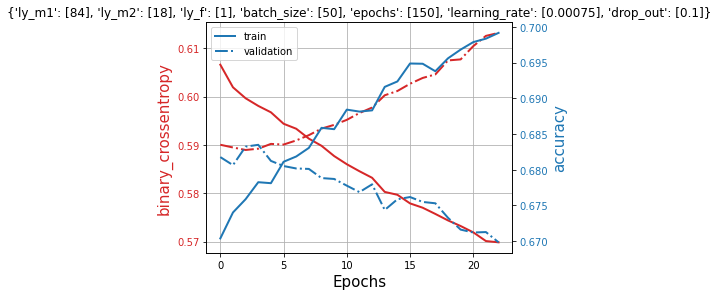

Pandas(Index=4, ly_m1=91, ly_m2=18, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [91], 'ly_m2': [18], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 12s 635us/step - loss: 0.5945 - accuracy: 0.6790 - val_loss: 0.5960 - val_accuracy: 0.6770
Epoch 2/150
19339/19339 [==============================] - 11s 587us/step - loss: 0.5864 - accuracy: 0.6869 - val_loss: 0.5957 - val_accuracy: 0.6765
Epoch 3/150
19339/19339 [==============================] - 11s 575us/step - loss: 0.5843 - accuracy: 0.6900 - val_loss: 0.5959 - val_accuracy: 0.6762
Epoch 4/150
19339/19339 [==============================] - 12s 595us/step - loss: 0.5821 - accuracy: 0.6903 - val_loss: 0.5963 - val_accuracy: 0.6748
Epoch 5/150
19339/19339 [==============================] - 8s 389us/step - loss: 0.5808 - accuracy: 0.6912 - val_l

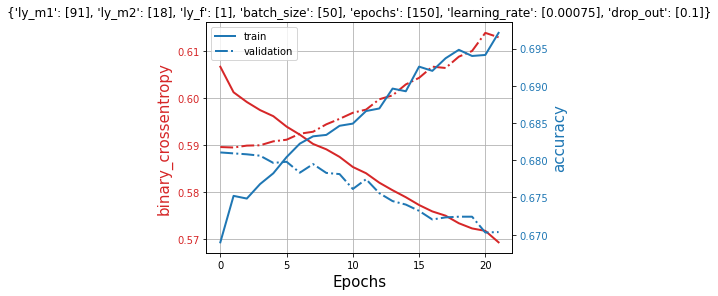

best parameters: {'ly_m1': [84], 'ly_m2': [18], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


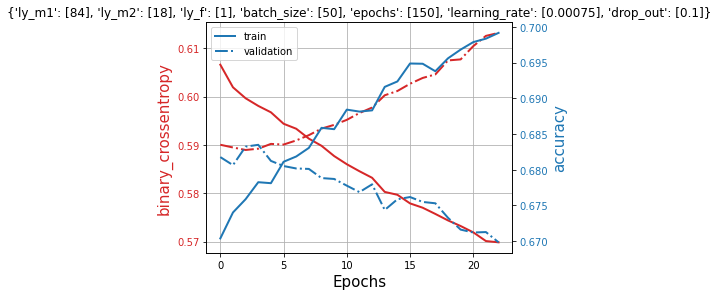

In [397]:
import json

# whether to apply PCA
flag_pca = 1

# number of principle components 

pca_components = [8,16,25,32,40,50,60,70]

acc_vs_components_nn = pd.DataFrame()
cases_nn_total = pd.DataFrame()

# time series split
n_splits = 2
tscv = TimeSeriesSplit(n_splits=n_splits)


# train catboost model

idx = 0

for n_pca_components in pca_components:
    
    
    ly_m1 = [0.9, 1.0, 1.1, 1.2, 1.3]  
    # convert to int64 
    ly_m1 = np.round(np.array(ly_m1)*n_pca_components).astype(np.int64).tolist() 
    
    ly_m2 = [0.25]
    ly_m2 = np.round(np.array(ly_m2)*n_pca_components).astype(np.int64).tolist() 
    
    ly_f = [1]
    batch_size = [50]
    epochs = [150]
    learning_rate = [0.00075]
    drop_out = [0.1]
    
    param_grid = dict(ly_m1=ly_m1,ly_m2=ly_m2,ly_f=ly_f,batch_size=batch_size, epochs=epochs,
                      learning_rate=learning_rate,drop_out=drop_out)



    # train test split
    X_train,X_val,X_test,y_train,y_val,y_test\
    = train_test_split (data = matrix_n, flag_pca = flag_pca, n_components = n_pca_components, 
                          year_start = year_start, year_train = year_train,year_val = year_val,year_end = year_end,
                       col_catfeature = col_catfeature, col_numfeature = col_numfeature, col_target = col_target,
                        one_hot_catfeature = True)

    train_data_2 = [X_train, y_train]
    val_data_2 = [X_val, y_val]
    test_data_2 = [X_test, y_test]

    # for catboost hyper-parameters, see https://catboost.ai/docs/concepts/python-reference_parameters-list.html
    
    cases_nn, best_para_nn, nn_grid_pca = train_nn(build_fn=build_nn,grid_para=param_grid ,cv=tscv,verbose=True,
                                           train_data=train_data_2,val_data=val_data_2,test_data=None,
                                      loss_function = loss_function,eval_metric = eval_metric,plot_progress = True,retrain_best = True)

# #     use the model to refit the whole data set     
    
#     X_n = np.concatenate((X_train,X_val,X_test),axis=0)
#     X_n  = np.nan_to_num(X_n)
    
# #   print(X_n.shape)

#     # predict the whole dataset and return the result
#     matrix_n['y_pred_nn_pca'] = nn_grid_pca.predict(X_n)
    
    # get the accuracy on test set
    y_test_pred = nn_grid_pca.predict(X_test)
    y_test_pred = 1*(y_test_pred>0.5)
    acc_nn = accuracy_score(y_test, y_test_pred)
    
     
    acc_vs_components_nn.loc[idx,'n_pca_component'] = n_pca_components
    acc_vs_components_nn.loc[idx,'acc_test'] = acc_nn
    acc_vs_components_nn.loc[idx,'acc_val'] = cases_nn.metric_nn_val.max() 
    acc_vs_components_nn.loc[idx,'acc_train'] = cases_nn.metric_nn_train[cases_nn.metric_nn_val.argmax()]
    acc_vs_components_nn.loc[idx,'best_para_nn'] = json.dumps(best_para_nn)
    
    cases_nn['n_pca'] = n_pca_components
    cases_nn_total = pd.concat([cases_nn_total,cases_nn],axis=0,ignore_index=True)
    
     
    idx+= 1

In [398]:
acc_vs_components_nn

n_pca_component  acc_test   acc_val  acc_train  \
0              8.0  0.682896  0.678516   0.659565   
1             16.0  0.679019  0.678578   0.669321   
2             25.0  0.682022  0.680860   0.676457   
3             32.0  0.675333  0.682986   0.683679   
4             40.0  0.672254  0.683236   0.688350   
5             50.0  0.677309  0.683737   0.687902   
6             60.0  0.672140  0.683580   0.695244   
7             70.0  0.669783  0.683487   0.699174   

                                        best_para_nn  
0  {"ly_m1": [10], "ly_m2": [2], "ly_f": [1], "ba...  
1  {"ly_m1": [19], "ly_m2": [4], "ly_f": [1], "ba...  
2  {"ly_m1": [25], "ly_m2": [6], "ly_f": [1], "ba...  
3  {"ly_m1": [38], "ly_m2": [8], "ly_f": [1], "ba...  
4  {"ly_m1": [52], "ly_m2": [10], "ly_f": [1], "b...  
5  {"ly_m1": [45], "ly_m2": [12], "ly_f": [1], "b...  
6  {"ly_m1": [72], "ly_m2": [15], "ly_f": [1], "b...  
7  {"ly_m1": [84], "ly_m2": [18], "ly_f": [1], "b...

In [399]:
cases_nn_total

ly_m1  ly_m2  ly_f  batch_size  epochs  learning_rate  drop_out  \
0       7      2     1          50     150        0.00075       0.1   
1       8      2     1          50     150        0.00075       0.1   
2       9      2     1          50     150        0.00075       0.1   
3      10      2     1          50     150        0.00075       0.1   
4      10      2     1          50     150        0.00075       0.1   
5      14      4     1          50     150        0.00075       0.1   
6      16      4     1          50     150        0.00075       0.1   
7      18      4     1          50     150        0.00075       0.1   
8      19      4     1          50     150        0.00075       0.1   
9      21      4     1          50     150        0.00075       0.1   
10     22      6     1          50     150        0.00075       0.1   
11     25      6     1          50     150        0.00075       0.1   
12     28      6     1          50     150        0.00075       0.1   
13     30      6     1          50     150        0.00075       0.1   
14     32      6     1          50     150        0.00075       0.1   
15     29      8     1          50     150        0.00075       0.1   
16     32      8     1          50     150        0.00075       0.1   
17     35      8     1          50     150        0.00075       0.1   
18     38      8     1          50     150        0.00075       0.1   
19     42      8     1          50     150        0.00075       0.1   
20     36     10     1          50     150        0.00075       0.1   
21     40     10     1          50     150        0.00075       0.1   
22     44     10     1          50     150        0.00075       0.1   
23     48     10     1          50     150        0.00075       0.1   
24     52     10     1          50     150        0.00075       0.1   
25     45     12     1          50     150        0.00075       0.1   
26     50     12     1          50     150        0.00075       0.1   
27     55     12     1          50     150        0.00075       0.1   
28     60     12     1          50     150        0.00075       0.1   
29     65     12     1          50     150        0.00075       0.1   
30     54     15     1          50     150        0.00075       0.1   
31     60     15     1          50     150        0.00075       0.1   
32     66     15     1          50     150        0.00075       0.1   
33     72     15     1          50     150        0.00075       0.1   
34     78     15     1          50     150        0.00075       0.1   
35     63     18     1          50     150        0.00075       0.1   
36     70     18     1          50     150        0.00075       0.1   
37     77     18     1          50     150        0.00075       0.1   
38     84     18     1          50     150        0.00075       0.1   
39     91     18     1          50     150        0.00075       0.1   

    metric_nn_train  metric_nn_val  n_pca  
0          0.658876       0.675295      8  
1          0.660306       0.677953      8  
2          0.658238       0.675608      8  
3          0.659565       0.678516      8  
4          0.659565       0.678516      8  
5          0.667856       0.676140     16  
6          0.670855       0.678172     16  
7          0.670304       0.677609     16  
8          0.669321       0.678578     16  
9          0.670855       0.677953     16  
10         0.676612       0.680423     25  
11         0.676457       0.680860     25  
12         0.677956       0.679766     25  
13         0.680301       0.679766     25  
14         0.679904       0.679422     25  
15         0.682334       0.681705     32  
16         0.683403       0.681392     32  
17         0.683817       0.681830     32  
18         0.683679       0.682986     32  
19         0.685006       0.681986     32  
20         0.685661       0.682080     40  
21         0.685385       0.682549     40  
22         0.687161       0.682111     40  
23         0.689384       0.682361  

number of feature before PCA: (135825, 78)
number of feature after PCA: (135825, 25)
Pandas(Index=0, ly_m1=25, ly_m2=6, ly_f=1, batch_size=50, epochs=150, learning_rate=0.00075, drop_out=0.1)
{'ly_m1': [25], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}
Train on 19339 samples, validate on 31986 samples
Epoch 1/150
19339/19339 [==============================] - 8s 391us/step - loss: 0.6445 - accuracy: 0.6542 - val_loss: 0.6474 - val_accuracy: 0.6627
Epoch 2/150
19339/19339 [==============================] - 3s 137us/step - loss: 0.6253 - accuracy: 0.6814 - val_loss: 0.6379 - val_accuracy: 0.6604
Epoch 3/150
19339/19339 [==============================] - 2s 126us/step - loss: 0.6159 - accuracy: 0.6806 - val_loss: 0.6327 - val_accuracy: 0.6588
Epoch 4/150
19339/19339 [==============================] - 2s 119us/step - loss: 0.6106 - accuracy: 0.6816 - val_loss: 0.6280 - val_accuracy: 0.6590
Epoch 5/150
19339/19339 [==========

Epoch 16/150
38678/38678 [==============================] - 4s 105us/step - loss: 0.5986 - accuracy: 0.6792 - val_loss: 0.6020 - val_accuracy: 0.6755
Epoch 17/150
38678/38678 [==============================] - 4s 103us/step - loss: 0.5971 - accuracy: 0.6789 - val_loss: 0.6029 - val_accuracy: 0.6743
Epoch 18/150
38678/38678 [==============================] - 4s 91us/step - loss: 0.5976 - accuracy: 0.6766 - val_loss: 0.6037 - val_accuracy: 0.6737
Epoch 19/150
38678/38678 [==============================] - 3s 89us/step - loss: 0.5964 - accuracy: 0.6783 - val_loss: 0.6028 - val_accuracy: 0.6749
Epoch 20/150
38678/38678 [==============================] - 3s 89us/step - loss: 0.5960 - accuracy: 0.6804 - val_loss: 0.6026 - val_accuracy: 0.6741
Epoch 21/150
38678/38678 [==============================] - 3s 90us/step - loss: 0.5959 - accuracy: 0.6806 - val_loss: 0.6020 - val_accuracy: 0.6748
Epoch 22/150
38678/38678 [==============================] - 3s 90us/step - loss: 0.5967 - accuracy: 0.68

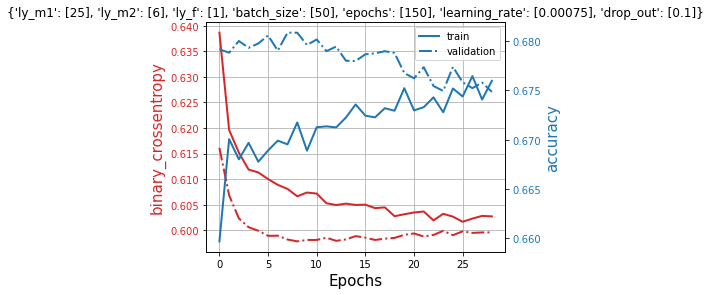

best parameters: {'ly_m1': [25], 'ly_m2': [6], 'ly_f': [1], 'batch_size': [50], 'epochs': [150], 'learning_rate': [0.00075], 'drop_out': [0.1]}


In [413]:

n_pca_components = 25

ly_m1 = [1.0]  
    # convert to int64 
ly_m1 = np.round(np.array(ly_m1)*n_pca_components).astype(np.int64).tolist() 

ly_m2 = [0.25]
ly_m2 = np.round(np.array(ly_m2)*n_pca_components).astype(np.int64).tolist() 

ly_f = [1]
batch_size = [50]
epochs = [150]
learning_rate = [0.00075]
drop_out = [0.1]

param_grid = dict(ly_m1=ly_m1,ly_m2=ly_m2,ly_f=ly_f,batch_size=batch_size, epochs=epochs,
                  learning_rate=learning_rate,drop_out=drop_out)



# train test split
X_train_2,X_val_2,X_test_2,y_train_2,y_val_2,y_test_2,X_n2\
= train_test_split (data = matrix_n, flag_pca = flag_pca, n_components = n_pca_components, 
                      year_start = year_start, year_train = year_train,year_val = year_val,year_end = year_end,
                   col_catfeature = col_catfeature, col_numfeature = col_numfeature, col_target = col_target,
                    one_hot_catfeature = True)

train_data_2 = [X_train_2, y_train_2]
val_data_2 = [X_val_2, y_val_2]
test_data_2 = [X_test_2, y_test_2]

# for catboost hyper-parameters, see https://catboost.ai/docs/concepts/python-reference_parameters-list.html

cases_nn, best_para_nn, nn_grid_pca = train_nn(build_fn=build_nn,grid_para=param_grid ,cv=tscv,verbose=True,
                                       train_data=train_data_2,val_data=val_data_2,test_data=None,
                                  loss_function = loss_function,eval_metric = eval_metric,plot_progress = True,retrain_best = False)

matrix_n['y_pred_nn_pca'] = nn_grid_pca.predict(X_n2)

In [410]:
acc_nn_year = []
acc_elo_year = []
acc_elo1_year = []
acc_elo2_year = []
acc_elo3_year = []
acc_elo4_year = []

acc_win4m_year = []
acc_win6m_year = []
acc_win8m_year = []

acc_rank_year = []

for i in matrix_n.year.unique():
    
    y_pred_nn = 1*(matrix_n[matrix_n.year==i]['y_pred_nn_pca']>0.5)
    
    y_pred_elo = 1*(matrix_n[matrix_n.year==i]['p1_win_pred']>0.5)
    y_pred_elo1 = 1*(matrix_n[matrix_n.year==i]['p1_win_pred1']>0.5)
    y_pred_elo2 = 1*(matrix_n[matrix_n.year==i]['p1_win_pred2']>0.5)
    y_pred_elo3 = 1*(matrix_n[matrix_n.year==i]['p1_win_pred3']>0.5)
    y_pred_elo4 = 1*(matrix_n[matrix_n.year==i]['p1_win_pred4']>0.5)
    
    y_pred_win4m = 1*(matrix_n[matrix_n.year==i]['win_1-2_4m']>0)
    y_pred_win6m = 1*(matrix_n[matrix_n.year==i]['win_1-2_6m']>0)
    y_pred_win8m = 1*(matrix_n[matrix_n.year==i]['win_1-2_8m']>0)
    
    y_pred_rank = 1*(matrix_n[matrix_n.year==i]['rank_1-2']<0)
    y_true = matrix_n[matrix_n.year==i]['p1_win']
    
    acc_nn = accuracy_score(y_true, y_pred_nn)*100
    acc_nn_year.append(acc_nn)
    
    acc_elo = accuracy_score(y_true, y_pred_elo)*100
    acc_elo_year.append(acc_elo)
    
    acc_elo1 = accuracy_score(y_true, y_pred_elo1)*100
    acc_elo1_year.append(acc_elo1)
    
    acc_elo2 = accuracy_score(y_true, y_pred_elo2)*100
    acc_elo2_year.append(acc_elo2)
    
    acc_elo3 = accuracy_score(y_true, y_pred_elo3)*100
    acc_elo3_year.append(acc_elo3)
    
    acc_elo4 = accuracy_score(y_true, y_pred_elo4)*100
    acc_elo4_year.append(acc_elo4)
    
    acc_win4m = accuracy_score(y_true, y_pred_win4m)*100
    acc_win4m_year.append(acc_win4m)
    
    acc_win6m = accuracy_score(y_true, y_pred_win6m)*100
    acc_win6m_year.append(acc_win6m)
    
    acc_win8m = accuracy_score(y_true, y_pred_win8m)*100
    acc_win8m_year.append(acc_win8m)
    
    acc_rank = accuracy_score(y_true, y_pred_rank)*100
    acc_rank_year.append(acc_rank)
    


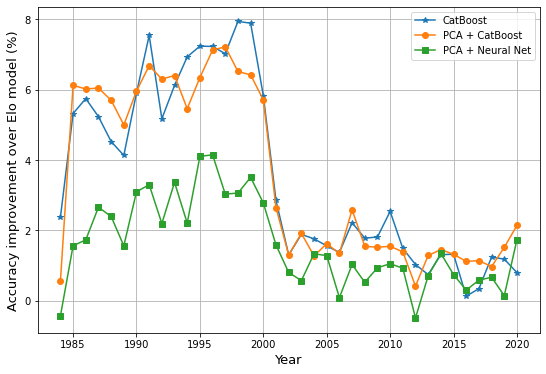

In [429]:
plt.figure(figsize=(9,6))
n=5
plt.plot(matrix_n.year.unique()[n:],np.array(acc_cat_year[n:])-np.array(acc_elo_year[n:]),'-*')
plt.plot(matrix_n.year.unique()[n:],np.array(acc_cat_pca_year[n:])-np.array(acc_elo_year[n:]),'-o')
plt.plot(matrix_n.year.unique()[n:],np.array(acc_nn_year[n:])-np.array(acc_elo_year[n:]),'-s')
#plt.plot(matrix_n.year.unique()[n:],np.array(acc_elo_year[n:])-np.array(acc_elo_year[n:]),'--')
#plt.plot(matrix_n.year.unique()[n:],acc_win8m_year[n:],'-.')

#plt.plot(matrix_n.year.unique()[n:],acc_rank_year[n:],'-')
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Accuracy improvement over Elo model (%)',fontsize = 13)
plt.legend(['CatBoost','PCA + CatBoost','PCA + Neural Net'])
plt.grid()

In [414]:

# calculate the accuracy on train set
y_train_pred = nn_grid_pca.predict(X_train_2)
y_train_pred = 1*(y_train_pred>0.5)
acc_nn = accuracy_score(y_train_2, y_train_pred)
print('In the train set:')
print('The accuracy of winner prediction using N.N. is: {}%.\n'.format(round(acc_nn*100,3))) 

# calculate the accuracy on validation set
y_val_pred = nn_grid_pca.predict(X_val_2)
y_val_pred = 1*(y_val_pred>0.5)
acc_nn = accuracy_score(y_val_2, y_val_pred)
print('In the validation set:')
print('The accuracy of winner prediction using N.N is: {}%.\n'.format(round(acc_nn*100,3))) 


# calculate the accuracy on test set
y_test_pred = nn_grid_pca.predict(X_test_2)
y_test_pred = 1*(y_test_pred>0.5)
acc_nn = accuracy_score(y_test_2, y_test_pred)
print('In the test set:')
print('The accuracy of winner prediction using N.N is: {}%.\n'.format(round(acc_nn*100,3))) 

In the train set:
The accuracy of winner prediction using N.N. is: 68.506%.

In the validation set:
The accuracy of winner prediction using N.N is: 67.486%.

In the test set:
The accuracy of winner prediction using N.N is: 68.202%.



* Visualize the network

In [176]:
!pip install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4173 sha256=57143876500dbce132f3b55f93a9defc31e604072ffd3946251d701660d2e4a3
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\1b\fc\58\2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [179]:
!pip install graphviz

In [181]:
from ann_visualizer.visualize import ann_viz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' 

In [218]:
model_best = nn_grid.best_estimator_.model
ann_architect = ann_viz(model_best,view=True, title="Neural network visualization",filename="network.pdf")


In [219]:
from IPython.display import IFrame
IFrame("./nn_image/network.pdf", width=1000, height=500)

In [ ]:
ann_viz.

 <a id='Insight'></a>
 ##  7. [Insight and Discussion](#Contents)